# Load models and analyse properties of final states

### Import utility and functions

In [2]:
import os, glob
from tensorboard.backend.event_processing import event_accumulator
from tensorboard.compat.proto import tensor_pb2
import tensorflow as tf
import pandas as pd

import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns             # for heatmaps, clustering plots
import quimb as qu                # only if you want to compare to exact state
import sonnet as snt
import tensorflow as tf
from tensorboard.backend.event_processing import event_accumulator

# your existing utilities:
from compgraph.tensorflow_version.model_loading import extract_hyperparams_from_path, load_model_from_path
from simulation.initializer import create_graph_from_ham, initialize_NQS_model_fromhyperparams
from compgraph.tensorflow_version.graph_tuple_manipulation import initialize_graph_tuples_tf_opt, precompute_graph_structure
from compgraph.monte_carlo import MCMCSampler
from compgraph.quimb_helpers.operators import calculate_site_magnetizations_square  # the quimb version


2025-05-18 17:40:47.873733: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-18 17:40:49.495320: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2025-05-18 17:40:54.813901: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-18 17:40:55.128789: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-18 17:40:55.129364: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] co

# Analyse 3x3

In [ ]:
import re
import glob 
import os
import numpy as np
import pandas as pd
from simulation_analysis.load_from_paths import get_filtered_directories, batch_extract_tf_events

import os, glob
from tensorboard.backend.event_processing import event_accumulator
from tensorboard.compat.proto import tensor_pb2
import tensorflow as tf
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns # for aesthetics and potentially different plot types
from simulation_analysis.load_from_paths import filter_valid
filtered_dirs_3x3=get_filtered_directories(base_dir="saving_logs/**/GNN*", pattern=r'03_03')
df_ev_3x3=batch_extract_tf_events(filtered_dirs_3x3, tags=("training/energy_real", "training/std_energy",
 "training/staggered_magnetization_absv2","training/staggered_magnetization_abs","configuration/hyperparameters"))
n_steps_min=1000
df_3x3_filt=filter_valid(df_ev_3x3, column="training/energy_real", n_steps_min=n_steps_min,treshold=5)
df_3x3_filt.sort_values(by="final_energy_real", ascending=False, inplace=True)
df_sim_filt_seeded = df_3x3_filt[~df_3x3_filt['seed'].isna()]
print(f"Original runs: {len(df_ev_3x3)}")
print(f"Runs after filtering (seed and >= {n_steps_min} iterations): {len(df_3x3_filt)}")

# Define exact values for 4x4
exact_energy = -3.96# Your value from the plot

df_sim_filt_seeded


In [5]:
import importlib
import simulation_analysis.load_from_paths 
importlib.reload(simulation_analysis.load_from_paths)
import simulation_analysis.load_from_paths

In [7]:
import os, glob
from tensorboard.backend.event_processing import event_accumulator
from tensorboard.compat.proto import tensor_pb2
import tensorflow as tf
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns # for aesthetics and potentially different plot types
from simulation_analysis.load_from_paths import filter_valid

n_steps_min=1000
df_3x3_filt=filter_valid(df_ev_3x3, column="training/energy_real", n_steps_min=n_steps_min,treshold=5)
df_3x3_filt.sort_values(by="final_energy_real", ascending=False, inplace=True)
df_sim_filt_seeded = df_3x3_filt[~df_3x3_filt['seed'].isna()]
print(f"Original runs: {len(df_ev_3x3)}")
print(f"Runs after filtering (seed and >= {n_steps_min} iterations): {len(df_3x3_filt)}")

# Define exact values for 4x4
exact_energy = -3.96# Your value from the plot

df_sim_filt_seeded


training/energy_real
final_energy_real
training/std_energy
final_std_energy
training/staggered_magnetization_absv2
final_staggered_magnetization_absv2
training/staggered_magnetization_abs
final_staggered_magnetization_abs
Original runs: 25
Runs after filtering (seed and >= 1000 iterations): 15


/home/stefanotroffa/thesis/computational_graphs/simulation_analysis/load_from_paths.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/stefanotroffa/thesis/computational_graphs/simulation_analysis/load_from_paths.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/stefanotroffa/thesis/computational_graphs/simulation_analysis/load_from_paths.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

run_name  \
6   2dsquare_03_03_Disordered/beta0.07__bs_256lr1....   
0   2dsquare_03_03_Disordered/beta0.07__bs_128lr2....   
4   2dsquare_03_03_Disordered/beta0.007__bs_128lr1...   
8   2dsquare_03_03_Disordered/beta0.1__bs_64lr1.0e...   
1   2dsquare_03_03_Disordered/beta0.07__bs_64lr1.0...   
10  2dsquare_03_03_Disordered/beta0.1__bs_64lr1.0e...   
3   2dsquare_03_03_Disordered/beta0.07__bs_128lr1....   
11  2dsquare_03_03_Alternatepattern/beta0.08__bs_2...   
13  2dsquare_03_03_Alternatepattern/beta0.07__bs_1...   
15  2dsquare_03_03_Alternatepattern/beta0.1__bs_64...   
12  2dsquare_03_03_Alternatepattern/beta0.1__bs_64...   

                                 training/energy_real  \
6   [4.4586873054504395, 4.340978622436523, 4.4891...   
0   [4.086862564086914, 0.6648010015487671, 3.6163...   
4   [4.485733985900879, 4.4371538162231445, 4.4738...   
8   [4.088201522827148, 1.8821207284927368, 3.3659...   
1   [4.063833713531494, 1.8714089393615723, 3.0664...   
10  [4.080925941467285, 1.6676701307296753, 3.4468...   
3   [3.316133499145508, 0.6105800867080688, 1.9453...   
11  [3.785250186920166, 0.05324850231409073, 2.505...   
13  [3.637181282043457, -0.969380259513855, 2.4036...   
15  [3.8292996883392334, 2.0179405212402344, 2.703...   
12  [3.634714365005493, 0.47531500458717346, 2.282...   

                                                steps  \
6   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
0   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
4   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
8   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
1   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
10  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
3   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
11  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
13  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
15  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
12  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                  training/std_energy  \
6   [0.02669251337647438, 0.06492578983306885, 0.0...   
0   [0.11171750724315643, 0.1903594434261322, 0.15...   
4   [0.03015713021159172, 0.06632804870605469, 0.0...   
8   [0.13946327567100525, 0.2677054703235626, 0.24...   
1   [0.1625523567199707, 0.2657564580440521, 0.261...   
10  [0.15219886600971222, 0.2914486825466156, 0.24...   
3   [0.17176403105258942, 0.20389185845851898, 0.2...   
11  [0.09587018936872482, 0.132687509059906, 0.132...   
13  [0.13527299463748932, 0.16816534101963043, 0.1...   
15  [0.17291519045829773, 0.26966094970703125, 0.2...   
12  [0.19733890891075134, 0.28521889448165894, 0.2...   

               training/staggered_magnetization_absv2  \
6   [0.3255208432674408, 0.3793402910232544, 0.265...   
0   [0.2881944477558136, 0.2604166567325592, 0.277...   
4   [0.3315972089767456, 0.3177083432674408, 0.302...   
8   [0.2951388955116272, 0.25, 0.2534722089767456,...   
1   [0.2604166567325592, 0.25, 0.3090277910232544,...   
10  [0.2673611044883728, 0.2604166567325592, 0.288...   
3   [0.28125, 0.3125, 0.3315972089767456, 0.277777...   
11  [0.2786458432674408, 0.265625, 0.2569444477558...   
13  [0.2413194477558136, 0.2326388955116272, 0.255...   
15  [0.2708333432674408, 0.2847222089767456, 0.25,...   
12  [0.2743055522441864, 0.2638888955116272, 0.256...   

                 training/staggered_magnetization_abs  \
6   [0.3255208134651184, 0.3793402910232544, 0.265...   
0   [0.2881944477558136, 0.2604166567325592, 0.277...   
4   [0.3315972089767456, 0.3177083730697632, 0.302...   
8   [0.2951388955116272, 0.25, 0.2534722089767456,...   
1   [0.2604166865348816, 0.25, 0.3090277910232544,...   
10  [0.2673611044883728, 0.2604166865348816, 0.288...   
3   [0.28125, 0.3125, 0.3315972089767456, 0.277777...   
11  [0.2786458432674408, 0.265625, 0.2569444477558...   
13  [0.2413194477558136, 0.2326388955116272, 0.255...   
15  [0.2708333432674408, 0.284722238779068, 0.25, 

In [8]:
import os
import glob
import warnings
import tensorflow as tf
import compgraph.tensorflow_version.model_loading
from compgraph.tensorflow_version.model_loading import check_and_reinitialize_model, load_model_from_path,extract_hyperparams_from_path
from simulation.initializer import create_graph_from_ham, initialize_NQS_model_fromhyperparams, initialize_hamiltonian_and_groundstate
from compgraph.tensorflow_version.graph_tuple_manipulation import initialize_graph_tuples_tf_opt, precompute_graph_structure
import sonnet as snt

def load_models_for_analysis(df_sim_filt,filtered_dirs):
    warnings.filterwarnings("ignore", category=FutureWarning)
    tf.get_logger().setLevel('ERROR')
    models = {}

    df_sim_filt_seeded = df_sim_filt[~df_sim_filt['seed'].isna()]
    dirs_for_checkpoints = [
        d for d in filtered_dirs
        if any(run in d for run in df_sim_filt_seeded['run_name'].unique().tolist())
    ]
    for idx, d in enumerate(dirs_for_checkpoints):
        ckpt_paths=sorted(glob.glob(d+'/checkpoints/*.index', recursive=True))
        print("Checkpoint paths:", ckpt_paths)
        ckpt_idxs = sorted(glob.glob(os.path.join(d, 'checkpoints', '*.index')))
        ckpt_path = ckpt_idxs[-2][:-6]   # rimuovo '.index'
        print("→ checkpoint:", ckpt_path)
        hyperparams=extract_hyperparams_from_path(ckpt_path)
        model_temp=initialize_NQS_model_fromhyperparams(hyperparams.ansatz, hyperparams.ansatz_params,0)
        optimizer_temp=snt.optimizers.Adam(hyperparams.sim_params.learning_rate,0.9,0.99)
        n_hyp,m_hyp=hyperparams.graph_params.n,hyperparams.graph_params.m
        graph,subl=create_graph_from_ham(hyperparams.graph_params.graphType,(n_hyp,m_hyp)
                                        ,sublattice=hyperparams.graph_params.sublattice)

        GT_Batch_init=initialize_graph_tuples_tf_opt(128, graph, sublattice_encoding=subl)    
        # prova forward prima del caricamento
        print()
        _ = model_temp(GT_Batch_init)
        print(f"✘ Model initialized, psi_val[0]={_[0]}")
        # carica pesi
        load_model_from_path(
            model=model_temp,
            checkpoint_path=ckpt_path,  # load_model cerca i file .index ecc qui
            optimizer=optimizer_temp
        )

        # verifica forward dopo
        psi_val = model_temp(GT_Batch_init)[0]
        print(f"✔ Model loaded from {d},\n, psi_val[0]={psi_val}")

        # chiave unica: basename + beta + bs
        run_key = os.path.basename(d) +f"_b{hyperparams.sim_params.beta}_bs{hyperparams.sim_params.batch_size}_lr{hyperparams.sim_params.learning_rate}"+"_"+str(idx)
        models[run_key] = {
            "model": model_temp,
            "hyperparams": hyperparams
        }

    print("\n Loaded models:", list(models.keys()))
    return models

In [ ]:

models_checkpoints=load_models_for_analysis(df_3x3_filt,filtered_dirs_3x3)

Checkpoint paths: ['saving_logs/system_Heisenberg/2dsquare_03_03_Disordered/beta0.07__bs_128lr2.0e-04_loop1221x15_overlap_VMC/GNNprocnorm_h128_e64_K2/checkpoints/ckpt-3.index', 'saving_logs/system_Heisenberg/2dsquare_03_03_Disordered/beta0.07__bs_128lr2.0e-04_loop1221x15_overlap_VMC/GNNprocnorm_h128_e64_K2/checkpoints/ckpt-4.index', 'saving_logs/system_Heisenberg/2dsquare_03_03_Disordered/beta0.07__bs_128lr2.0e-04_loop1221x15_overlap_VMC/GNNprocnorm_h128_e64_K2/checkpoints/ckpt-5.index', 'saving_logs/system_Heisenberg/2dsquare_03_03_Disordered/beta0.07__bs_128lr2.0e-04_loop1221x15_overlap_VMC/GNNprocnorm_h128_e64_K2/checkpoints/ckpt-6.index', 'saving_logs/system_Heisenberg/2dsquare_03_03_Disordered/beta0.07__bs_128lr2.0e-04_loop1221x15_overlap_VMC/GNNprocnorm_h128_e64_K2/checkpoints/ckpt-7.index', 'saving_logs/system_Heisenberg/2dsquare_03_03_Disordered/beta0.07__bs_128lr2.0e-04_loop1221x15_overlap_VMC/GNNprocnorm_h128_e64_K2/checkpoints/initial_model-1.index']
→ checkpoint: saving_log

I0000 00:00:1747583377.879364   19846 service.cc:145] XLA service 0x4bf30000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747583377.879484   19846 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-05-18 17:49:38.706152: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-18 17:49:39.080210: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1747583381.154318   19846 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


✘ Model initialized, psi_val[0]=[ 2.9746702 -0.999877 ]
✔ Model loaded from saving_logs/system_Heisenberg/2dsquare_03_03_Disordered/beta0.07__bs_128lr2.0e-04_loop1221x15_overlap_VMC/GNNprocnorm_h128_e64_K2,
, psi_val[0]=[12.417764   5.1413984]
Checkpoint paths: ['saving_logs/system_Heisenberg/2dsquare_03_03_Disordered/beta0.07__bs_64lr1.0e-04_loop1200x15_overlap_VMC/GNNprocnorm_h128_e64_K2/checkpoints/ckpt-35.index', 'saving_logs/system_Heisenberg/2dsquare_03_03_Disordered/beta0.07__bs_64lr1.0e-04_loop1200x15_overlap_VMC/GNNprocnorm_h128_e64_K2/checkpoints/ckpt-36.index', 'saving_logs/system_Heisenberg/2dsquare_03_03_Disordered/beta0.07__bs_64lr1.0e-04_loop1200x15_overlap_VMC/GNNprocnorm_h128_e64_K2/checkpoints/ckpt-37.index', 'saving_logs/system_Heisenberg/2dsquare_03_03_Disordered/beta0.07__bs_64lr1.0e-04_loop1200x15_overlap_VMC/GNNprocnorm_h128_e64_K2/checkpoints/ckpt-38.index', 'saving_logs/system_Heisenberg/2dsquare_03_03_Disordered/beta0.07__bs_64lr1.0e-04_loop1200x15_overlap_VMC

In [ ]:
from compgraph.tensorflow_version.hamiltonian_operations import stochastic_energy_tf
for run_key, data in models_checkpoints.items():
    model = data["model"]
    hyperparams = data["hyperparams"]
    print(f"Run key: {run_key}")
    print(f"hyperparams: {hyperparams}")
    n_hyp,m_hyp=hyperparams.graph_params.n,hyperparams.graph_params.m
    graph,subl=create_graph_from_ham(hyperparams.graph_params.graphType,(n_hyp,m_hyp)
                                    ,sublattice=hyperparams.graph_params.sublattice)

    GT_batch_temp=initialize_graph_tuples_tf_opt(128, graph, sublattice_encoding=subl)
    psi_new = model(GT_batch_temp)
    en, std= stochastic_energy_tf(psi_new, model)
    initial_energy, std_initial,_ =stochastic_energy_tf(psi, model, edge_pairs, template_graphs_output,GT_Batch_update,0)
    print("Initial energy:", initial_energy, 'std',std_initial)
    sampler_var_temp=MCMCSampler(GT_batch_temp)
    thermalization=200*n_sites

    for i in range(thermalization):

        GT_batch_temp, psi=sampler_var_temp.monte_carlo_update_on_batch_profilemem(model,GT_batch_temp)
    energy_after_term, std_after_term,_ =stochastic_energy_tf(psi, model, edge_pairs, template_graphs_output,GT_batch_temp,0)


Run key: GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0002_0
hyperparams: Hyperparams(simulation_type='VMC', graph_params=GraphParams(graphType='2dsquare', n=3, m=3, sublattice='Disordered'), sim_params=SimParams(beta=0.07, batch_size=128, learning_rate=0.0002, outer_loop=1221, inner_loop=15, gradient='overlap'), ansatz='GNNprocnorm', ansatz_params={'hidden_size': 128, 'output_emb_size': 64, 'K_layer': 2})
Run key: GNNprocnorm_h128_e64_K2_b0.07_bs64_lr0.0001_1
hyperparams: Hyperparams(simulation_type='VMC', graph_params=GraphParams(graphType='2dsquare', n=3, m=3, sublattice='Disordered'), sim_params=SimParams(beta=0.07, batch_size=64, learning_rate=0.0001, outer_loop=1200, inner_loop=15, gradient='overlap'), ansatz='GNNprocnorm', ansatz_params={'hidden_size': 128, 'output_emb_size': 64, 'K_layer': 2})
Run key: GNN2adv_h128_e64_K3_b0.07_bs128_lr0.0001_2
hyperparams: Hyperparams(simulation_type='VMC', graph_params=GraphParams(graphType='2dsquare', n=3, m=3, sublattice='Disordered'), sim_param

In [ ]:
# results = {}
rows=[]
for run_key, data in models.items():
    model = data["model"]
    hyperparams = data["hyperparams"]
    GT_batch_temp=initialize_graph_tuples_tf_opt(hyperparams.sim_params.batch_size, graph, sublattice_encoding=subl)

    print("model", run_key)
    print(model(GT_batch_temp)[82])  # Ensure model is initialized

    psi=model(GT_batch_temp)
    # 1) Initialize the graph
    initial_energy, std_initial,_ =stochastic_energy_tf(psi, model, edge_pairs, template_graphs_output,GT_Batch_update,0)
    print("Initial energy:", initial_energy, 'std',std_initial)
    sampler_var_temp=MCMCSampler(GT_batch_temp)
    thermalization=200*n_sites

    for i in range(thermalization):

        GT_batch_temp, psi=sampler_var_temp.monte_carlo_update_on_batch_profilemem(model,GT_batch_temp)
    energy_after_term, std_after_term,_ =stochastic_energy_tf(psi, model, edge_pairs, template_graphs_output,GT_batch_temp,0)

    print("Energy after:", energy_after_term, 'std',std_after_term)
    all_mrms = []
    all_mabs = []
    all_Spp  = []
    start_time=time.time()
    sampling=200*n_sites

    for step in range(sampling):
        for j in range(2*n_sites):
            GT_batch_temp, psi_new=sampler_var_temp.monte_carlo_update_on_batch_profilemem(model,GT_batch_temp)
        spins_flat = GT_batch_temp.nodes[:,0]                  
        spins_2d    = tf.reshape(spins_flat, (hyperparams.sim_params.batch_size, n_sites))    

        # 4) Compute staggered metrics
        m_rms, m_abs, S_pp = batch_staggered_metrics_pm1(spins_2d, eps)
        all_mrms.append(m_rms.numpy())
        all_mabs.append(m_abs.numpy())
        all_Spp.append(S_pp.numpy())
        rows.append({
            "run":      run_key,
            "step":     step,
            "m_rms":    float(m_rms.numpy()),
            "m_abs":    float(m_abs.numpy()),
            "S_pp":     float(S_pp.numpy())
        })        
    print("Tempo per campionamento:", time.time()-start_time)    
# Costruisco il DataFrame unico
df_traj = pd.DataFrame(rows)
print(df_traj.head())        

In [15]:


run_dirs = glob.glob("saving_logs/**/GNN*", recursive=True)

filtered_dirs2 = [ckpt for ckpt in run_dirs if re.search(r'03_03', ckpt)]
filtered_dirs2

['saving_logs/system_Heisenberg/2dsquare_03_03_Disordered/beta0.07__bs_128lr2.0e-04_loop1221x15_overlap_VMC/GNNprocnorm_h128_e64_K2',
 'saving_logs/system_Heisenberg/2dsquare_03_03_Disordered/beta0.07__bs_64lr1.0e-04_loop1200x15_overlap_VMC/GNNprocnorm_h128_e64_K2',
 'saving_logs/system_Heisenberg/2dsquare_03_03_Disordered/beta0.07__bs_128lr1.0e-04_loop1200x15_overlap_VMC/GNNprocnorm_h128_e64_K2',
 'saving_logs/system_Heisenberg/2dsquare_03_03_Disordered/beta0.07__bs_128lr1.0e-04_loop1200x15_overlap_VMC/GNN2adv_h128_e64_K3',
 'saving_logs/system_Heisenberg/2dsquare_03_03_Disordered/beta0.007__bs_128lr1.0e-04_loop1200x15_overlap_VMC/GNN2adv_h128_e64_K3',
 'saving_logs/system_Heisenberg/2dsquare_03_03_Disordered/beta0.007__bs_128lr1.0e-04_loop512x12_overlap_VMC/GNN2adv_h128_e64_K2',
 'saving_logs/system_Heisenberg/2dsquare_03_03_Disordered/beta0.07__bs_256lr1.0e-04_loop1200x15_overlap_VMC/GNN2adv_h128_e64_K2',
 'saving_logs/system_Heisenberg/2dsquare_03_03_Disordered/beta0.07__bs_256lr1.

In [ ]:

checkpoint_dirs = [f"{path}checkpoints" for path in filtered_dirs]
df_runs = batch_extract(filtered_dirs,  tags=("training/energy_real","training/std_energy","training/staggered_magnetization_sqrt",
                                              "training/staggered_magnetization_S_pp","training/staggered_magnetization_absv2","configuration/hyperparameters"))
# Step 1: Decode byte strings to regular strings
df_runs['config_str'] = df_runs['configuration/hyperparameters'].apply(lambda x: x.decode() if isinstance(x, bytes) else str(x))

# Step 2: Extract seed if present
df_runs['seed'] = df_runs['config_str'].apply(
    lambda s: int(re.search(r'seed:\s*(\d+)', s).group(1)) if re.search(r'seed:\s*(\d+)', s) else np.nan
)

df_runs["final_energy"] = df_runs["training/energy_real"].apply(lambda v: v[-1] if len(v)>0 else np.nan)
df_runs["final_std"]    = df_runs["training/std_energy"].apply(lambda v: v[-1] if len(v)>0 else np.nan)
df_runs["final_stagg"]  = df_runs["training/staggered_magnetization_absv2"].apply(lambda v: v[-1] if len(v)>0 else np.nan)
min_iterations=1000
df_runs_seeded=df_runs[~df_runs['seed'].isna()]
df_runs_filtered = df_runs_seeded[df_runs_seeded['training/energy_real'].apply(len) >= min_iterations].copy()


# 3x3 without any further analysis

In [1]:
import re
import glob 
import os
import numpy as np
import pandas as pd
from simulation_analysis.load_from_paths import get_filtered_directories, batch_extract_tf_events

import os, glob
from tensorboard.backend.event_processing import event_accumulator
from tensorboard.compat.proto import tensor_pb2
import tensorflow as tf
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns # for aesthetics and potentially different plot types
from simulation_analysis.load_from_paths import filter_valid
filtered_dirs_3x3=get_filtered_directories(base_dir="saving_logs/**/GNN*", pattern=r'03_03')
df_ev_3x3=batch_extract_tf_events(filtered_dirs_3x3, tags=("training/energy_real", "training/std_energy",
 "training/staggered_magnetization_absv2","training/staggered_magnetization_abs","configuration/hyperparameters"))
n_steps_min=1000
df_3x3_filt=filter_valid(df_ev_3x3, column="training/energy_real", n_steps_min=n_steps_min,treshold=5)
df_3x3_filt.sort_values(by="final_energy_real", ascending=False, inplace=True)
df_sim_filt_seeded = df_3x3_filt[~df_3x3_filt['seed'].isna()]
print(f"Original runs: {len(df_ev_3x3)}")
print(f"Runs after filtering (seed and >= {n_steps_min} iterations): {len(df_3x3_filt)}")

# Define exact values for 4x4
exact_energy = -3.96# Your value from the plot

df_sim_filt_seeded


2025-05-21 02:58:37.925570: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-21 02:58:41.355019: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2025-05-21 02:58:46.700556: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-21 02:58:47.078067: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-21 02:58:47.078823: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] co

training/energy_real
final_energy_real
training/std_energy
final_std_energy
training/staggered_magnetization_absv2
final_staggered_magnetization_absv2
training/staggered_magnetization_abs
final_staggered_magnetization_abs
Original runs: 25
Runs after filtering (seed and >= 1000 iterations): 15


/home/stefanotroffa/thesis/computational_graphs/simulation_analysis/load_from_paths.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt[col_name]= df_filt[col].apply(lambda x: x[-1] if len(x)>0 else pd.NA)
/home/stefanotroffa/thesis/computational_graphs/simulation_analysis/load_from_paths.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt[col_name]= df_filt[col].apply(lambda x: x[-1] if len(x)>0 else pd.NA)
/home/stefanotroffa/thesis/computational_graphs/simulation_analysis/load_from_pa

run_name  \
6   2dsquare_03_03_Disordered/beta0.07__bs_256lr1....   
0   2dsquare_03_03_Disordered/beta0.07__bs_128lr2....   
4   2dsquare_03_03_Disordered/beta0.007__bs_128lr1...   
8   2dsquare_03_03_Disordered/beta0.1__bs_64lr1.0e...   
1   2dsquare_03_03_Disordered/beta0.07__bs_64lr1.0...   
10  2dsquare_03_03_Disordered/beta0.1__bs_64lr1.0e...   
3   2dsquare_03_03_Disordered/beta0.07__bs_128lr1....   
11  2dsquare_03_03_Alternatepattern/beta0.08__bs_2...   
13  2dsquare_03_03_Alternatepattern/beta0.07__bs_1...   
15  2dsquare_03_03_Alternatepattern/beta0.1__bs_64...   
12  2dsquare_03_03_Alternatepattern/beta0.1__bs_64...   

                                 training/energy_real  \
6   [4.4586873054504395, 4.340978622436523, 4.4891...   
0   [4.086862564086914, 0.6648010015487671, 3.6163...   
4   [4.485733985900879, 4.4371538162231445, 4.4738...   
8   [4.088201522827148, 1.8821207284927368, 3.3659...   
1   [4.063833713531494, 1.8714089393615723, 3.0664...   
10  [4.080925941467285, 1.6676701307296753, 3.4468...   
3   [3.316133499145508, 0.6105800867080688, 1.9453...   
11  [3.785250186920166, 0.05324850231409073, 2.505...   
13  [3.637181282043457, -0.969380259513855, 2.4036...   
15  [3.8292996883392334, 2.0179405212402344, 2.703...   
12  [3.634714365005493, 0.47531500458717346, 2.282...   

                                                steps  \
6   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
0   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
4   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
8   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
1   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
10  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
3   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
11  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
13  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
15  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
12  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                  training/std_energy  \
6   [0.02669251337647438, 0.06492578983306885, 0.0...   
0   [0.11171750724315643, 0.1903594434261322, 0.15...   
4   [0.03015713021159172, 0.06632804870605469, 0.0...   
8   [0.13946327567100525, 0.2677054703235626, 0.24...   
1   [0.1625523567199707, 0.2657564580440521, 0.261...   
10  [0.15219886600971222, 0.2914486825466156, 0.24...   
3   [0.17176403105258942, 0.20389185845851898, 0.2...   
11  [0.09587018936872482, 0.132687509059906, 0.132...   
13  [0.13527299463748932, 0.16816534101963043, 0.1...   
15  [0.17291519045829773, 0.26966094970703125, 0.2...   
12  [0.19733890891075134, 0.28521889448165894, 0.2...   

               training/staggered_magnetization_absv2  \
6   [0.3255208432674408, 0.3793402910232544, 0.265...   
0   [0.2881944477558136, 0.2604166567325592, 0.277...   
4   [0.3315972089767456, 0.3177083432674408, 0.302...   
8   [0.2951388955116272, 0.25, 0.2534722089767456,...   
1   [0.2604166567325592, 0.25, 0.3090277910232544,...   
10  [0.2673611044883728, 0.2604166567325592, 0.288...   
3   [0.28125, 0.3125, 0.3315972089767456, 0.277777...   
11  [0.2786458432674408, 0.265625, 0.2569444477558...   
13  [0.2413194477558136, 0.2326388955116272, 0.255...   
15  [0.2708333432674408, 0.2847222089767456, 0.25,...   
12  [0.2743055522441864, 0.2638888955116272, 0.256...   

                 training/staggered_magnetization_abs  \
6   [0.3255208134651184, 0.3793402910232544, 0.265...   
0   [0.2881944477558136, 0.2604166567325592, 0.277...   
4   [0.3315972089767456, 0.3177083730697632, 0.302...   
8   [0.2951388955116272, 0.25, 0.2534722089767456,...   
1   [0.2604166865348816, 0.25, 0.3090277910232544,...   
10  [0.2673611044883728, 0.2604166865348816, 0.288...   
3   [0.28125, 0.3125, 0.3315972089767456, 0.277777...   
11  [0.2786458432674408, 0.265625, 0.2569444477558...   
13  [0.2413194477558136, 0.2326388955116272, 0.255...   
15  [0.2708333432674408, 0.284722238779068, 0.25, 

In [107]:
import quimb as qu 
H3x3=qu.ham_heis_2D(3,3, cyclic=True)
eden3x3=qu.groundenergy(H3x3)

2dsquare_03_03_Alternatepattern/beta0.1__bs_64lr1.0e-04_loop1220x15_overlap_VMC/GNNprocnorm_h128_e64_K2
2dsquare_03_03_Disordered/beta0.07__bs_256lr1.0e-04_loop1200x15_overlap_VMC/GNN2adv_h128_e64_K2
2dsquare_03_03_Disordered/beta0.07__bs_128lr2.0e-04_loop1221x15_overlap_VMC/GNNprocnorm_h128_e64_K2


<Figure size 1400x1200 with 0 Axes>

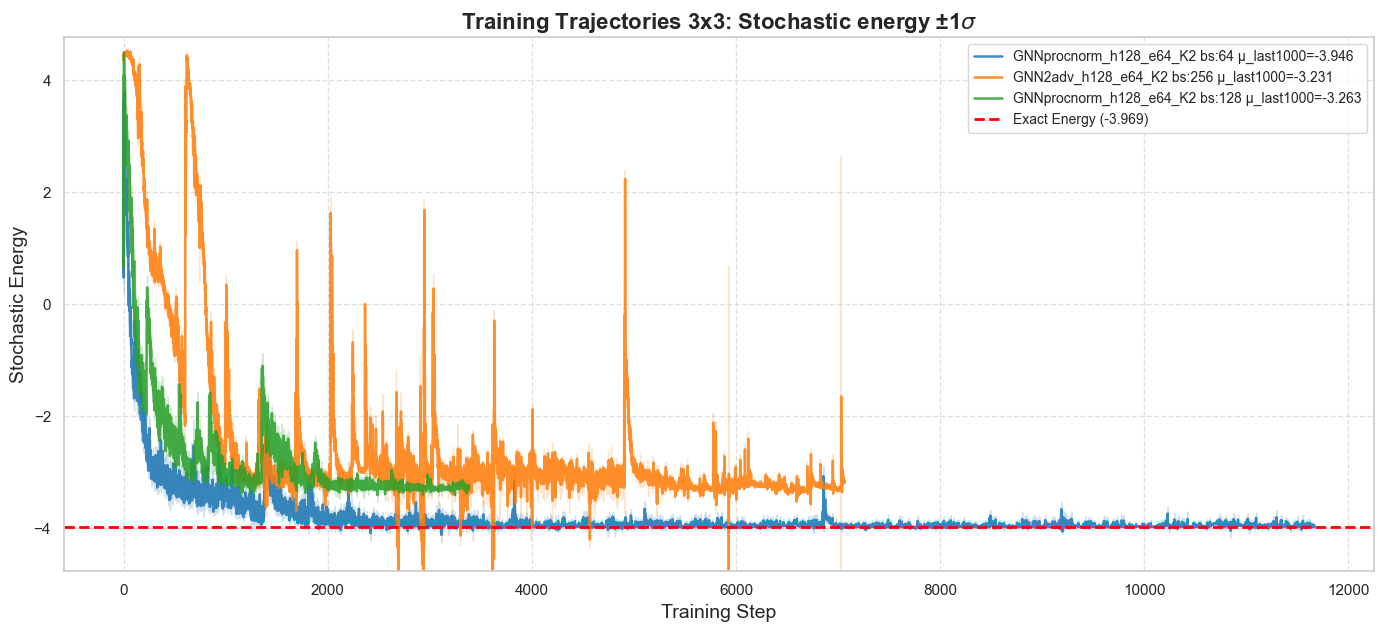

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


# Set seaborn style for prettier plots
sns.set_theme(style="whitegrid")

title_n=f"Training Trajectories {3}x{3}: Stochastic energy ±1" + r"$\sigma$"

plt.figure(figsize=(14, 12))

# calculate how far below exact_energy to clip
offset = 0.2 * abs(eden3x3)
ymin = eden3x3 - offset
runs_to_plot_df=pd.concat([df_sim_filt_seeded.tail(1), df_sim_filt_seeded.head(2)])
# get a categorical palette
palette = sns.color_palette("tab10", n_colors=len(runs_to_plot_df))

plt.figure(figsize=(14, 12))
ax1 = plt.subplot(2, 1, 1)

for (idx, run_data), color in zip(runs_to_plot_df.iterrows(), palette):
    steps       = np.array(run_data['steps'])
    energy      = np.array(run_data['training/energy_real'])
    std_energy  = np.array(run_data['training/std_energy'])
    tail_length= 1000
    # 1. compute mean of last 300 points (or all if shorter)
    tail = energy[-tail_length:] if len(energy) >= tail_length else energy
    final_mean = tail.mean()

    # extract a simpler run name
    run_name   = run_data.get('run_name', str(idx))
    print(run_name)
    m          = re.search(r'GNN\d+adv_h\d+_e\d+_K\d+', run_name)
    simple_name= m.group(0) if m else run_name.split('/')[-1]

    # Extract batch size
    bs_match = re.search(r'__bs_(\d+)lr', run_name)
    if bs_match:
        batch_size = int(bs_match.group(1))
    else:
        batch_size = None  # fallback if not found

    # --- Build label including batch size ---
    label = f"{simple_name} bs:{batch_size} μ_last{len(tail)}={final_mean:.3f}"

    ax1.plot(steps, energy,
             label=label,
             color=color,
             linewidth=1.8,
             alpha=0.85)

    ax1.fill_between(steps,
                     energy - std_energy,
                     energy + std_energy,
                     color=color,
                     alpha=0.2)

# 3. exact energy line
ax1.axhline(y=eden3x3,
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'Exact Energy ({eden3x3:.3f})')

# 4. clip y-axis to 20% below the ground truth
ax1.set_ylim(bottom=ymin,top=-ymin)
ax1.set_title(title_n, fontsize=16, fontweight='bold')
ax1.set_xlabel('Training Step', fontsize=14)
ax1.set_ylabel('Stochastic Energy', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.savefig("3x3Stoch.pdf", format="pdf", bbox_inches="tight")

plt.show()

# 4x4 Analysis 

In [8]:
import os, glob, re
import numpy as np
import pandas as pd
from simulation_analysis.load_from_paths import get_filtered_directories, batch_extract_tf_events, load_models_for_analysis

from tensorboard.backend.event_processing import event_accumulator
from tensorboard.compat.proto import tensor_pb2
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns 
from simulation_analysis.load_from_paths import filter_valid
filtered_dirs_4x4=get_filtered_directories(base_dir="saving_logs/**/GNN*", pattern=r'04_04')
df_ev_4x4=batch_extract_tf_events(filtered_dirs_4x4, tags=("training/energy_real", "training/std_energy",
 "training/staggered_magnetization_absv2","training/staggered_magnetization_abs","configuration/hyperparameters"))
n_steps_min=1000
df_4x4_filt=filter_valid(df_ev_4x4, column="training/energy_real", n_steps_min=n_steps_min,treshold=9)
df_4x4_filt.sort_values(by="final_energy_real", ascending=False, inplace=True)
df_sim_filt_seeded_4x4 = df_4x4_filt[~df_4x4_filt['seed'].isna()]
print(f"Original runs: {len(df_ev_4x4)}")
print(f"Runs after filtering (seed and >= {n_steps_min} iterations): {len(df_4x4_filt)}")

df_sim_filt_seeded_4x4



training/energy_real
final_energy_real
training/std_energy
final_std_energy
training/staggered_magnetization_absv2
final_staggered_magnetization_absv2
training/staggered_magnetization_abs
final_staggered_magnetization_abs
Original runs: 42
Runs after filtering (seed and >= 1000 iterations): 36


/home/stefanotroffa/thesis/computational_graphs/simulation_analysis/load_from_paths.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt[col_name]= df_filt[col].apply(lambda x: x[-1] if len(x)>0 else pd.NA)
/home/stefanotroffa/thesis/computational_graphs/simulation_analysis/load_from_paths.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt[col_name]= df_filt[col].apply(lambda x: x[-1] if len(x)>0 else pd.NA)
/home/stefanotroffa/thesis/computational_graphs/simulation_analysis/load_from_pa

run_name  \
35  2dsquare_04_04_Neel/beta0.007__bs_128lr7.0e-04...   
9   2dsquare_04_04_Neel/beta0.07__bs_256lr7.0e-04_...   
33  2dsquare_04_04_Neel/beta0.007__bs_128lr7.0e-04...   
32  2dsquare_04_04_Neel/beta0.007__bs_128lr7.0e-04...   
6   2dsquare_04_04_Neel/beta0.007__bs_128lr7.0e-04...   
14  2dsquare_04_04_Neel/beta0.007__bs_128lr7.0e-04...   
19  2dsquare_04_04_Neel/beta0.007__bs_128lr7.0e-04...   
16  2dsquare_04_04_Neel/beta0.007__bs_128lr7.0e-04...   
8   2dsquare_04_04_Neel/beta0.007__bs_128lr1.0e-04...   
18  2dsquare_04_04_Neel/beta0.007__bs_128lr7.0e-04...   
21  2dsquare_04_04_Neel/beta0.007__bs_128lr1.0e-04...   
34  2dsquare_04_04_Neel/beta0.007__bs_128lr1.0e-04...   
31  2dsquare_04_04_Neel/beta0.007__bs_128lr1.0e-04...   
15  2dsquare_04_04_Neel/beta0.01__bs_128lr1.0e-04_...   
23  2dsquare_04_04_Neel/beta0.05__bs_128lr2.0e-04_...   
27  2dsquare_04_04_Neel/beta0.007__bs_128lr1.0e-04...   
40  2dsquare_04_04_Neel/beta0.05__bs_256lr2.0e-04_...   
36  2dsquare_04_04_Neel/beta0.007__bs_128lr1.0e-04...   
17  2dsquare_04_04_Neel/beta0.07__bs_512lr1.0e-04_...   
28  2dsquare_04_04_Neel/beta0.005__bs_128lr1.0e-04...   
12  2dsquare_04_04_Neel/beta0.08__bs_256lr2.0e-04_...   
7   2dsquare_04_04_Neel/beta0.007__bs_128lr1.0e-04...   
10  2dsquare_04_04_Neel/beta0.07__bs_256lr1.0e-04_...   
11  2dsquare_04_04_Neel/beta0.08__bs_256lr2.0e-04_...   
5   2dsquare_04_04_Neel/beta0.007__bs_128lr7.0e-04...   
4   2dsquare_04_04_Neel/beta0.007__bs_128lr2.0e-04...   
41  2dsquare_04_04_Neel/beta0.07__bs_128lr1.0e-04_...   
22  2dsquare_04_04_Neel/beta0.07__bs_128lr1.0e-04_...   
1   2dsquare_04_04_Alternatepattern/beta0.05__bs_2...   
0   2dsquare_04_04_Alternatepattern/beta0.08__bs_2...   

                                 training/energy_real  \
35  [7.916090965270996, 4.3240437507629395, 6.8065...   
9   [5.755867958068848, -0.25183039903640747, 6.84...   
33  [7.967571258544922, 4.198687553405762, 8.00663...   
32  [7.93618631362915, 3.9243574142456055, 7.32320...   
6   [7.917842864990234, 4.113896369934082, 7.78167...   
14  [7.937460422515869, 3.651614189147949, 7.70096...   
19  [7.878270149230957, -3.329833507537842, -2.111...   
16  [7.754756927490234, 0.6780304312705994, 7.9827...   
8   [7.920987129211426, 7.844207763671875, 7.91628...   
18  [7.948849201202393, 3.4533846378326416, 7.7113...   
21  [6.857785224914551, -4.149281978607178, 5.0594...   
34  [7.931585788726807, 7.874752998352051, 7.81013...   
31  [8.007383346557617, 7.908117294311523, 7.91500...   
15  [5.128750801086426, -2.051365852355957, -5.269...   
23  [7.048408508300781, -5.80708122253418, -5.0826...   
27  [7.931365966796875, 7.74617862701416, 7.841953...   
40  [6.907749176025391, -3.8881826400756836, -0.43...   
36  [7.9737372398376465, 7.931580543518066, 7.9436...   
17  [5.292695045471191, -1.2881617546081543, 2.427...   
28  [6.926338195800781, -2.7981739044189453, -2.27...   
12  [5.371957302093506, -3.277643918991089, 4.8022...   
7   [7.936666011810303, 7.772854804992676, 7.86491...   
10  [5.7053093910217285, -0.4418197572231293, 1.80...   
11  [5.071165084838867, -3.9303622245788574, 4.217...   
5   [7.916623115539551, 3.403097152709961, 5.46522...   
4   [7.873477458953857, 4.6312456130981445, 7.4073...   
41  [5.619373798370361, -0.5955134630203247, 1.194...   
22  [5.326948165893555, -1.226241946220398, 2.3724...   
1   [6.540216445922852, 1.0264861583709717, 3.3713...   
0   [6.602404594421387, 0.8203437328338623, 3.7216...   

                                                steps  \
35  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
9   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
33  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
32  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
6   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
14  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
19  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
16  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...

2dsquare_04_04_Neel/beta0.07__bs_128lr1.0e-04_loop1212x15_overlap_VMC/GNNprocnorm_h128_e64_K2
2dsquare_04_04_Neel/beta0.07__bs_128lr1.0e-04_loop1200x15_overlap_VMC/GNNprocnorm_h128_e64_K2


<Figure size 1400x1200 with 0 Axes>

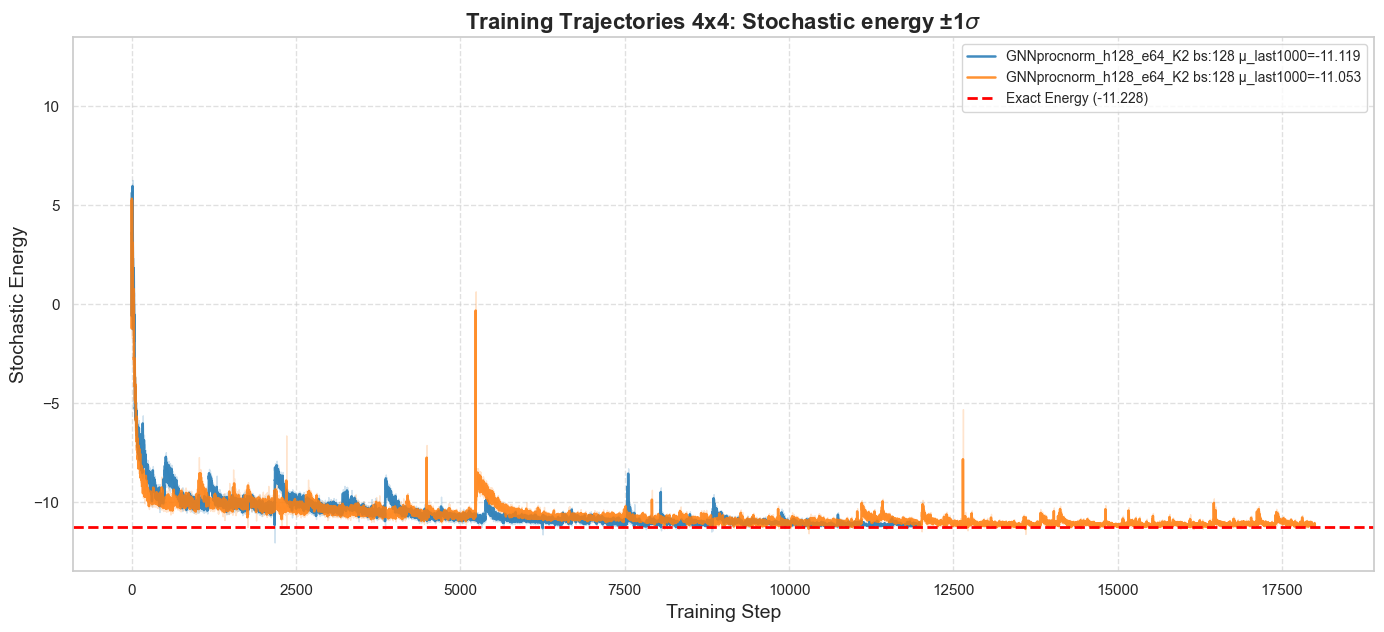

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


# Set seaborn style for prettier plots
sns.set_theme(style="whitegrid")

title_n=f"Training Trajectories {4}x{4}: Stochastic energy ±1" + r"$\sigma$"

plt.figure(figsize=(14, 12))
exact_energy = -11.228
# calculate how far below exact_energy to clip
offset = 0.2 * abs(exact_energy)
ymin = exact_energy - offset
runs_to_plot_df=pd.concat([df_sim_filt_seeded_4x4.tail(4)[0:2]])
# get a categorical palette
palette = sns.color_palette("tab10", n_colors=len(runs_to_plot_df))

plt.figure(figsize=(14, 12))
ax1 = plt.subplot(2, 1, 1)

for (idx, run_data), color in zip(runs_to_plot_df.iterrows(), palette):
    steps       = np.array(run_data['steps'])
    energy      = np.array(run_data['training/energy_real'])
    std_energy  = np.array(run_data['training/std_energy'])
    tail_length= 1000
    # 1. compute mean of last 300 points (or all if shorter)
    tail = energy[-tail_length:] if len(energy) >= tail_length else energy
    final_mean = tail.mean()

    # extract a simpler run name
    run_name   = run_data.get('run_name', str(idx))
    print(run_name)
    m          = re.search(r'GNN\d+adv_h\d+_e\d+_K\d+', run_name)
    simple_name= m.group(0) if m else run_name.split('/')[-1]

    # Extract batch size
    bs_match = re.search(r'__bs_(\d+)lr', run_name)
    if bs_match:
        batch_size = int(bs_match.group(1))
    else:
        batch_size = None  # fallback if not found

    # --- Build label including batch size ---
    label = f"{simple_name} bs:{batch_size} μ_last{len(tail)}={final_mean:.3f}"

    ax1.plot(steps, energy,
             label=label,
             color=color,
             linewidth=1.8,
             alpha=0.85)

    ax1.fill_between(steps,
                     energy - std_energy,
                     energy + std_energy,
                     color=color,
                     alpha=0.2)

# 3. exact energy line
ax1.axhline(y=exact_energy,
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'Exact Energy ({exact_energy:.3f})')

# 4. clip y-axis to 20% below the ground truth
ax1.set_ylim(bottom=ymin,top=-ymin)
ax1.set_title(title_n, fontsize=16, fontweight='bold')
ax1.set_xlabel('Training Step', fontsize=14)
ax1.set_ylabel('Stochastic Energy', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.savefig("stochen4x4.pdf", format="pdf", bbox_inches="tight")

plt.show()

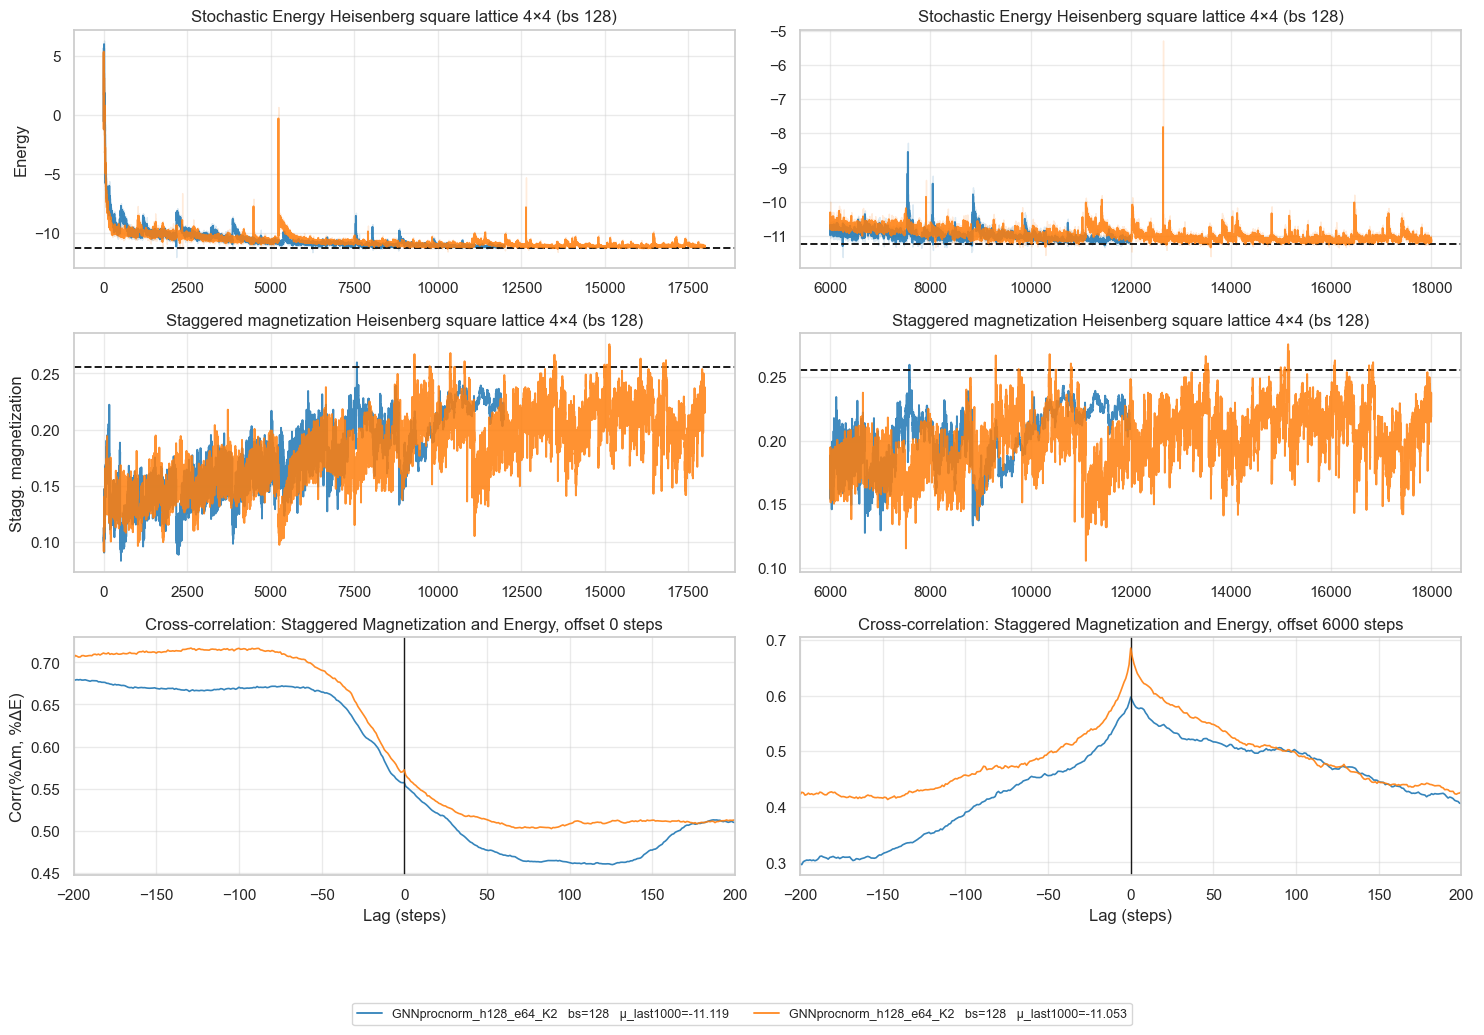

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import re

def plot_multi_runs_3x2(df_runs, run_indices, offset_training,
                        E_exact, m_exact,
                        max_lag=200, show_sigma=False):
    """
    3 × 2 panel:          full-run (col-0) | offset-run (col-1)
           row-0  energy
           row-1  magnetization
           row-2  cross-corr (%Δm , %ΔE)

    df_runs      : your dataframe
    run_indices  : list/tuple of row numbers to plot
    offset_training : int, starting step of the second column
    E_exact, m_exact: reference values
    """
    m_exact/=2
    # ── styling ────────────────────────────────────────────────
    colours = plt.cm.tab10.colors
    fig, axes = plt.subplots(3, 2, figsize=(15, 10),
                             gridspec_kw={'height_ratios':[1,1,1]})

    titles_row0 = ["Stochastic Energy Heisenberg square lattice 4×4 (bs 128)",
                   "Stochastic Energy Heisenberg square lattice 4×4 (bs 128)"]
    titles_row1 = ["Staggered magnetization Heisenberg square lattice 4×4 (bs 128)",
                   "Staggered magnetization Heisenberg square lattice 4×4 (bs 128)"]
    titles_row2 = [f"Cross-correlation: Staggered Magnetization and Energy, offset 0 steps",
                   f"Cross-correlation: Staggered Magnetization and Energy, offset {offset_training} steps"]

    # iterate through runs
    for i, idx in enumerate(run_indices):
        colour = colours[i % len(colours)]
        run    = df_runs.iloc[idx]
        run_name = run.get("run_name", str(idx))
        simple  = re.search(r'GNN(?:\d+adv)?_h\d+_e\d+_K\d+', run_name)
        simple_name   = simple.group(0) if simple else run_name.split('/')[-1]
    # simple_name= m.group(0) if m else 
        

        steps_all  = np.asarray(run["steps"])
        energy_all = np.asarray(run["training/energy_real"])
        mag_all    = np.asarray(run["training/staggered_magnetization_absv2"])/2
        if show_sigma and "training/std_energy" in run:
            std_all = np.asarray(run["training/std_energy"])
        else:
            std_all = None
        tail_length= 1000
        # 1. compute mean of last 300 points (or all if shorter)
        tail = energy_all[-tail_length:] if len(energy_all) >= tail_length else energy_all
        final_mean = tail.mean()
        # Extract batch size
        bs_match = re.search(r'__bs_(\d+)lr', run_name)
        if bs_match:
            batch_size = int(bs_match.group(1))
        else:
            batch_size = None  # fallback if not found        
        label = f"{simple_name}   bs={batch_size}   μ_last{len(tail)}={final_mean:.3f}"

        # --- two columns: col=0 (full)  col=1 (offset) ----------
        for col, offset in enumerate([0, offset_training]):
            steps  = steps_all[offset:]
            energy = energy_all[offset:]
            mag    = mag_all[offset:]
            std    = std_all[offset:] if std_all is not None else None

            # ── ENERGY ──────────────────────────────────────────
            axE = axes[0, col]
            axE.plot(steps, energy, color=colour, label=label, alpha=0.85, lw=1.4)
            if std is not None and show_sigma:
                axE.fill_between(steps, energy-std, energy+std,
                                 color=colour, alpha=0.15)
            if i == 0:                       # only once
                axE.axhline(E_exact, ls='--', lw=1.4, color='k')
                axE.set_title(titles_row0[col], fontsize=12)
                axE.set_ylabel("Energy" if col==0 else "")
                axE.grid(True, alpha=0.4)

            # --- MAGNETIZATION ---------------------------------
            axM = axes[1, col]
            axM.plot(steps, mag, color=colour, alpha=0.85, lw=1.4)
            if i == 0:
                axM.axhline(m_exact, ls='--', lw=1.4, color='k')
                axM.set_title(titles_row1[col], fontsize=12)
                axM.set_ylabel("Stagg. magnetization" if col==0 else "")
                axM.grid(True, alpha=0.4)

            # --- CROSS-CORRELATION -----------------------------
            pct_e = 100*np.abs(energy - E_exact)/abs(E_exact)
            pct_m = 100*np.abs(mag    - m_exact)/abs(m_exact)
            lags  = np.arange(-max_lag, max_lag+1)
            cc    = np.empty_like(lags, dtype=float)
            for k, lag in enumerate(lags):
                if   lag < 0: cc[k] = np.corrcoef(pct_m[:lag],  pct_e[-lag:])[0,1]
                elif lag > 0: cc[k] = np.corrcoef(pct_m[lag:], pct_e[:-lag])[0,1]
                else:         cc[k] = np.corrcoef(pct_m, pct_e)[0,1]

            axC = axes[2, col]
            axC.plot(lags, cc, color=colour, lw=1.2, alpha=0.9)
            if i == 0:
                axC.set_title(titles_row2[col], fontsize=12)
                axC.set_xlim(-max_lag, max_lag)
                axC.axvline(0, color='k', lw=1)
                axC.set_xlabel("Lag (steps)")
                axC.set_ylabel("Corr(%Δm, %ΔE)" if col==0 else "")
                axC.grid(True, alpha=0.4)

    # shared legend --------------------------------------------------
    handles, labels = axes[0,0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center',
               bbox_to_anchor=(0.5, -0.04), ncol=min(3,len(labels)), fontsize=9)

    plt.tight_layout(rect=[0, 0.05, 1, 1])   # leave room for legend
    plt.savefig("full4x4_corr.pdf", format="pdf", bbox_inches="tight")

    plt.show()


# ─── HOW TO CALL ────────────────────────────────────────────────────
offset_training = 6000           # the shift that defines column-2
run_indices     = [0, 1]       # whichever rows you want to overlay

plot_multi_runs_3x2(
    runs_to_plot_df,
    run_indices      = run_indices,
    offset_training  = offset_training,
    E_exact          = -11.228,
    m_exact          = 0.512,
    max_lag          = 200,
    show_sigma       = True        # set False if you don’t log std
    )


# 4x4 on 6x6

In [61]:
from simulation_analysis.load_from_paths import get_filtered_directories, batch_extract_tf_events, load_models_for_analysis
import os, glob, re
import numpy as np
import pandas as pd
from simulation_analysis.load_from_paths import filter_valid
filtered_dirs_4x4[0]


'saving_logs/system_Heisenberg/2dsquare_04_04_Alternatepattern/beta0.08__bs_256lr2.0e-04_loop1269x20_overlap_VMC/GNNprocnorm_h128_e64_K2'

In [63]:
df_sim_filt_seeded_4x4.tail(5)

run_name  \
4   2dsquare_04_04_Neel/beta0.007__bs_128lr2.0e-04...   
41  2dsquare_04_04_Neel/beta0.07__bs_128lr1.0e-04_...   
22  2dsquare_04_04_Neel/beta0.07__bs_128lr1.0e-04_...   
1   2dsquare_04_04_Alternatepattern/beta0.05__bs_2...   
0   2dsquare_04_04_Alternatepattern/beta0.08__bs_2...   

                                 training/energy_real  \
4   [7.873477458953857, 4.6312456130981445, 7.4073...   
41  [5.619373798370361, -0.5955134630203247, 1.194...   
22  [5.326948165893555, -1.226241946220398, 2.3724...   
1   [6.540216445922852, 1.0264861583709717, 3.3713...   
0   [6.602404594421387, 0.8203437328338623, 3.7216...   

                                                steps  \
4   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
41  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
22  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
1   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
0   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                  training/std_energy  \
4   [0.06544038653373718, 0.37451764941215515, 0.1...   
41  [0.33786141872406006, 0.4946434795856476, 0.43...   
22  [0.342280775308609, 0.4682053327560425, 0.4085...   
1   [0.15718799829483032, 0.23079662024974823, 0.2...   
0   [0.1502102166414261, 0.22352629899978638, 0.24...   

               training/staggered_magnetization_absv2  \
4   [0.177734375, 0.2109375, 0.1865234375, 0.19824...   
41  [0.208984375, 0.201171875, 0.2138671875, 0.213...   
22  [0.19921875, 0.1943359375, 0.197265625, 0.1835...   
1   [0.20556640625, 0.22021484375, 0.1982421875, 0...   
0   [0.2060546875, 0.2099609375, 0.203125, 0.19384...   

                 training/staggered_magnetization_abs  \
4   [0.177734375, 0.2109375, 0.1865234375, 0.19824...   
41  [0.208984375, 0.201171875, 0.2138671875, 0.213...   
22  [0.19921875, 0.1943359375, 0.197265625, 0.1835...   
1   [0.20556640625, 0.22021484375, 0.1982421875, 0...   
0   [0.2060546875, 0.2099609375, 0.203125, 0.19384...   

                        configuration/hyperparameters  final_energy_real  \
4   [b'beta: 0.007\nlearning_rate: 0.0002\nseed: 8...         -10.885833   
41  [b'beta: 0.07\nlearning_rate: 0.0001\nseed: 86...         -11.066780   
22  [b'beta: 0.07\nlearning_rate: 0.0001\nseed: 86...         -11.106196   
1   [b'beta: 0.05\nlearning_rate: 0.0002\nseed: 86...         -11.161640   
0   [b'beta: 0.08\nlearning_rate: 0.0002\nseed: 86...         -11.172536   

    final_std_energy final_staggered_magnetization_absv2  \
4           0.086060                            0.455078   
41          0.059997                            0.422852   
22          0.037609                              0.4375   
1           0.058876                            0.501465   
0           0.042247                            0.426758   

   final_staggered_magnetization_abs  \
4                           0.455078   
41                          0.422852   
22                            0.4375   
1                           0.501465   
0                           0.426758   

                                           config_str   beta      lr      seed  
4   [b'beta: 0.007\nlearning_rate: 0.0002\nseed: 8...  0.007  0.0002  860432.0  
41  [b'beta: 0.07\nlearning_rate: 0.0001\nseed: 86...  0.070  0.0001  860432.0  
22  [b'beta: 0.07\nlearning_rate: 0.0001\nseed: 86...  0.070  0.0001  860432.0  
1   [b'beta: 0.05\nlearning_rate: 0.0002\nseed: 86...  0.050  0.0002  860432.0  
0   [b'beta: 0.08\nlearning_rate: 0.0002\nseed: 86...  0.080  0.0002  860432.0

In [64]:
model_loaded_for6x6=load_models_for_analysis(df_sim_filt_seeded_4x4.tail(4),filtered_dirs_4x4)

→ checkpoint: saving_logs/system_Heisenberg/2dsquare_04_04_Alternatepattern/beta0.08__bs_256lr2.0e-04_loop1269x20_overlap_VMC/GNNprocnorm_h128_e64_K2/checkpoints/ckpt-9



I0000 00:00:1747908446.326154   31200 service.cc:145] XLA service 0x47bbcee0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747908446.330007   31200 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-05-22 12:07:28.216690: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-22 12:07:28.942655: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1747908451.323137   31200 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


✘ Model initialized, psi_val[0]=[-0.456836  -0.9999997]
✔ Model loaded from saving_logs/system_Heisenberg/2dsquare_04_04_Alternatepattern/beta0.08__bs_256lr2.0e-04_loop1269x20_overlap_VMC/GNNprocnorm_h128_e64_K2,
, psi_val[0]=[-0.6254263  6.184466 ]
→ checkpoint: saving_logs/system_Heisenberg/2dsquare_04_04_Alternatepattern/beta0.05__bs_256lr2.0e-04_loop1221x40_overlap_VMC/GNNprocnorm_h128_e64_K2/checkpoints/ckpt-6

✘ Model initialized, psi_val[0]=[ 1.106405  -0.9999997]
✔ Model loaded from saving_logs/system_Heisenberg/2dsquare_04_04_Alternatepattern/beta0.05__bs_256lr2.0e-04_loop1221x40_overlap_VMC/GNNprocnorm_h128_e64_K2,
, psi_val[0]=[-0.41702476  7.5979433 ]
→ checkpoint: saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.07__bs_128lr1.0e-04_loop1200x15_overlap_VMC/GNNprocnorm_h128_e64_K2/checkpoints/ckpt-39

✘ Model initialized, psi_val[0]=[ 0.1468317  -0.99999976]
✔ Model loaded from saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.07__bs_128lr1.0e-04_loop1200x15_ove

## Evaluation routine, this time we will make sure to save the data!


In [78]:
from compgraph.tensorflow_version.hamiltonian_operations import stochastic_energy_tf
import time as time
from simulation.tf_simulation_checkpoints import batch_staggered_metrics_pm1
from simulation.initializer import create_graph_from_ham
from compgraph.tensorflow_version.graph_tuple_manipulation import initialize_graph_tuples_tf_opt, precompute_graph_structure
from compgraph.monte_carlo import MCMCSampler
batch_size = 128
rows_complete=[]
graph_6x6,sublattice_6x6_neel_for_stagger=create_graph_from_ham('2dsquare',
                                                         (6,6),sublattice='Neel')
senders, receivers, edge_pairs=precompute_graph_structure(graph_6x6)
subl_idx = tf.argmax(sublattice_6x6_neel_for_stagger, axis=1)  # shape (N,)
stagger_factor_single = tf.where(subl_idx == 0, 1.0, -1.0)
n_sites6x6 = 36
for run_key, data in model_loaded_for6x6.items():
    model = data["model"]
    hyperparams = data["hyperparams"]

    graph_6x6,sublattice_6x6=create_graph_from_ham(hyperparams.graph_params.graphType,
                                                         (6,6),
                                                            sublattice=hyperparams.graph_params.sublattice)
    print(sublattice_6x6)
    print(run_key)
    GT_batch_temp=initialize_graph_tuples_tf_opt(batch_size, graph_6x6, sublattice_encoding=sublattice_6x6)
    template_graphs_output=initialize_graph_tuples_tf_opt(tf.shape(edge_pairs)[0]+1,graph_6x6,sublattice_6x6)
    print(model(GT_batch_temp)[82])  # Ensure model is initialized
    psi=model(GT_batch_temp)
    # 1) Initialize the graph
    initial_energy, std_initial,_ =stochastic_energy_tf(psi, model, edge_pairs, template_graphs_output,GT_batch_temp,0)
    print("Initial energy:", initial_energy, 'std',std_initial)
    sampler_var_temp=MCMCSampler(GT_batch_temp)
    thermalization=500*n_sites6x6

    for i in range(thermalization):

        GT_batch_temp, psi=sampler_var_temp.monte_carlo_update_on_batch_profilemem(model,GT_batch_temp)
    energy_after_term, std_after_term,_ =stochastic_energy_tf(psi, model, edge_pairs, template_graphs_output,GT_batch_temp,0)

    print("Energy after:", energy_after_term, 'std',std_after_term)
    en_std = []
    en_real = []
    en_imag  = []
    all_mrms = []
    all_mabs = []
    all_Spp  = []
        
    start_time=time.time()
    sampling=500

    for step in range(sampling):
        for j in range(n_sites6x6):
            GT_batch_temp, psi_new=sampler_var_temp.monte_carlo_update_on_batch_profilemem(model,GT_batch_temp)
        spins_flat = GT_batch_temp.nodes[:,0]                  
        spins_2d    = tf.reshape(spins_flat, (batch_size, n_sites6x6))    
        
        m_rms, m_abs, S_pp = batch_staggered_metrics_pm1(spins_2d, stagger_factor_single)
        all_mrms.append(m_rms.numpy())
        all_mabs.append(m_abs.numpy())
        all_Spp.append(S_pp.numpy())
        energy, std_energy,_ =stochastic_energy_tf(psi_new, model, edge_pairs, template_graphs_output,GT_batch_temp,0)
        print(energy)
        # 4) Compute staggered metrics
        # m_rms, m_abs, S_pp = batch_staggered_metrics_pm1(spins_2d, eps_larger)
        en_std.append(tf.math.real(std_energy))
        en_real.append(tf.math.real(energy))
        en_imag.append(tf.math.imag(energy))
        all_mrms.append(m_rms.numpy())
        all_mabs.append(m_abs.numpy())
        all_Spp.append(S_pp.numpy())
        rows_complete.append({
            "run":      run_key,
            "step":     step,
            "en_std":   float(tf.math.real(std_energy)),
            "en_real":  float(tf.math.real(energy)),
            "en_imag":  float(tf.math.imag(energy)),
            "m_rms":    float(m_rms.numpy()),
            "m_abs":    float(m_abs.numpy()),
            "S_pp":     float(S_pp.numpy())
        })
               
    start_time=time.time()

    print("Tempo per campionamento:", time.time()-start_time)    
# Costruisco il DataFrame unico
df_traj_6x6 = pd.DataFrame(rows_complete)


[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
GNNprocnorm_h128_e64_K2_b0.08_bs256_lr0.0002_0
tf.Tensor([-0.89767444 19.135738  ], shape=(2,), dtype=float32)
Initial energy: tf.Tensor((1.6685662-0.6671433j), shape=(), dtype=complex64) std tf.Tensor(11.832793, shape=(), dtype=float32)
Energy after: tf.Tensor((1.3440217+1.0487328j), shape=(), dtype=complex64) std tf.Tensor(10.794739, shape=(), dtype=float32)
tf.Tensor((1.9896207-0.22614829j), shape=(), dtype=complex64)
tf.Tensor((0.6781087-0.040573567j), shape=(), dtype=complex64)
tf.Tensor((0.9539072+0.16492262j), shape=(), dtype=complex64)
tf.Tensor((0.54463977+0.8948338j), shape=(), dtype=complex64)
tf.Tensor((4.105603-1.4862127j), shape=(), dtype=complex64)
tf.

In [88]:
for key, val in model_loaded_for6x6.items():
    print(key, val['hyperparams'].graph_params)

GNNprocnorm_h128_e64_K2_b0.08_bs256_lr0.0002_0 GraphParams(graphType='2dsquare', n=4, m=4, sublattice='Alternatepattern')
GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_1 GraphParams(graphType='2dsquare', n=4, m=4, sublattice='Alternatepattern')
GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_2 GraphParams(graphType='2dsquare', n=4, m=4, sublattice='Neel')
GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_3 GraphParams(graphType='2dsquare', n=4, m=4, sublattice='Neel')


GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_1
GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_2
GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_3
GNNprocnorm_h128_e64_K2_b0.08_bs256_lr0.0002_0


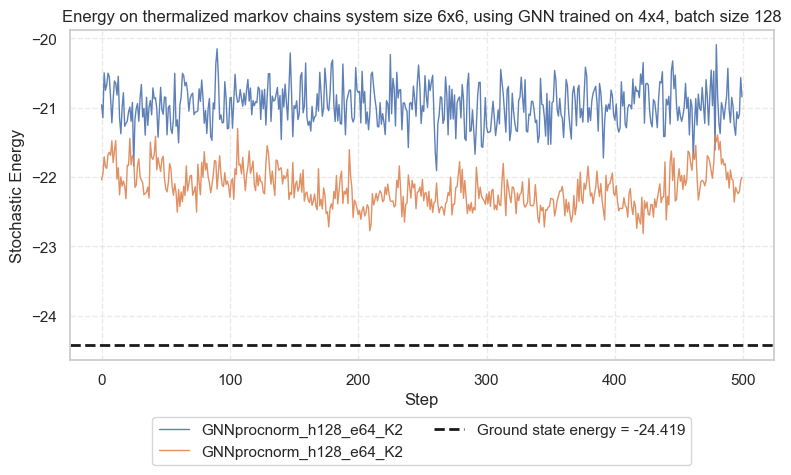

In [97]:


import pandas as pd
import matplotlib.pyplot as plt
exact_energy_6x6 = -0.6783*36 
def abbrevia(key):
    m = re.match(r'^(.*?K.).*(.)$', key)
    if m:
        return f"{m.group(1)}"
    else:
        return key[:10] + "…" + key[-1]
# 2) Plot raw trajectories con legenda esterna
# 4. Plot delle traiettorie
fig, ax = plt.subplots(figsize=(8, 5))
for run_key, df_run in df_traj_6x6.groupby('run'):
    print(run_key)
 
    if run_key=='GNNprocnorm_h128_e64_K2_b0.08_bs256_lr0.0002_0':

        continue
    if run_key=='GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_1':
        continue
    ax.plot(df_run['step'], df_run['en_real'],
             alpha=0.9, linewidth=1, label=abbrevia(run_key))
    # 5. Linea orizzontale Quimb
# ax.axhline(exact_energy_6x6, color='k', linestyle='--', linewidth=2,
#            label=f"Ground state energy per site (approx) = {exact_energy_6x6/36:.3f}")
ax.axhline(exact_energy_6x6, color='k', linestyle='--', linewidth=2,
            label=f"Ground state energy = {exact_energy_6x6:.3f}")
ax.set_xlabel('Step')
ax.set_ylabel(r'Stochastic Energy')
ax.set_title('Energy on thermalized markov chains system size 6x6, using GNN trained on 4x4, batch size 128')
ax.grid(True, linestyle='--', alpha=0.4)
# Legenda sotto, 2 colonne (regola ncol in base al num. di run)
ax.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=2,
           frameon=True)

fig.tight_layout()
fig.savefig("stochen4x4_to6x6.pdf", format="pdf", bbox_inches="tight")

plt.savefig("stochen4x4_to6x6.pdf", format="pdf", bbox_inches="tight")

plt.show()


# plt.show()

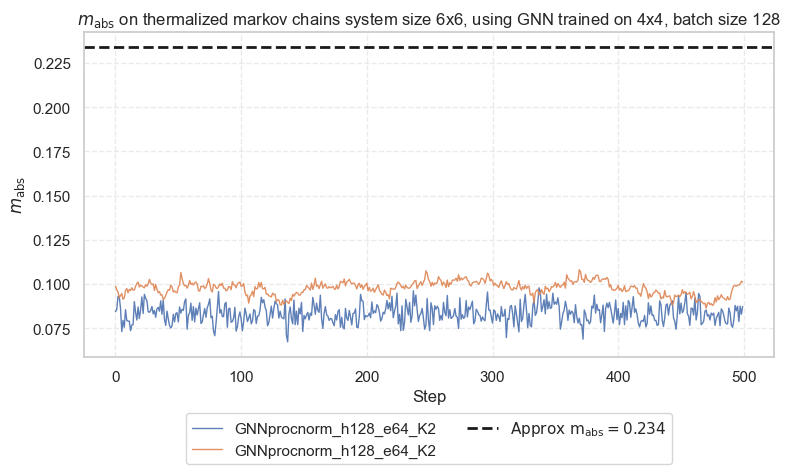

GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_1
GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_2
GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_3
GNNprocnorm_h128_e64_K2_b0.08_bs256_lr0.0002_0


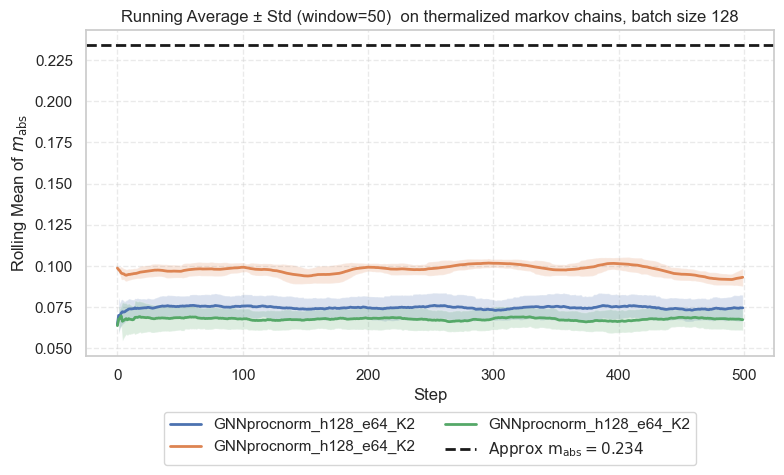

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
exact_energy_6x6 = -0.6783*36 
m_abs6x6=0.234
def abbrevia(key):
    m = re.match(r'^(.*?K.).*(.)$', key)
    if m:
        return f"{m.group(1)}"
    else:
        return key[:10] + "…" + key[-1]
# 2) Plot raw trajectories con legenda esterna
# 4. Plot delle traiettorie
fig, ax = plt.subplots(figsize=(8, 5))
for run_key, df_run in df_traj_6x6.groupby('run'):
    if run_key=='GNNprocnorm_h128_e64_K2_b0.08_bs256_lr0.0002_0':

        continue
    if run_key=='GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_1':
        continue  
    ax.plot(df_run['step'], df_run['m_abs']/2,
             alpha=0.9, linewidth=1, label=abbrevia(run_key))
    # 5. Linea orizzontale Quimb
ax.axhline(m_abs6x6, color='k', linestyle='--', linewidth=2,
           label=fr"$\mathrm{{Approx\ m_{{abs}}}} = {m_abs6x6:.3f}$")
ax.set_xlabel('Step')
ax.set_ylabel(r'$m_\mathrm{abs}$')
ax.set_title('$m_{\\rm abs}$ on thermalized markov chains system size 6x6, using GNN trained on 4x4, batch size 128')
ax.grid(True, linestyle='--', alpha=0.4)
# Legenda sotto, 2 colonne (regola ncol in base al num. di run)
ax.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=2,
           frameon=True)

fig.tight_layout()
fig.savefig("stochen4x4_to6x6_mag.pdf", format="pdf", bbox_inches="tight")

plt.show()

# # 7. Plot rolling mean ± std (facoltativo)
window = 50
fig, ax = plt.subplots(figsize=(8, 5))
for run_key, df_run in df_traj_6x6.groupby('run'):
    print(run_key)
    if run_key=='GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_0':

        continue
    if run_key=='GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_2':
        continue
    rm = df_run['m_abs'].rolling(window, min_periods=1).mean()/2
    rs = df_run['m_abs'].rolling(window, min_periods=1).std()/np.sqrt(2)

    ax.plot(df_run['step'], rm, linewidth=2, label=abbrevia(run_key))
    ax.fill_between(df_run['step'], rm - rs, rm + rs, alpha=0.2)

ax.axhline(m_abs6x6, color='k', linestyle='--', linewidth=2,
           label=fr"$\mathrm{{Approx\ m_{{abs}}}} = {m_abs6x6:.3f}$")

ax.set_xlabel('Step')
ax.set_ylabel(r'Rolling Mean of $m_\mathrm{abs}$')
ax.set_title(f'Running Average ± Std (window={window})  on thermalized markov chains, batch size 128')
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(loc='upper center',
          bbox_to_anchor=(0.5, -0.15),
          ncol=2,
          frameon=True)
fig.tight_layout()
fig.savefig("stochen4x4_to6x6_mag_rolled_mean.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [96]:
plt.show()

<Figure size 640x480 with 0 Axes>

# 5x5 Analysis

In [25]:
import os, glob, re
import numpy as np
import pandas as pd
from simulation_analysis.load_from_paths import get_filtered_directories, batch_extract_tf_events, load_models_for_analysis

from tensorboard.backend.event_processing import event_accumulator
from tensorboard.compat.proto import tensor_pb2
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns 
from simulation_analysis.load_from_paths import filter_valid
filtered_dirs_5x5=get_filtered_directories(base_dir="saving_logs/**/GNN*", pattern=r'05_05')
df_ev_5x5=batch_extract_tf_events(filtered_dirs_5x5, tags=("training/energy_real", "training/std_energy",
 "training/staggered_magnetization_absv2","training/staggered_magnetization_abs","configuration/hyperparameters"))
n_steps_min=1000
df_5x5_filt=filter_valid(df_ev_5x5, column="training/energy_real", n_steps_min=n_steps_min,treshold=9)
df_5x5_filt.sort_values(by="final_energy_real", ascending=False, inplace=True)
df_sim_filt_seeded_5x5 = df_5x5_filt[~df_5x5_filt['seed'].isna()]
print(f"Original runs: {len(df_ev_5x5)}")
print(f"Runs after filtering (seed and >= {n_steps_min} iterations): {len(df_5x5_filt)}")

df_sim_filt_seeded_5x5



training/energy_real
final_energy_real
training/std_energy
final_std_energy
training/staggered_magnetization_absv2
final_staggered_magnetization_absv2
training/staggered_magnetization_abs
final_staggered_magnetization_abs
Original runs: 16
Runs after filtering (seed and >= 1000 iterations): 8


/home/stefanotroffa/thesis/computational_graphs/simulation_analysis/load_from_paths.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt[col_name]= df_filt[col].apply(lambda x: x[-1] if len(x)>0 else pd.NA)
/home/stefanotroffa/thesis/computational_graphs/simulation_analysis/load_from_paths.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt[col_name]= df_filt[col].apply(lambda x: x[-1] if len(x)>0 else pd.NA)
/home/stefanotroffa/thesis/computational_graphs/simulation_analysis/load_from_pa

run_name  \
13  2dsquare_05_05_Alternatepattern/beta0.007__bs_...   
11  2dsquare_05_05_Alternatepattern/beta0.02__bs_8...   
9   2dsquare_05_05_Alternatepattern/beta0.02__bs_1...   
14  2dsquare_05_05_Alternatepattern/beta0.07__bs_1...   

                                 training/energy_real  \
13  [10.123941421508789, 1.284308910369873, 6.4502...   
11  [10.050939559936523, 2.7262122631073, 7.654509...   
9   [10.217214584350586, 1.8150361776351929, 6.793...   
14  [10.141231536865234, 1.3757972717285156, 5.400...   

                                                steps  \
13  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
11  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
9   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
14  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                  training/std_energy  \
13  [0.17989854514598846, 0.29247841238975525, 0.3...   
11  [0.8015648126602173, 1.0991605520248413, 1.230...   
9   [0.24329382181167603, 0.4181347191333771, 0.42...   
14  [0.2702906131744385, 0.4248145818710327, 0.454...   

               training/staggered_magnetization_absv2  \
13  [0.15781250596046448, 0.15687499940395355, 0.1...   
11  [0.11999999731779099, 0.15000000596046448, 0.1...   
9   [0.1681250035762787, 0.1574999988079071, 0.169...   
14  [0.14562499523162842, 0.14562499523162842, 0.1...   

                 training/staggered_magnetization_abs  \
13  [0.15781250596046448, 0.15687499940395355, 0.1...   
11  [0.11999999731779099, 0.15000000596046448, 0.1...   
9   [0.1681249886751175, 0.1574999988079071, 0.169...   
14  [0.14562499523162842, 0.14562499523162842, 0.1...   

                        configuration/hyperparameters  final_energy_real  \
13  [b'beta: 0.007\nlearning_rate: 0.0001\nseed: 8...          -8.085846   
11  [b'beta: 0.02\nlearning_rate: 0.0001\nseed: 86...         -12.542562   
9   [b'beta: 0.02\nlearning_rate: 0.0001\nseed: 86...         -12.690029   
14  [b'beta: 0.07\nlearning_rate: 0.0001\nseed: 86...         -13.376591   

    final_std_energy final_staggered_magnetization_absv2  \
13          0.183202                              0.1275   
11          0.530249                                0.05   
9           0.159568                                0.08   
14          0.167214                               0.055   

   final_staggered_magnetization_abs  \
13                            0.1275   
11                              0.05   
9                               0.08   
14                             0.055   

                                           config_str   beta      lr      seed  
13  [b'beta: 0.007\nlearning_rate: 0.0001\nseed: 8...  0.007  0.0001  860432.0  
11  [b'beta: 0.02\nlearning_rate: 0.0001\nseed: 86...  0.020  0.0001  860432.0  
9   [b'beta: 0.02\nlearning_rate: 0.0001\nseed: 86...  0.020  0.0001  860432.0  
14  [b'beta: 0.07\nlearning_rate: 0.0001\nseed: 86...  0.070  0.0001  860432.0

2dsquare_05_05_Alternatepattern/beta0.02__bs_128lr1.0e-04_loop1800x15_overlap_VMC/GNNprocnorm_h128_e64_K2
2dsquare_05_05_Alternatepattern/beta0.07__bs_128lr1.0e-04_loop1212x15_overlap_VMC/GNNprocnorm_h128_e64_K2


<Figure size 1400x1200 with 0 Axes>

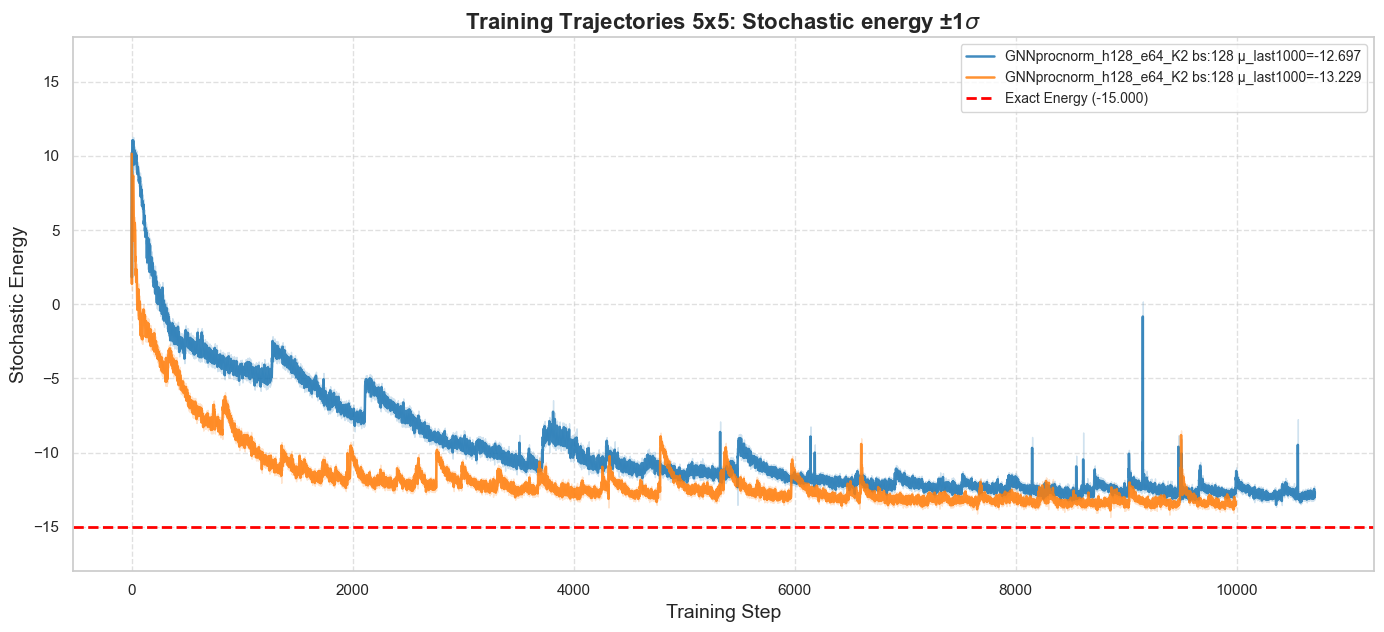

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


# Set seaborn style for prettier plots
sns.set_theme(style="whitegrid")

title_n=f"Training Trajectories {5}x{5}: Stochastic energy ±1" + r"$\sigma$"

plt.figure(figsize=(14, 12))
exact_energy = -15
# calculate how far below exact_energy to clip
offset = 0.2 * abs(exact_energy)
ymin = exact_energy - offset
runs_to_plot_df_5x5=pd.concat([df_sim_filt_seeded_5x5.tail(2)])
# get a categorical palette
palette = sns.color_palette("tab10", n_colors=len(runs_to_plot_df_5x5))

plt.figure(figsize=(14, 12))
ax1 = plt.subplot(2, 1, 1)

for (idx, run_data), color in zip(runs_to_plot_df_5x5.iterrows(), palette):
    steps       = np.array(run_data['steps'])
    energy      = np.array(run_data['training/energy_real'])
    std_energy  = np.array(run_data['training/std_energy'])
    tail_length= 1000
    # 1. compute mean of last 300 points (or all if shorter)
    tail = energy[-tail_length:] if len(energy) >= tail_length else energy
    final_mean = tail.mean()

    # extract a simpler run name
    run_name   = run_data.get('run_name', str(idx))
    print(run_name)
    m          = re.search(r'GNN\d+adv_h\d+_e\d+_K\d+', run_name)
    simple_name= m.group(0) if m else run_name.split('/')[-1]

    # Extract batch size
    bs_match = re.search(r'__bs_(\d+)lr', run_name)
    if bs_match:
        batch_size = int(bs_match.group(1))
    else:
        batch_size = None  # fallback if not found

    # --- Build label including batch size ---
    label = f"{simple_name} bs:{batch_size} μ_last{len(tail)}={final_mean:.3f}"

    ax1.plot(steps, energy,
             label=label,
             color=color,
             linewidth=1.8,
             alpha=0.85)

    ax1.fill_between(steps,
                     energy - std_energy,
                     energy + std_energy,
                     color=color,
                     alpha=0.2)

# 3. exact energy line
ax1.axhline(y=exact_energy,
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'Exact Energy ({exact_energy:.3f})')

# 4. clip y-axis to 20% below the ground truth
ax1.set_ylim(bottom=ymin,top=-ymin)
ax1.set_title(title_n, fontsize=16, fontweight='bold')
ax1.set_xlabel('Training Step', fontsize=14)
ax1.set_ylabel('Stochastic Energy', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

# 6x6 Analysis


In [29]:
import os, glob, re
import numpy as np
import pandas as pd
from simulation_analysis.load_from_paths import get_filtered_directories, batch_extract_tf_events, load_models_for_analysis

from tensorboard.backend.event_processing import event_accumulator
from tensorboard.compat.proto import tensor_pb2
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns 
from simulation_analysis.load_from_paths import filter_valid
filtered_dirs_6x6=get_filtered_directories(base_dir="saving_logs/**/GNN*", pattern=r'06_06')
df_ev_6x6=batch_extract_tf_events(filtered_dirs_6x6, tags=("training/energy_real", "training/std_energy",
 "training/staggered_magnetization_absv2","training/staggered_magnetization_abs","configuration/hyperparameters"))
n_steps_min=1000
df_6x6_filt=filter_valid(df_ev_6x6, column="training/energy_real", n_steps_min=n_steps_min,treshold=9)
df_6x6_filt.sort_values(by="final_energy_real", ascending=False, inplace=True)
df_sim_filt_seeded_6x6 = df_6x6_filt[~df_6x6_filt['seed'].isna()]
print(f"Original runs: {len(df_ev_6x6)}")
print(f"Runs after filtering (seed and >= {n_steps_min} iterations): {len(df_6x6_filt)}")

df_sim_filt_seeded_6x6



training/energy_real
final_energy_real
training/std_energy
final_std_energy
training/staggered_magnetization_absv2
final_staggered_magnetization_absv2
training/staggered_magnetization_abs
final_staggered_magnetization_abs
Original runs: 10
Runs after filtering (seed and >= 1000 iterations): 6


run_name  \
0  beta0.02__bs_512lr7.0e-04_loop1800x15_overlap_...   
7  beta0.007__bs_512lr1.0e-05_loop1210x15_overlap...   
9  beta0.02__bs_512lr1.0e-04_loop1800x15_overlap_...   
2  beta0.007__bs_256lr1.0e-04_loop1800x15_overlap...   

                                training/energy_real  \
0  [17.27730941772461, 9.117803573608398, 5.75454...   
7  [17.205810546875, 16.34490394592285, 16.933929...   
9  [17.217660903930664, -3.979381799697876, 6.361...   
2  [17.297046661376953, -0.5645076036453247, -2.0...   

                                               steps  \
0  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
7  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
9  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
2  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                 training/std_energy  \
0  [0.09151934087276459, 0.2760778069496155, 0.25...   
7  [0.09257156401872635, 0.13394485414028168, 0.1...   
9  [0.09520009160041809, 0.3386259377002716, 0.38...   
2  [0.11963870376348495, 0.47488170862197876, 0.6...   

              training/staggered_magnetization_absv2  \
0  [0.1342230886220932, 0.1453993022441864, 0.132...   
7  [0.1355251669883728, 0.1342230886220932, 0.133...   
9  [0.1252170205116272, 0.1427951455116272, 0.131...   
2  [0.1243489608168602, 0.140625, 0.1358506977558...   

                training/staggered_magnetization_abs  \
0  [0.1342230886220932, 0.1453993022441864, 0.132...   
7  [0.1355251669883728, 0.134223073720932, 0.1336...   
9  [0.1252170205116272, 0.1427951455116272, 0.131...   
2  [0.1243489533662796, 0.140625, 0.1358506977558...   

                       configuration/hyperparameters  final_energy_real  \
0  [b'beta: 0.02\nlearning_rate: 0.0007\nseed: 86...         -18.055347   
7  [b'beta: 0.007\nlearning_rate: 1e-05\nseed: 86...         -21.272280   
9  [b'beta: 0.02\nlearning_rate: 0.0001\nseed: 86...         -23.312176   
2  [b'beta: 0.007\nlearning_rate: 0.0001\nseed: 8...         -23.613245   

   final_std_energy final_staggered_magnetization_absv2  \
0          0.199630                            0.129991   
7          0.128041                            0.178385   
9          0.058332                            0.197374   
2          0.060736                            0.204427   

   final_staggered_magnetization_abs  \
0                           0.129991   
7                           0.178385   
9                           0.197374   
2                           0.204427   

                                          config_str   beta       lr      seed  
0  [b'beta: 0.02\nlearning_rate: 0.0007\nseed: 86...  0.020  0.00070  860432.0  
7  [b'beta: 0.007\nlearning_rate: 1e-05\nseed: 86...  0.007  0.00001  860432.0  
9  [b'beta: 0.02\nlearning_rate: 0.0001\nseed: 86...  0.020  0.00010  860432.0  
2  [b'beta: 0.007\nlearning_rate: 0.0001\nseed: 8...  0.007  0.00010  860432.0

beta0.02__bs_512lr7.0e-04_loop1800x15_overlap_VMC/GNNprocnorm_h128_e64_K2
beta0.007__bs_512lr1.0e-05_loop1210x15_overlap_VMC/GNNprocnorm_h128_e64_K2


<Figure size 1400x1200 with 0 Axes>

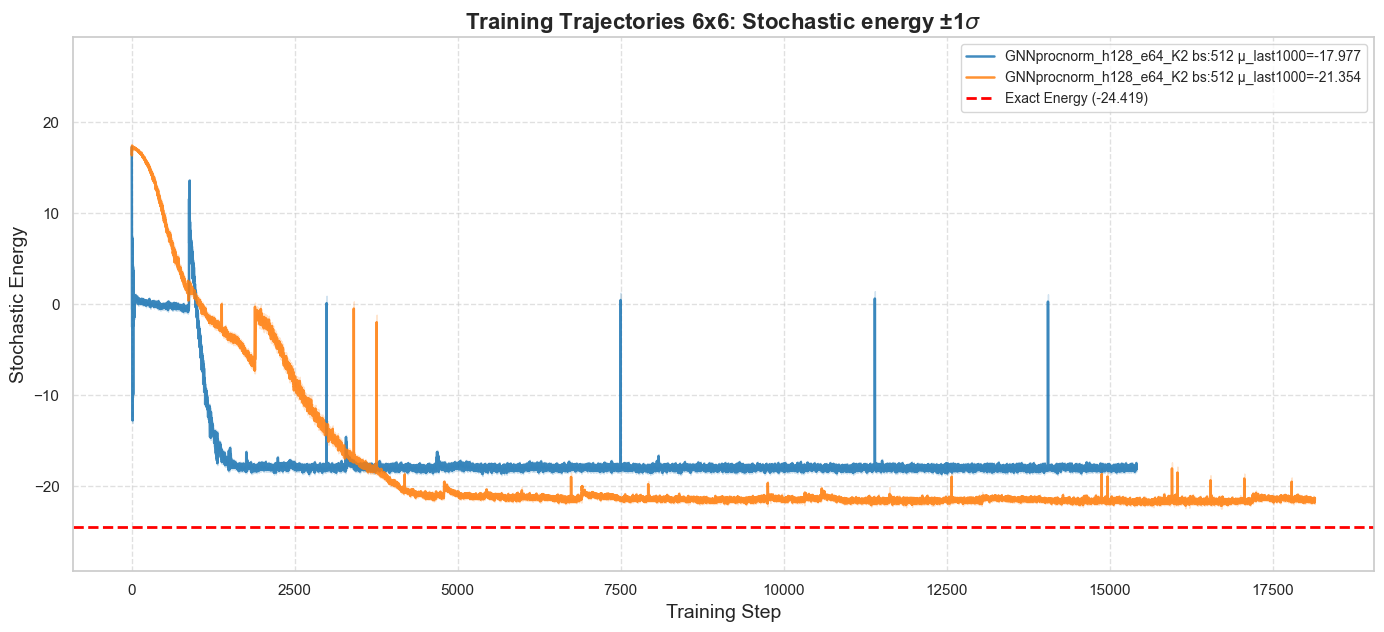

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


# Set seaborn style for prettier plots
sns.set_theme(style="whitegrid")

title_n=f"Training Trajectories {6}x{6}: Stochastic energy ±1" + r"$\sigma$"

plt.figure(figsize=(14, 12))
exact_energy = -24.419
# calculate how far below exact_energy to clip
offset = 0.2 * abs(exact_energy)
ymin = exact_energy - offset
runs_to_plot_df_6x6=pd.concat([df_sim_filt_seeded_6x6.tail(4)[0:2]])
# get a categorical palette
palette = sns.color_palette("tab10", n_colors=len(runs_to_plot_df_6x6))

plt.figure(figsize=(14, 12))
ax1 = plt.subplot(2, 1, 1)

for (idx, run_data), color in zip(runs_to_plot_df_6x6.iterrows(), palette):
    steps       = np.array(run_data['steps'])
    energy      = np.array(run_data['training/energy_real'])
    std_energy  = np.array(run_data['training/std_energy'])
    tail_length= 1000
    # 1. compute mean of last 300 points (or all if shorter)
    tail = energy[-tail_length:] if len(energy) >= tail_length else energy
    final_mean = tail.mean()

    # extract a simpler run name
    run_name   = run_data.get('run_name', str(idx))
    print(run_name)
    m          = re.search(r'GNN\d+adv_h\d+_e\d+_K\d+', run_name)
    simple_name= m.group(0) if m else run_name.split('/')[-1]

    # Extract batch size
    bs_match = re.search(r'__bs_(\d+)lr', run_name)
    if bs_match:
        batch_size = int(bs_match.group(1))
    else:
        batch_size = None  # fallback if not found

    # --- Build label including batch size ---
    label = f"{simple_name} bs:{batch_size} μ_last{len(tail)}={final_mean:.3f}"

    ax1.plot(steps, energy,
             label=label,
             color=color,
             linewidth=1.8,
             alpha=0.85)

    ax1.fill_between(steps,
                     energy - std_energy,
                     energy + std_energy,
                     color=color,
                     alpha=0.2)

# 3. exact energy line
ax1.axhline(y=exact_energy,
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'Exact Energy ({exact_energy:.3f})')

# 4. clip y-axis to 20% below the ground truth
ax1.set_ylim(bottom=ymin,top=-ymin)
ax1.set_title(title_n, fontsize=16, fontweight='bold')
ax1.set_xlabel('Training Step', fontsize=14)
ax1.set_ylabel('Stochastic Energy', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.savefig("stochen6x6_en.pdf", format="pdf", bbox_inches="tight")

plt.show()


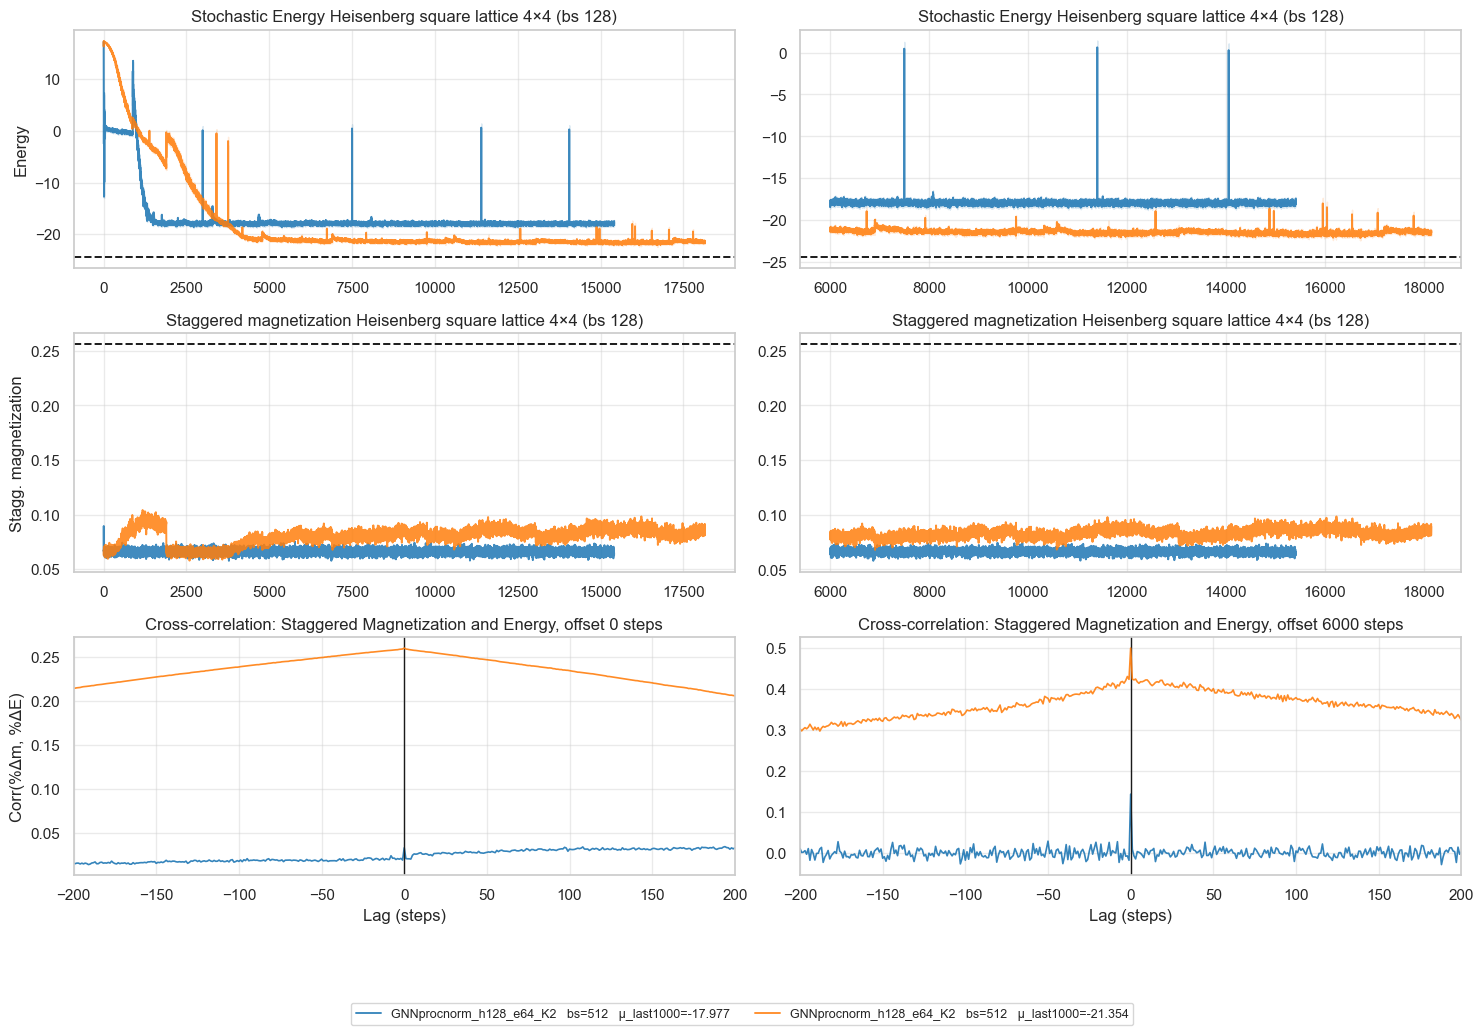

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import re

def plot_multi_runs_3x2(df_runs, run_indices, offset_training,
                        E_exact, m_exact,
                        max_lag=200, show_sigma=False):
    """
    3 × 2 panel:          full-run (col-0) | offset-run (col-1)
           row-0  energy
           row-1  magnetization
           row-2  cross-corr (%Δm , %ΔE)

    df_runs      : your dataframe
    run_indices  : list/tuple of row numbers to plot
    offset_training : int, starting step of the second column
    E_exact, m_exact: reference values
    """
    m_exact/=2
    # ── styling ────────────────────────────────────────────────
    colours = plt.cm.tab10.colors
    fig, axes = plt.subplots(3, 2, figsize=(15, 10),
                             gridspec_kw={'height_ratios':[1,1,1]})

    titles_row0 = ["Stochastic Energy Heisenberg square lattice 4×4 (bs 128)",
                   "Stochastic Energy Heisenberg square lattice 4×4 (bs 128)"]
    titles_row1 = ["Staggered magnetization Heisenberg square lattice 4×4 (bs 128)",
                   "Staggered magnetization Heisenberg square lattice 4×4 (bs 128)"]
    titles_row2 = [f"Cross-correlation: Staggered Magnetization and Energy, offset 0 steps",
                   f"Cross-correlation: Staggered Magnetization and Energy, offset {offset_training} steps"]

    # iterate through runs
    for i, idx in enumerate(run_indices):
        colour = colours[i % len(colours)]
        run    = df_runs.iloc[idx]
        run_name = run.get("run_name", str(idx))
        simple  = re.search(r'GNN(?:\d+adv)?_h\d+_e\d+_K\d+', run_name)
        simple_name   = simple.group(0) if simple else run_name.split('/')[-1]
    # simple_name= m.group(0) if m else 
        

        steps_all  = np.asarray(run["steps"])
        energy_all = np.asarray(run["training/energy_real"])
        mag_all    = np.asarray(run["training/staggered_magnetization_absv2"])/2
        if show_sigma and "training/std_energy" in run:
            std_all = np.asarray(run["training/std_energy"])
        else:
            std_all = None
        tail_length= 1000
        # 1. compute mean of last 300 points (or all if shorter)
        tail = energy_all[-tail_length:] if len(energy_all) >= tail_length else energy_all
        final_mean = tail.mean()
        # Extract batch size
        bs_match = re.search(r'__bs_(\d+)lr', run_name)
        if bs_match:
            batch_size = int(bs_match.group(1))
        else:
            batch_size = None  # fallback if not found        
        label = f"{simple_name}   bs={batch_size}   μ_last{len(tail)}={final_mean:.3f}"

        # --- two columns: col=0 (full)  col=1 (offset) ----------
        for col, offset in enumerate([0, offset_training]):
            steps  = steps_all[offset:]
            energy = energy_all[offset:]
            mag    = mag_all[offset:]
            std    = std_all[offset:] if std_all is not None else None

            # ── ENERGY ──────────────────────────────────────────
            axE = axes[0, col]
            axE.plot(steps, energy, color=colour, label=label, alpha=0.85, lw=1.4)
            if std is not None and show_sigma:
                axE.fill_between(steps, energy-std, energy+std,
                                 color=colour, alpha=0.15)
            if i == 0:                       # only once
                axE.axhline(E_exact, ls='--', lw=1.4, color='k')
                axE.set_title(titles_row0[col], fontsize=12)
                axE.set_ylabel("Energy" if col==0 else "")
                axE.grid(True, alpha=0.4)

            # --- MAGNETIZATION ---------------------------------
            axM = axes[1, col]
            axM.plot(steps, mag, color=colour, alpha=0.85, lw=1.4)
            if i == 0:
                axM.axhline(m_exact, ls='--', lw=1.4, color='k')
                axM.set_title(titles_row1[col], fontsize=12)
                axM.set_ylabel("Stagg. magnetization" if col==0 else "")
                axM.grid(True, alpha=0.4)

            # --- CROSS-CORRELATION -----------------------------
            pct_e = 100*np.abs(energy - E_exact)/abs(E_exact)
            pct_m = 100*np.abs(mag    - m_exact)/abs(m_exact)
            lags  = np.arange(-max_lag, max_lag+1)
            cc    = np.empty_like(lags, dtype=float)
            for k, lag in enumerate(lags):
                if   lag < 0: cc[k] = np.corrcoef(pct_m[:lag],  pct_e[-lag:])[0,1]
                elif lag > 0: cc[k] = np.corrcoef(pct_m[lag:], pct_e[:-lag])[0,1]
                else:         cc[k] = np.corrcoef(pct_m, pct_e)[0,1]

            axC = axes[2, col]
            axC.plot(lags, cc, color=colour, lw=1.2, alpha=0.9)
            if i == 0:
                axC.set_title(titles_row2[col], fontsize=12)
                axC.set_xlim(-max_lag, max_lag)
                axC.axvline(0, color='k', lw=1)
                axC.set_xlabel("Lag (steps)")
                axC.set_ylabel("Corr(%Δm, %ΔE)" if col==0 else "")
                axC.grid(True, alpha=0.4)

    # shared legend --------------------------------------------------
    handles, labels = axes[0,0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center',
               bbox_to_anchor=(0.5, -0.04), ncol=min(3,len(labels)), fontsize=9)

    plt.tight_layout(rect=[0, 0.05, 1, 1])   # leave room for legend
    plt.show()


# ─── HOW TO CALL ────────────────────────────────────────────────────
offset_training = 6000           # the shift that defines column-2
run_indices     = [0, 1]       # whichever rows you want to overlay

plot_multi_runs_3x2(
    runs_to_plot_df_6x6,
    run_indices      = run_indices,
    offset_training  = offset_training,
    E_exact          = -24.419,
    m_exact          = 0.512,
    max_lag          = 200,
    show_sigma       = True        # set False if you don’t log std
    )


# 7x7 Analysis

In [2]:
from simulation_analysis.load_from_paths import get_filtered_directories, batch_extract_tf_events, load_models_for_analysis

models_checkpoints_4x4=load_models_for_analysis(df_4x4_filt,filtered_dirs_4x4)

→ checkpoint: saving_logs/system_Heisenberg/2dsquare_04_04_Alternatepattern/beta0.08__bs_256lr2.0e-04_loop1269x20_overlap_VMC/GNNprocnorm_h128_e64_K2/checkpoints/ckpt-9



I0000 00:00:1747596911.807013   14752 service.cc:145] XLA service 0x5aa4c190 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747596911.808472   14752 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-05-18 21:35:13.004033: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-18 21:35:13.509136: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1747596915.823655   14752 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


✘ Model initialized, psi_val[0]=[ 0.0249474 -0.9999994]
✔ Model loaded from saving_logs/system_Heisenberg/2dsquare_04_04_Alternatepattern/beta0.08__bs_256lr2.0e-04_loop1269x20_overlap_VMC/GNNprocnorm_h128_e64_K2,
, psi_val[0]=[0.3487378 5.387676 ]
→ checkpoint: saving_logs/system_Heisenberg/2dsquare_04_04_Alternatepattern/beta0.05__bs_256lr2.0e-04_loop1221x40_overlap_VMC/GNNprocnorm_h128_e64_K2/checkpoints/ckpt-6

✘ Model initialized, psi_val[0]=[-0.51978785 -0.99999976]
✔ Model loaded from saving_logs/system_Heisenberg/2dsquare_04_04_Alternatepattern/beta0.05__bs_256lr2.0e-04_loop1221x40_overlap_VMC/GNNprocnorm_h128_e64_K2,
, psi_val[0]=[-0.25974083  9.299666  ]
→ checkpoint: saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.007__bs_128lr2.0e-04_loop1200x15_overlap_VMC/GNN2adv_h128_e64_K3/checkpoints/ckpt-39

✘ Model initialized, psi_val[0]=[36.95383 -1.     ]
✔ Model loaded from saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.007__bs_128lr2.0e-04_loop1200x15_overlap_VMC

In [1]:
from compgraph.tensorflow_version.graph_tuple_manipulation import initialize_graph_tuples_tf_opt, precompute_graph_structure, create_graph_tuples_tf_opt, update_graph_tuples_config_jit
import tensorflow as tf
import psutil
import numpy as np 
import networkx as nx 
import sonnet as snt
import os
import time
import datetime
import gc
# Import required modules
from compgraph.tensorflow_version.graph_tuple_manipulation import initialize_graph_tuples_tf_opt, get_single_graph_from_batch
from compgraph.tensorflow_version.hamiltonian_operations import graph_hamiltonian_jit_xla
from simulation.initializer import create_graph_from_ham, initialize_NQS_model_fromhyperparams, initialize_hamiltonian_and_groundstate
@tf.function(jit_compile=False)
def compute_local_energy(i, GT_batch, psi_coeffs, model_rand, edge_pairs_tensor, template_graphs_output, J2):
    single_graph = get_single_graph_from_batch(GT_batch, i)
    new_graphs, ham_amplitudes = graph_hamiltonian_jit_xla(single_graph, edge_pairs_tensor, J2,template_graphs_output)
    del single_graph
        # Evaluate all potential new states
    new_outputs = model_rand(new_graphs)
    new_amplitudes = new_outputs[:, 0]
    new_phases = new_outputs[:, 1]
    new_psi_coeffs = tf.complex(
        real=new_amplitudes * tf.cos(new_phases),
        imag=new_amplitudes * tf.sin(new_phases)
    )
    
    # Compute ratios ψ(s')/ψ(s)
    ratios = new_psi_coeffs / psi_coeffs[i]
    
    # Compute local energy for this configuration
    local_energy= tf.reduce_sum(tf.cast(ham_amplitudes, tf.complex64) * ratios)
    return local_energy
# @tf.function()
def compute_exact_energy_full_optimized(model, graph, sublattice_encoding, edge_pairs_tensor, 
                                        template_graphs_output, J2=0.0, batch_size=1024):
    """
    Compute the exact energy by evaluating all configurations in the full Hilbert space efficiently.

    Args:
        model: The neural network model.
        graph: The networkx graph representing the system.
        sublattice_encoding: Encoding of the lattice.
        edge_pairs_tensor: Edge pairs in the graph as a tensor.
        template_graphs_output: Graph template for the model.
        J2: Next-nearest neighbor interaction strength.
        batch_size: Size of each batch for processing.

    Returns:
        The exact energy as a tensor.
    """
    num_nodes = graph.number_of_nodes()
    full_size_hilbert = 2 ** num_nodes  # Full Hilbert space size

    # Initialize graph tuples once
    GT_initial = initialize_graph_tuples_tf_opt(batch_size, graph, sublattice_encoding)
    weighted_energy_sum = tf.complex(0.0, 0.0)  # Accumulate weighted energies
    norm_sum = 0.0  # Accumulate norm for normalization

    # Iterate through the full Hilbert space in batches
    for start in range(0, full_size_hilbert, batch_size):
        end = min(start + batch_size, full_size_hilbert)
        current_batch_size = end - start
        
        # Generate the batch of configurations
        indices = tf.range(start, end, dtype=tf.int32)
        basis_configs = tf.bitwise.bitwise_and(
            tf.bitwise.right_shift(indices[:, tf.newaxis], tf.range(num_nodes, dtype=tf.int32)), 1
        )
        basis_configs = tf.cast(basis_configs, tf.float32) * 2 - 1  # Convert to -1/1

        # Efficiently update the graph tuple with the new batch
        GT_batch = update_graph_tuples_config_jit(GT_initial, basis_configs)

        # Evaluate the model on the batch
        outputs = model(GT_batch)
        amplitudes = outputs[:, 0]
        phases = outputs[:, 1]

        # Convert to complex coefficients
        psi_coeffs = tf.complex(
            real=amplitudes * tf.cos(phases),
            imag=amplitudes * tf.sin(phases)
        )

        # Calculate the norm
        norm = tf.norm(psi_coeffs)

        # Probabilities for weighted sum
        probabilities = tf.abs(psi_coeffs / norm)**2

        # TensorArray to accumulate local energies
        local_energies_array = tf.TensorArray(tf.complex64, size=current_batch_size)

        # Compute local energies for each configuration in the batch
        for i in range(current_batch_size):
            energy = compute_local_energy(
                i, GT_batch, psi_coeffs, model, edge_pairs_tensor, template_graphs_output, J2
            )
            local_energies_array = local_energies_array.write(i, energy)
            del energy
        # Stack local energies
        local_energies = local_energies_array.stack()

        # Accumulate weighted energy
        batch_weighted_energy = tf.reduce_sum(tf.cast(probabilities, tf.complex64) * local_energies)
        weighted_energy_sum += batch_weighted_energy
        norm_sum += tf.reduce_sum(probabilities)

        print(f"Processed batch {start // batch_size + 1} / {full_size_hilbert // batch_size + 1}")
        print(f"batch energy: {batch_weighted_energy.numpy()}")
        del GT_batch, outputs, amplitudes, phases, psi_coeffs, probabilities, local_energies_array
        del basis_configs, indices, local_energies

    # Normalize the accumulated energy by the total norm
    exact_energy = tf.math.real(weighted_energy_sum / tf.cast(norm_sum, tf.complex64))
    del GT_initial
    gc.collect()  # Force garbage collection to free up memory
    return exact_energy


2025-05-19 00:06:42.174918: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-19 00:06:44.164595: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2025-05-19 00:06:49.507823: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-19 00:06:49.803895: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-19 00:06:49.804426: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] co

## Saturated models in 4x4

In [ ]:
df_reduced_4x4_saturated=df_4x4_filt[df_4x4_filt['final_energy_real']>7.8]
models_checkpoints_4x4_saturated=load_models_for_analysis(df_reduced_4x4_saturated,filtered_dirs_4x4)

→ checkpoint: saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.007__bs_128lr7.0e-04_loop1100x15_overlap_VMC/GNN2adv_h128_e64_K3/checkpoints/ckpt-9



I0000 00:00:1747606164.693922   28481 service.cc:145] XLA service 0x4a75b460 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747606164.694051   28481 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-05-19 00:09:25.961525: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-19 00:09:26.311028: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1747606168.337206   28481 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


✘ Model initialized, psi_val[0]=[32.902348 -1.      ]
✔ Model loaded from saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.007__bs_128lr7.0e-04_loop1100x15_overlap_VMC/GNN2adv_h128_e64_K3,
, psi_val[0]=[-1. -1.]
→ checkpoint: saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.07__bs_256lr7.0e-04_loop1210x30_overlap_VMC/GNNprocnorm_h128_e64_K2/checkpoints/ckpt-4

✘ Model initialized, psi_val[0]=[ 0.6422677 -0.9999996]
✔ Model loaded from saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.07__bs_256lr7.0e-04_loop1210x30_overlap_VMC/GNNprocnorm_h128_e64_K2,
, psi_val[0]=[-1. -1.]
→ checkpoint: saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.007__bs_128lr7.0e-04_loop1101x15_overlap_VMC/GNN2adv_h128_e64_K3/checkpoints/ckpt-9



✘ Model initialized, psi_val[0]=[36.733604 -1.      ]
✔ Model loaded from saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.007__bs_128lr7.0e-04_loop1101x15_overlap_VMC/GNN2adv_h128_e64_K3,
, psi_val[0]=[-1. -1.]
→ checkpoint: saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.007__bs_128lr7.0e-04_loop2200x15_overlap_VMC/GNN2adv_h128_e64_K3/checkpoints/ckpt-2

✘ Model initialized, psi_val[0]=[34.64382 -1.     ]
✔ Model loaded from saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.007__bs_128lr7.0e-04_loop2200x15_overlap_VMC/GNN2adv_h128_e64_K3,
, psi_val[0]=[ 4.308257 -1.      ]
→ checkpoint: saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.007__bs_128lr7.0e-04_loop1030x15_overlap_VMC/GNN2adv_h128_e64_K3/checkpoints/ckpt-14

✘ Model initialized, psi_val[0]=[28.718128 -1.      ]
✔ Model loaded from saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.007__bs_128lr7.0e-04_loop1030x15_overlap_VMC/GNN2adv_h128_e64_K3,
, psi_val[0]=[-1. -1.]
→ checkpoint: saving_l

: 

In [ ]:
for key, val in models_checkpoints_4x4_saturated.items():
    print(key)
    hyp= val["hyperparams"]
    graph, subl=create_graph_from_ham(hyp.graph_params.graphType,(hyp.graph_params.n,hyp.graph_params.m)
                                        ,sublattice= hyp.graph_params.sublattice)
    GT_batch_temp=initialize_graph_tuples_tf_opt(hyp.sim_params.batch_size, graph, sublattice_encoding=subl)
    send, receivers, edge_pairs=precompute_graph_structure(graph)
    template_graphs_output=initialize_graph_tuples_tf_opt(tf.shape(edge_pairs)[0]+1,graph,subl)

    exact_energy=compute_exact_energy_full_optimized(
        val["model"],
        graph,
        subl,
        edge_pairs,
        template_graphs_output,
        batch_size=256
    )
    print(exact_energy)
    print(val["model"])


GNN2adv_h128_e64_K3_b0.007_bs128_lr0.0007_0
tf.Tensor(
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]], shape=(4096, 2), dtype=float32)
Tensor("strided_slice_5:0", shape=(528, 2), dtype=float32)
Processed batch 1 / 257
batch energy: (8-1.6149735415638133e-07j)
tf.Tensor(
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]], shape=(4096, 2), dtype=float32)
Processed batch 2 / 257
batch energy: (8-1.6149736836723605e-07j)
tf.Tensor(
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]], shape=(4096, 2), dtype=float32)
Processed batch 3 / 257
batch energy: (8-1.6149736836723605e-07j)
tf.Tensor(
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]], shape=(4096, 2), dtype=float32)
Processed batch 4 / 257
batch energy: (8-1.6149736836723605e-07j)
tf.Tensor(
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]], shape=(4096, 2), dtype=float32)
Processed batch 5 / 257
batch energy: (8-1.6149735415638133e-07j)
tf.Tensor(
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0.

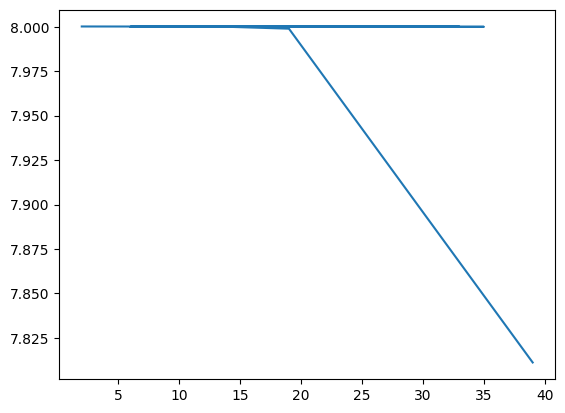

In [17]:
import seaborn as sns
plt.plot(df_reduced_4x4_saturated["final_energy_real"])

## Analyze 4x4 results

### Loading them

In [3]:
import re
import glob
from simulation_analysis.load_from_paths import batch_extract_tf_events

# List of run directories containing TensorBoard events & checkpoints:
# all_checkpoints = glob.glob("checkpointed_logs/**/checkpoints", recursive=True)
run_dirs = glob.glob("saving_logs/**/GNN*", recursive=True)

filtered_dirs = [ckpt for ckpt in run_dirs if re.search(r'04_04', ckpt)]
checkpoint_dirs = [f"{path}checkpoints" for path in filtered_dirs]

n_sites = 16   # for 4×4
n_samples = 5_000   # number of MC samples to draw per run
thermalization = 500 * n_sites

df_runs = batch_extract_tf_events(filtered_dirs,  tags=("training/energy_real","training/std_energy","training/staggered_magnetization_sqrt",
                                              "training/staggered_magnetization_S_pp","training/staggered_magnetization_absv2","configuration/hyperparameters"))

2025-05-05 13:03:12.608274: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-05 13:03:15.609449: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
import numpy as np 
# Step 1: Decode byte strings to regular strings
df_runs['config_str'] = df_runs['configuration/hyperparameters'].apply(lambda x: x.decode() if isinstance(x, bytes) else str(x))

# Step 2: Extract seed if present
df_runs['seed'] = df_runs['config_str'].apply(
    lambda s: int(re.search(r'seed:\s*(\d+)', s).group(1)) if re.search(r'seed:\s*(\d+)', s) else np.nan
)

df_runs["final_energy"] = df_runs["training/energy_real"].apply(lambda v: v[-1] if len(v)>0 else np.nan)
df_runs["final_std"]    = df_runs["training/std_energy"].apply(lambda v: v[-1] if len(v)>0 else np.nan)
df_runs["final_stagg"]  = df_runs["training/staggered_magnetization_absv2"].apply(lambda v: v[-1] if len(v)>0 else np.nan)
min_iterations=1000
df_runs_seeded=df_runs[~df_runs['seed'].isna()]
df_runs_filtered = df_runs_seeded[df_runs_seeded['training/energy_real'].apply(len) >= min_iterations].copy()


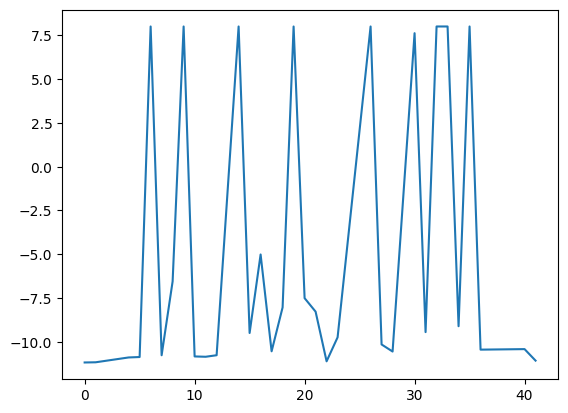

In [7]:
import matplotlib.pyplot as plt 
plt.plot(df_runs_seeded["final_energy"])

In [ ]:
import os, glob
from tensorboard.backend.event_processing import event_accumulator
from tensorboard.compat.proto import tensor_pb2
import tensorflow as tf
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns # for aesthetics and potentially different plot types


df_runs_seeded_copy= df_runs_seeded.copy()
# Apply extraction
df_runs_seeded_copy['config_str'] = df_runs_seeded_copy['configuration/hyperparameters'].apply(safe_decode)
hyperparams_df = df_runs_seeded_copy['config_str'].apply(lambda s: pd.Series(extract_specific_hyperparams(s)))
df_runs_seeded_copy = pd.concat([df_runs_seeded_copy, hyperparams_df], axis=1)

# Filter out runs without seed or insufficient iterations
min_iterations = 1000
df_runs_seeded_copy_filtered = df_runs_seeded_copy[~df_runs_seeded_copy['seed'].isna()]
df_runs_seeded_copy_filtered = df_runs_seeded_copy_filtered[df_runs_seeded_copy_filtered['training/energy_real'].apply(len) >= min_iterations].copy()

# Add final values
df_runs_seeded_copy_filtered["final_energy"] = df_runs_seeded_copy_filtered["training/energy_real"].apply(lambda v: v[-1] if len(v)>0 else np.nan)
df_runs_seeded_copy_filtered["final_std"]    = df_runs_seeded_copy_filtered["training/std_energy"].apply(lambda v: v[-1] if len(v)>0 else np.nan)
df_runs_seeded_copy_filtered["final_stagg"]  = df_runs_seeded_copy_filtered["training/staggered_magnetization_absv2"].apply(lambda v: v[-1] if len(v)>0 else np.nan)

print(f"Original runs: {len(df_runs_seeded_copy)}")
print(f"Runs after filtering (seed and >= {min_iterations} iterations): {len(df_runs_seeded_copy_filtered)}")

# Define exact values for 4x4
exact_energy = -11.228 # Your value from the plot
exact_stagg_abs = 0.517 # Your value from the plot

Original runs: 33
Runs after filtering (seed and >= 1000 iterations): 30


### Loading a specific model which has low energy

In [20]:
import tensorflow as tf

def batch_staggered_metrics_pm1(spins_pm1, eps_pm1):
    """
    spins_pm1:  (B, N) tf.float32, values ±1
    eps_pm1:    (N,)   tf.float32, values ±1
    Returns dict with m_rms, m_abs, S_pp
    """
    spins = tf.convert_to_tensor(spins_pm1, tf.float32)     # (B,N)
    eps   = tf.convert_to_tensor(eps_pm1,   tf.float32)     # (N,)

    N     = tf.cast(tf.shape(spins)[1], tf.float32)         # 16 for 4×4
    Ms    = tf.reduce_sum(spins * eps[None,:], axis=1)      # (B,)

    Ms2   = tf.reduce_mean(tf.square(Ms))                   # ⟨Ms²⟩_batch
    m_rms = tf.sqrt(Ms2) / N
    m_abs = tf.reduce_mean(tf.abs(Ms)) / N
    S_pp  = Ms2 / N

    return m_rms, m_abs, S_pp


In [2]:
## Exact Quimb
import numpy as np, quimb as qu

# 2a) Build and diagonalize 4×4 Heisenberg
n = m = 4
H = qu.ham_heis_2D(n, m, j=1.0, cyclic=True, sparse=True)
E0= qu.groundenergy(H)
psi0 = qu.groundstate(H)  # ground state vector

# 2b) Build checkerboard ε_i = ±1
eps = np.array([1 if (x+y)%2==0 else -1
                for x in range(n) for y in range(m)])  # shape (16,)

# 2c) Enumerate basis spins in ±1 convention
N = n*m
basis = ((np.arange(2**N)[:,None] >> np.arange(N)) & 1)*2 - 1   # (2^16,16)
probs = np.abs(psi0)**2                                       # (2^16,)

# 2d) Compute Ms for each config in ±1 units
Ms_vals = (basis * eps[None,:]).sum(axis=1)                 # (65536,)
Ms    = np.dot(probs.flatten(), Ms_vals)                             # should be ≈ 0
Ms2    = np.dot(probs.flatten(), Ms_vals**2)

# 2e) Extract the per-site observables
m_rms_quimb = np.sqrt(Ms2) / N
m_abs_quimb = np.dot(probs.flatten(), np.abs(Ms_vals)) / N
Spp_quimb   = Ms2 / N

print("Quimb baseline:", m_rms_quimb, m_abs_quimb, Spp_quimb)

Quimb baseline: 0.607209064615308 0.5173775227073758 5.899245570415956


In [136]:
# 4a)  a batch of size B from the exact |ψ0|²
B     = 2048
inds  = np.random.choice(2**N, size=B, p=probs.flatten())
batch = basis[inds]                          # shape (B,16), ±1
eps16 = eps                                  # shape (16,)

# 4b) Compute TF metrics
m_rms_tf, m_abs_tf, Spp_tf = batch_staggered_metrics_pm1(batch, eps16)

print("TF on exact batch:",
      float(m_rms_tf.numpy()),
      float(m_abs_tf.numpy()),
      float(Spp_tf.numpy()))
print("Quimb baseline:",
      m_rms_quimb,
      m_abs_quimb,
      Spp_quimb)
# 4c) Assert they match the Quimb baseline within ~1e-2
assert abs(m_rms_tf - m_rms_quimb) < 1e-2
assert abs(m_abs_tf - m_abs_quimb) < 1e-2


TF on exact batch: 0.6100257039070129 0.5205078125 5.9541015625
Quimb baseline: 0.6072090646153094 0.5173775227073778 5.899245570415985


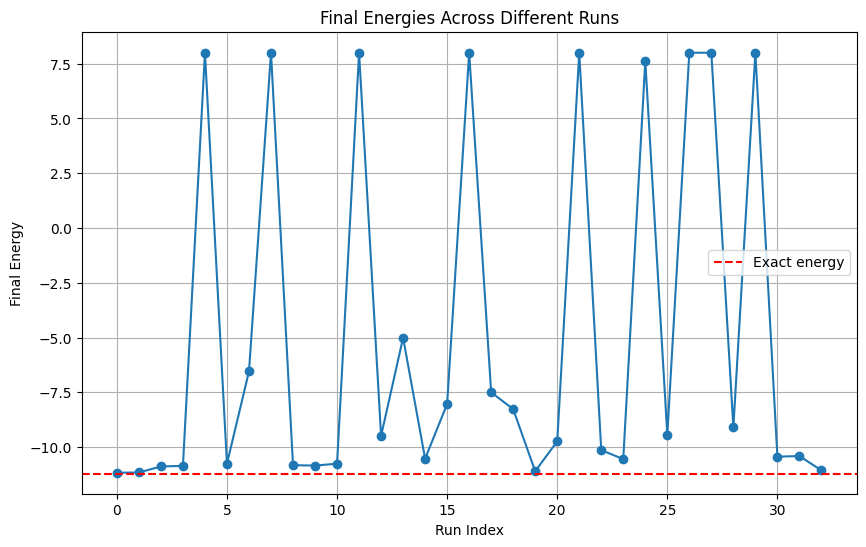

In [9]:
# Create a list of final energies from all runs
# Use final_energy column that was already computed in CELL INDEX: 9
energies_list = df_runs_seeded['final_energy'].values
plt.figure(figsize=(10, 6))
plt.plot(energies_list, 'o-')
plt.axhline(y=-11.23, color='r', linestyle='--', label='Exact energy')
plt.ylabel('Final Energy')
plt.xlabel('Run Index')
plt.title('Final Energies Across Different Runs')
plt.grid(True)
plt.legend()

### Selection of plots to show

In [238]:
import re
import sys

df = df_runs_seeded_copy_filtered.copy()
df['arch_match'] = df['run_name'].str.split('/').str[-1]

# 1) Choose architecture
print("Available architectures:\n", df['arch_match'].unique().tolist(), flush=True)
sel_arch = input("→ Select one architecture: ").strip()
print("You picked:", sel_arch, flush=True)
df = df[df['arch_match'] == sel_arch]

# 2) Extract batch-size
df['bs'] = (
    df['run_name']
      .str.extract(r'__bs_(\d+)lr', expand=False)
      .astype(int)
)

# 3) Fix one hyperparameter
params = ['beta', 'lr', 'bs']
print("\nHyperparameters you can fix:\n 1) all   2) beta   3) lr   4) bs", flush=True)
choice = input("→ Type one of [all, beta, lr, bs]: ").strip()
print("You chose to fix:", choice, "\n", flush=True)

if choice == 'all':
    runs_to_plot_df = df.copy()
else:
    # 3a) gather unique values
    vals = sorted(df[choice].unique().tolist())
    print(f"Found these {choice} values: {vals}", flush=True)

    # 3b) for each, print combos of the other two
    others = [p for p in params if p != choice]
    for v in vals:
        subset = df[df[choice] == v]
        combo_df = subset.groupby(others).size().reset_index()[others]
        print(f"\n{choice} = {v!r}  →  combinations of {others}:", flush=True)
        for _, row in combo_df.iterrows():
            print("   •", {p: row[p] for p in others}, flush=True)

    # 3c) ***now*** ask which value to fix
    fixed_val = input(f"\nEnter the {choice} you want to fix: ").strip()
    fixed_val = float(fixed_val) if choice in ('beta','lr') else int(fixed_val)
    print(f"You fixed {choice} = {fixed_val!r}", flush=True)

    runs_to_plot_df = df[df[choice] == fixed_val].copy()

# 4) Title
if choice == 'all':
    title_n = f"Training Trajectories ({sel_arch} — all β, lr, bs)  Stochastic energy ±1σ"
else:
    others = [p for p in params if p != choice]
    title_n = (
        f"Training Trajectories ({sel_arch} — fix {choice}={fixed_val}, "
        f"vary {others[0]} & {others[1]})  Stochastic energy ±1σ"
    )

print(f"\nSelected runs: {len(runs_to_plot_df)}", flush=True)
print("Plot title will be:", title_n, flush=True)


Available architectures:
 ['GNNprocnorm_h128_e64_K2', 'GNN2adv_h128_e64_K3', 'GNN2adv_h128_e64_K1', 'GNN2adv_h128_e64_K2']
You picked: GNNprocnorm_h128_e64_K2

Hyperparameters you can fix:
 1) all   2) beta   3) lr   4) bs
You chose to fix: all 


Selected runs: 4
Plot title will be: Training Trajectories (GNNprocnorm_h128_e64_K2 — all β, lr, bs)  Stochastic energy ±1σ


In [233]:
runs_to_plot_df.sort_values(by='final_energy', inplace=True)

In [160]:
df_runs_filtered

run_name  \
1  2dsquare_04_04_Neel/beta0.007__bs_128lr2.0e-04...   
2  2dsquare_04_04_Alternatepattern/beta0.05__bs_2...   
3  2dsquare_04_04_Neel/beta0.07__bs_128lr1.0e-04_...   
4  2dsquare_04_04_Neel/beta0.07__bs_128lr1.0e-04_...   

                                training/energy_real  \
1  [7.873477458953857, 4.6312456130981445, 7.4073...   
2  [6.540216445922852, 1.0264861583709717, 3.3713...   
3  [5.326948165893555, -1.226241946220398, 2.3724...   
4  [5.619373798370361, -0.5955134630203247, 1.194...   

                                               steps  \
1  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
2  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
3  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
4  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                 training/std_energy  \
1  [0.06544038653373718, 0.37451764941215515, 0.1...   
2  [0.15718799829483032, 0.23079662024974823, 0.2...   
3  [0.342280775308609, 0.4682053327560425, 0.4085...   
4  [0.33786141872406006, 0.4946434795856476, 0.43...   

               training/staggered_magnetization_sqrt  \
1  [0.22534695267677307, 0.26700010895729065, 0.2...   
2  [0.26273706555366516, 0.2783048748970032, 0.25...   
3  [0.24556614458560944, 0.2423134744167328, 0.26...   
4  [0.25721997022628784, 0.2538761794567108, 0.26...   

               training/staggered_magnetization_S_pp  \
1  [0.8125, 1.140625, 0.931640625, 1.009765625, 0...   
2  [1.1044921875, 1.2392578125, 1.05859375, 0.996...   
3  [0.96484375, 0.939453125, 1.08984375, 0.867187...   
4  [1.05859375, 1.03125, 1.115234375, 1.146484375...   

              training/staggered_magnetization_absv2  \
1  [0.177734375, 0.2109375, 0.1865234375, 0.19824...   
2  [0.20556640625, 0.22021484375, 0.1982421875, 0...   
3  [0.19921875, 0.1943359375, 0.197265625, 0.1835...   
4  [0.208984375, 0.201171875, 0.2138671875, 0.213...   

                       configuration/hyperparameters  \
1  [b'beta: 0.007\nlearning_rate: 0.0002\nseed: 8...   
2  [b'beta: 0.05\nlearning_rate: 0.0002\nseed: 86...   
3  [b'beta: 0.07\nlearning_rate: 0.0001\nseed: 86...   
4  [b'beta: 0.07\nlearning_rate: 0.0001\nseed: 86...   

                                          config_str    seed  final_energy  \
1  [b'beta: 0.007\nlearning_rate: 0.0002\nseed: 8...  860432    -10.885833   
2  [b'beta: 0.05\nlearning_rate: 0.0002\nseed: 86...  860432    -11.161640   
3  [b'beta: 0.07\nlearning_rate: 0.0001\nseed: 86...  860432    -11.106196   
4  [b'beta: 0.07\nlearning_rate: 0.0001\nseed: 86...  860432    -11.066780   

   final_std  final_stagg  
1   0.086060     0.455078  
2   0.058876     0.501465  
3   0.037609     0.437500  
4   0.059997     0.422852

2dsquare_04_04_Neel/beta0.07__bs_128lr1.0e-04_loop1212x15_overlap_VMC/GNNprocnorm_h128_e64_K2
2dsquare_04_04_Neel/beta0.007__bs_128lr2.0e-04_loop1200x15_overlap_VMC/GNN2adv_h128_e64_K3


<Figure size 1400x1200 with 0 Axes>

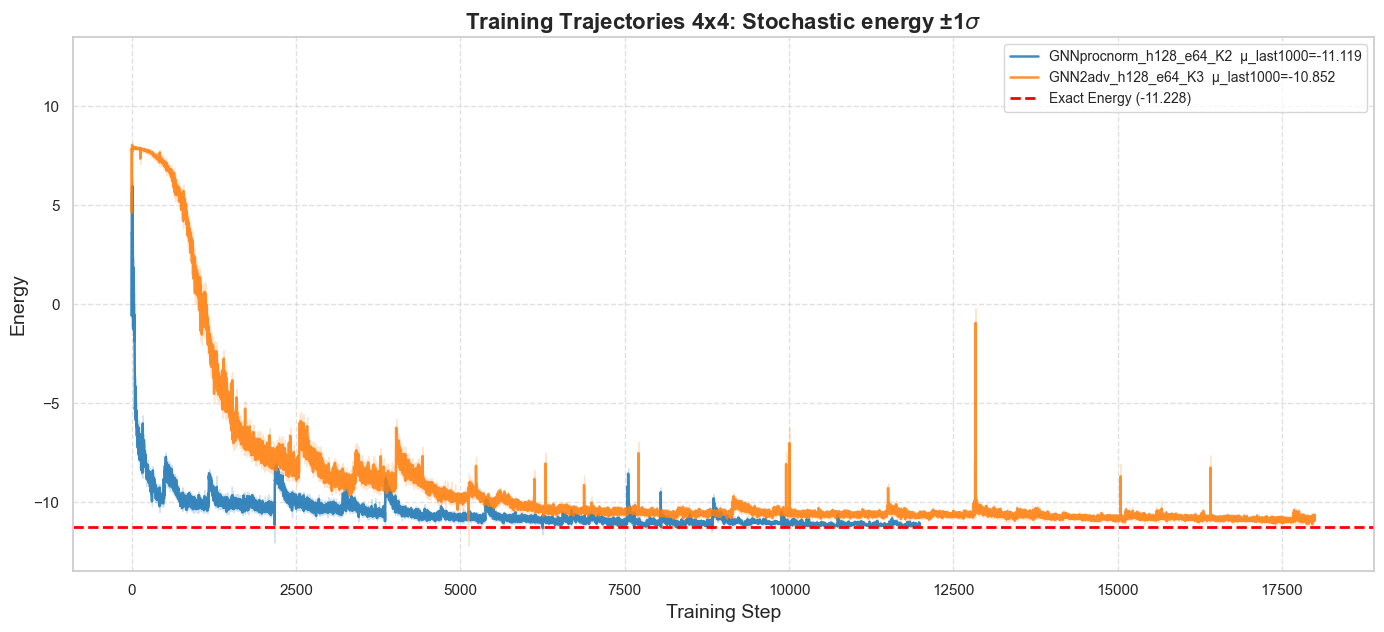

In [161]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
df = df_runs_seeded_copy_filtered.copy()

# Set seaborn style for prettier plots
sns.set_theme(style="whitegrid")

title_n=f"Training Trajectories {4}x{4}: Stochastic energy ±1" + r"$\sigma$"

plt.figure(figsize=(14, 12))

# calculate how far below exact_energy to clip
offset = 0.2 * abs(exact_energy)
ymin = exact_energy - offset
runs_to_plot_df=pd.concat([df_runs_filtered.tail(1), df_runs_filtered.head(1)])
# get a categorical palette
palette = sns.color_palette("tab10", n_colors=len(runs_to_plot_df))

plt.figure(figsize=(14, 12))
ax1 = plt.subplot(2, 1, 1)

for (idx, run_data), color in zip(runs_to_plot_df.iterrows(), palette):
    steps       = np.array(run_data['steps'])
    energy      = np.array(run_data['training/energy_real'])
    std_energy  = np.array(run_data['training/std_energy'])
    tail_length= 1000
    # 1. compute mean of last 300 points (or all if shorter)
    tail = energy[-tail_length:] if len(energy) >= tail_length else energy
    final_mean = tail.mean()

    # extract a simpler run name
    run_name   = run_data.get('run_name', str(idx))
    print(run_name)
    m          = re.search(r'GNN\d+adv_h\d+_e\d+_K\d+', run_name)
    simple_name= m.group(0) if m else run_name.split('/')[-1]

    # Extract batch size
    bs_match = re.search(r'__bs_(\d+)lr', run_name)
    if bs_match:
        batch_size = int(bs_match.group(1))
    else:
        batch_size = None  # fallback if not found

    # --- Build label including batch size ---
    label = f"{simple_name}  μ_last{len(tail)}={final_mean:.3f}"

    ax1.plot(steps, energy,
             label=label,
             color=color,
             linewidth=1.8,
             alpha=0.85)

    ax1.fill_between(steps,
                     energy - std_energy,
                     energy + std_energy,
                     color=color,
                     alpha=0.2)

# 3. exact energy line
ax1.axhline(y=exact_energy,
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'Exact Energy ({exact_energy:.3f})')

# 4. clip y-axis to 20% below the ground truth
ax1.set_ylim(bottom=ymin,top=-ymin)
ax1.set_title(title_n, fontsize=16, fontweight='bold')
ax1.set_xlabel('Training Step', fontsize=14)
ax1.set_ylabel('Energy', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

### Selection of models

In [ ]:
df_runs_seeded_copy_filtered_low_energy=df_runs_seeded_copy_filtered[df_runs_seeded_copy_filtered['final_energy'] < -10.8]
df_runs_seeded_copy_filtered_low_energy['run_name'].unique().tolist()
# 3) filtro
dirs_lowE = [
    d for d in filtered_dirs
    if any(run in d for run in df_runs_seeded_copy_filtered_low_energy['run_name'].unique().tolist())
]

print(f"Trovate {len(dirs_lowE)} directory low-energy:" , dirs_lowE)

['beta0.07__bs_256lr1.0e-04_loop1210x30_overlap_VMC/GNNprocnorm_h128_e64_K2',
 'beta0.007__bs_128lr7.0e-04_loop1029x15_overlap_VMC/GNN2adv_h128_e64_K3',
 'beta0.007__bs_128lr2.0e-04_loop1200x15_overlap_VMC/GNN2adv_h128_e64_K3',
 'beta0.07__bs_128lr1.0e-04_loop1200x15_overlap_VMC/GNNprocnorm_h128_e64_K2',
 'beta0.007__bs_128lr7.0e-04_loop1045x15_overlap_VMC/GNN2adv_h128_e64_K3']

In [406]:

runs_to_plot_df= df_runs_seeded_copy_filtered_low_energy.copy()

In [57]:
runs_to_plot_df

run_name  \
41  2dsquare_04_04_Neel/beta0.07__bs_128lr1.0e-04_...   
22  2dsquare_04_04_Neel/beta0.07__bs_128lr1.0e-04_...   

                                 training/energy_real  \
41  [5.619373798370361, -0.5955134630203247, 1.194...   
22  [5.326948165893555, -1.226241946220398, 2.3724...   

                                                steps  \
41  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
22  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                  training/std_energy  \
41  [0.33786141872406006, 0.4946434795856476, 0.43...   
22  [0.342280775308609, 0.4682053327560425, 0.4085...   

               training/staggered_magnetization_absv2  \
41  [0.208984375, 0.201171875, 0.2138671875, 0.213...   
22  [0.19921875, 0.1943359375, 0.197265625, 0.1835...   

                 training/staggered_magnetization_abs  \
41  [0.208984375, 0.201171875, 0.2138671875, 0.213...   
22  [0.19921875, 0.1943359375, 0.197265625, 0.1835...   

                        configuration/hyperparameters  final_energy_real  \
41  [b'beta: 0.07\nlearning_rate: 0.0001\nseed: 86...         -11.066780   
22  [b'beta: 0.07\nlearning_rate: 0.0001\nseed: 86...         -11.106196   

    final_std_energy final_staggered_magnetization_absv2  \
41          0.059997                            0.422852   
22          0.037609                              0.4375   

   final_staggered_magnetization_abs  \
41                          0.422852   
22                            0.4375   

                                           config_str  beta      lr      seed  
41  [b'beta: 0.07\nlearning_rate: 0.0001\nseed: 86...  0.07  0.0001  860432.0  
22  [b'beta: 0.07\nlearning_rate: 0.0001\nseed: 86...  0.07  0.0001  860432.0

<Figure size 1400x1200 with 0 Axes>

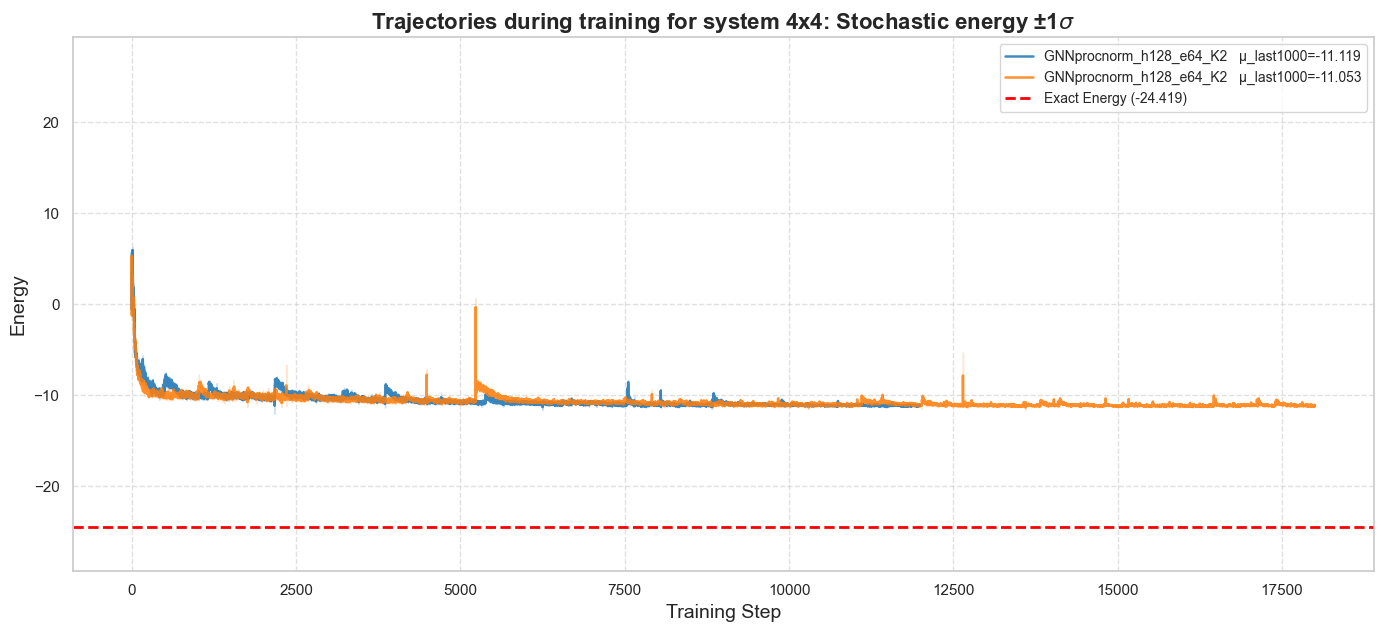

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


# Set seaborn style for prettier plots
sns.set_theme(style="whitegrid")

title_n=f"Trajectories during training for system {4}x{4}: Stochastic energy ±1" + r"$\sigma$"

plt.figure(figsize=(14, 12))

# calculate how far below exact_energy to clip
offset = 0.2 * abs(exact_energy)
ymin = exact_energy - offset

# get a categorical palette
palette = sns.color_palette("tab10", n_colors=len(runs_to_plot_df))

plt.figure(figsize=(14, 12))
ax1 = plt.subplot(2, 1, 1)

for (idx, run_data), color in zip(runs_to_plot_df.iterrows(), palette):
    steps       = np.array(run_data['steps'])
    energy      = np.array(run_data['training/energy_real'])
    std_energy  = np.array(run_data['training/std_energy'])
    tail_length= 1000
    # 1. compute mean of last 300 points (or all if shorter)
    tail = energy[-tail_length:] if len(energy) >= tail_length else energy
    final_mean = tail.mean()

    # extract a simpler run name
    run_name   = run_data.get('run_name', str(idx))
    m          = re.search(r'GNN\d+adv_h\d+_e\d+_K\d+', run_name)
    simple_name= m.group(0) if m else run_name.split('/')[-1]

    # Extract batch size
    bs_match = re.search(r'__bs_(\d+)lr', run_name)
    if bs_match:
        batch_size = int(bs_match.group(1))
    else:
        batch_size = None  # fallback if not found

    # --- Build label including batch size ---
    # label = f"{simple_name}  β={run_data['beta']:.2f}  bs={batch_size}  lr={run_data['lr']:.1e}  μ_last{len(tail)}={final_mean:.3f}"
    label = f"{simple_name}   μ_last{len(tail)}={final_mean:.3f}"

    ax1.plot(steps, energy,
             label=label,
             color=color,
             linewidth=1.8,
             alpha=0.85)

    ax1.fill_between(steps,
                     energy - std_energy,
                     energy + std_energy,
                     color=color,
                     alpha=0.2)

# 3. exact energy line
ax1.axhline(y=exact_energy,
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'Exact Energy ({exact_energy:.3f})')

# 4. clip y-axis to 20% below the ground truth
ax1.set_ylim(bottom=ymin,top=-ymin)
ax1.set_title(title_n, fontsize=16, fontweight='bold')
ax1.set_xlabel('Training Step', fontsize=14)
ax1.set_ylabel('Energy', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

In [142]:
runs_to_plot_df

run_name  \
4  2dsquare_04_04_Neel/beta0.07__bs_128lr1.0e-04_...   
1  2dsquare_04_04_Neel/beta0.007__bs_128lr2.0e-04...   

                                training/energy_real  \
4  [5.619373798370361, -0.5955134630203247, 1.194...   
1  [7.873477458953857, 4.6312456130981445, 7.4073...   

                                               steps  \
4  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
1  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                 training/std_energy  \
4  [0.33786141872406006, 0.4946434795856476, 0.43...   
1  [0.06544038653373718, 0.37451764941215515, 0.1...   

               training/staggered_magnetization_sqrt  \
4  [0.25721997022628784, 0.2538761794567108, 0.26...   
1  [0.22534695267677307, 0.26700010895729065, 0.2...   

               training/staggered_magnetization_S_pp  \
4  [1.05859375, 1.03125, 1.115234375, 1.146484375...   
1  [0.8125, 1.140625, 0.931640625, 1.009765625, 0...   

              training/staggered_magnetization_absv2  \
4  [0.208984375, 0.201171875, 0.2138671875, 0.213...   
1  [0.177734375, 0.2109375, 0.1865234375, 0.19824...   

                       configuration/hyperparameters  \
4  [b'beta: 0.07\nlearning_rate: 0.0001\nseed: 86...   
1  [b'beta: 0.007\nlearning_rate: 0.0002\nseed: 8...   

                                          config_str    seed  final_energy  \
4  [b'beta: 0.07\nlearning_rate: 0.0001\nseed: 86...  860432    -11.066780   
1  [b'beta: 0.007\nlearning_rate: 0.0002\nseed: 8...  860432    -10.885833   

   final_std  final_stagg  
4   0.059997     0.422852  
1   0.086060     0.455078

In [189]:
0.70174*16

11.22784

<Figure size 1400x1200 with 0 Axes>

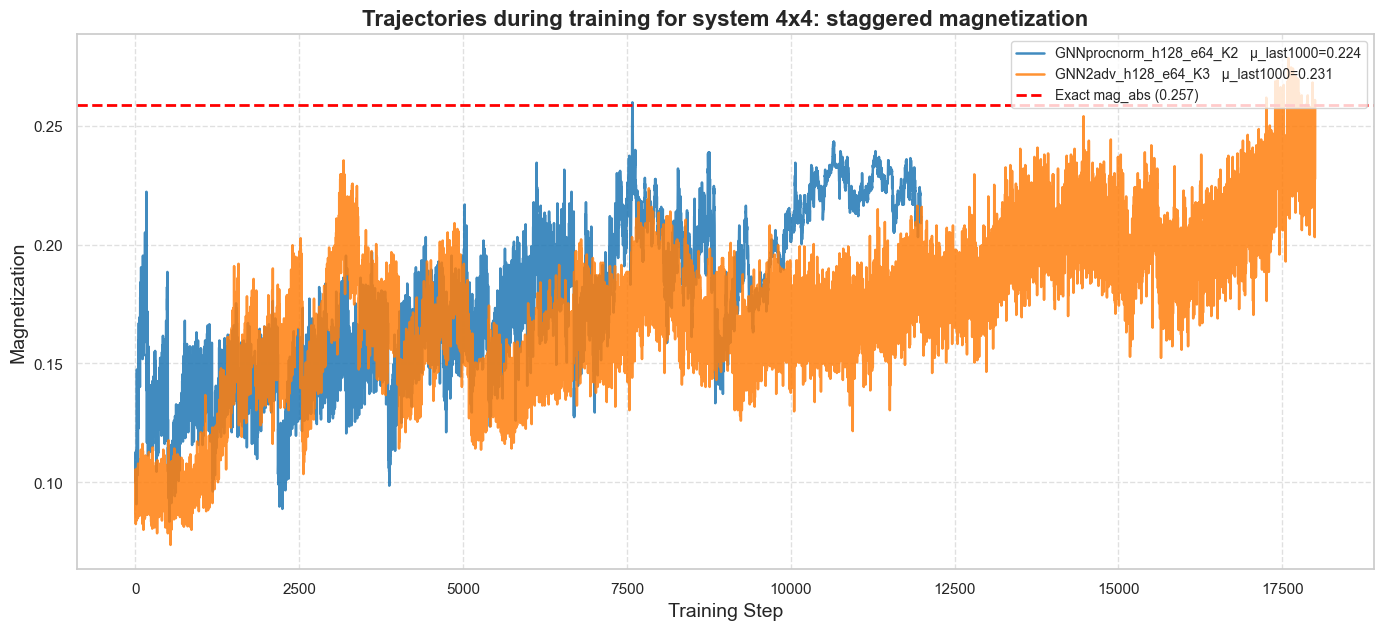

In [159]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


# Set seaborn style for prettier plots
sns.set_theme(style="whitegrid")

title_n=f"Trajectories during training for system {4}x{4}: staggered magnetization"

plt.figure(figsize=(14, 12))
exact_mag_abs = 0.517/2 # Your value from the plot
# calculate how far below exact_energy to clip
offset = 0.2 * abs(exact_mag_abs)
ymax= exact_mag_abs + offset

# get a categorical palette
palette = sns.color_palette("tab10", n_colors=len(runs_to_plot_df))

plt.figure(figsize=(14, 12))
ax1 = plt.subplot(2, 1, 1)

for (idx, run_data), color in zip(runs_to_plot_df.iterrows(), palette):
    steps       = np.array(run_data['steps'])
    mag_abs      = np.array(run_data['training/staggered_magnetization_absv2'])/2
    tail_length= 1000
    # 1. compute mean of last 300 points (or all if shorter)
    tail = mag_abs[-tail_length:] if len(mag_abs) >= tail_length else mag_abs
    final_mean = tail.mean()

    # extract a simpler run name
    run_name   = run_data.get('run_name', str(idx))
    m          = re.search(r'GNN\d+adv_h\d+_e\d+_K\d+', run_name)
    simple_name= m.group(0) if m else run_name.split('/')[-1]

    # Extract batch size
    bs_match = re.search(r'__bs_(\d+)lr', run_name)
    if bs_match:
        batch_size = int(bs_match.group(1))
    else:
        batch_size = None  # fallback if not found

    # --- Build label including batch size ---
    # label = f"{simple_name}  β={run_data['beta']:.2f}  bs={batch_size}  lr={run_data['lr']:.1e}  μ_last{len(tail)}={final_mean:.3f}"
    label = f"{simple_name}   μ_last{len(tail)}={final_mean:.3f}"

    ax1.plot(steps, mag_abs,
             label=label,
             color=color,
             linewidth=1.8,
             alpha=0.85)



# 3. exact energy line
ax1.axhline(y=exact_mag_abs,
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'Exact mag_abs ({0.257:.3f})')

# 4. clip y-axis to 20% below the ground truth
ax1.set_title(title_n, fontsize=16, fontweight='bold')
ax1.set_xlabel('Training Step', fontsize=14)
ax1.set_ylabel('Magnetization', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

In [24]:
df_runs_seeded_copy_filtered_high_energy=df_runs_seeded_copy_filtered[df_runs_seeded_copy_filtered['final_energy'] >7]

# df_runs_seeded_copy_filtered_high_energy=pd.concat([df_runs_seeded_copy_filtered_high_energy.tail(4),
#  df_runs_seeded_copy_filtered_high_energy.head(1)])

In [26]:
df_runs_seeded_copy_filtered_high_energy=pd.concat([df_runs_seeded_copy_filtered_high_energy.tail(1),
 df_runs_seeded_copy_filtered_high_energy.head(2)])

2dsquare_04_04_Neel/beta0.007__bs_128lr7.0e-04_loop1031x15_overlap_VMC/GNN2adv_h128_e64_K3
2dsquare_04_04_Neel/beta0.007__bs_128lr7.0e-04_loop1100x15_overlap_VMC/GNN2adv_h128_e64_K3
2dsquare_04_04_Neel/beta0.07__bs_256lr7.0e-04_loop1210x30_overlap_VMC/GNNprocnorm_h128_e64_K2


<Figure size 1400x1200 with 0 Axes>

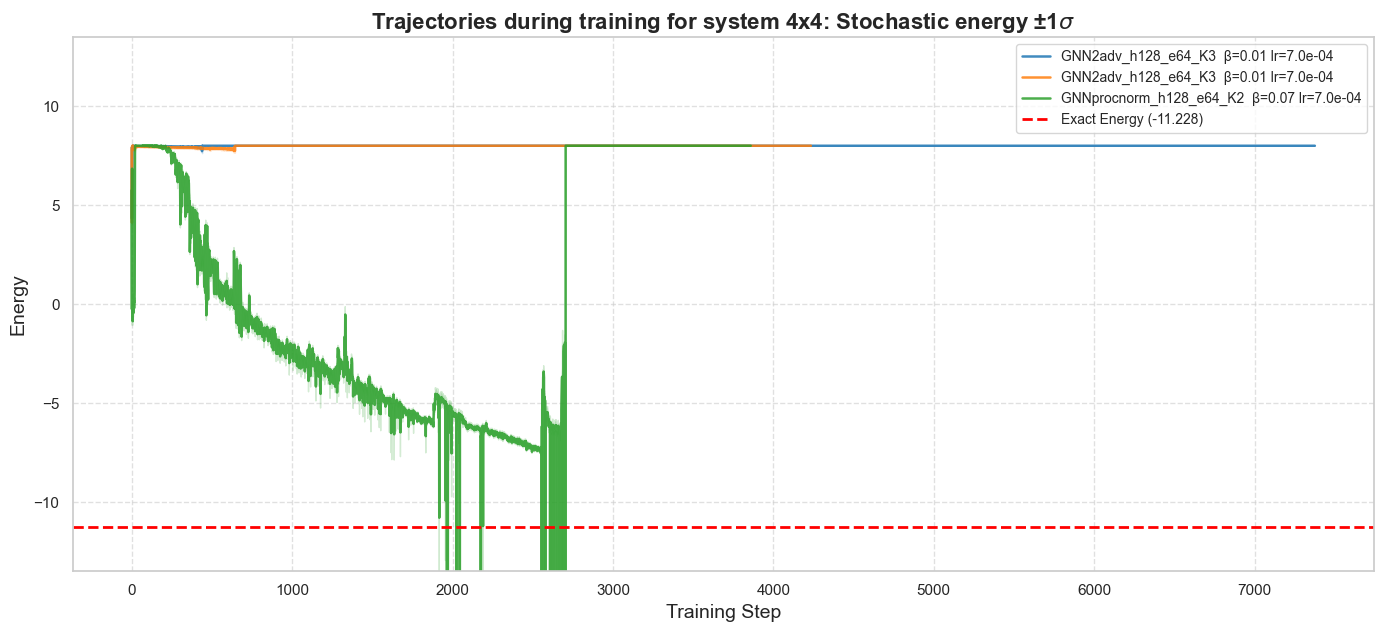

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


# Set seaborn style for prettier plots
sns.set_theme(style="whitegrid")

title_n=f"Trajectories during training for system {4}x{4}: Stochastic energy ±1" + r"$\sigma$"

plt.figure(figsize=(14, 12))

# calculate how far below exact_energy to clip
offset = 0.2 * abs(exact_energy)
ymin = exact_energy - offset

# get a categorical palette
palette = sns.color_palette("tab10", n_colors=len(df_runs_seeded_copy_filtered_high_energy))

plt.figure(figsize=(14, 12))
ax1 = plt.subplot(2, 1, 1)

for (idx, run_data), color in zip(df_runs_seeded_copy_filtered_high_energy.iterrows(), palette):
    steps       = np.array(run_data['steps'])
    energy      = np.array(run_data['training/energy_real'])
    std_energy  = np.array(run_data['training/std_energy'])
    tail_length= 1000
    # 1. compute mean of last 300 points (or all if shorter)
    tail = energy[-tail_length:] if len(energy) >= tail_length else energy
    final_mean = tail.mean()

    # extract a simpler run name
    run_name   = run_data.get('run_name', str(idx))
    m          = re.search(r'GNN\d+adv_h\d+_e\d+_K\d+', run_name)
    simple_name= m.group(0) if m else run_name.split('/')[-1]
    print(run_name)
    # Extract batch size
    bs_match = re.search(r'__bs_(\d+)lr', run_name)
    if bs_match:
        batch_size = int(bs_match.group(1))
    else:
        batch_size = None  # fallback if not found

    # --- Build label including batch size ---
    label = f"{simple_name}  β={run_data['beta']:.2f} lr={run_data['lr']:.1e}"

    ax1.plot(steps, energy,
             label=label,
             color=color,
             linewidth=1.8,
             alpha=0.85)

    ax1.fill_between(steps,
                     energy - std_energy,
                     energy + std_energy,
                     color=color,
                     alpha=0.2)

# 3. exact energy line
ax1.axhline(y=exact_energy,
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'Exact Energy ({exact_energy:.3f})')

# 4. clip y-axis to 20% below the ground truth
ax1.set_ylim(bottom=ymin,top=-ymin)
ax1.set_title(title_n, fontsize=16, fontweight='bold')
ax1.set_xlabel('Training Step', fontsize=14)
ax1.set_ylabel('Energy', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

In [352]:
import os
import glob
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
tf.get_logger().setLevel('ERROR')
models = {}
for idx, d in enumerate(dirs_lowE):
    ckpt_paths=sorted(glob.glob(d+'/checkpoints/*.index', recursive=True))
    ckpt_idxs = sorted(glob.glob(os.path.join(d, 'checkpoints', '*.index')))
    ckpt_path = ckpt_idxs[-2][:-6]   # rimuovo '.index'
    print("→ checkpoint:", ckpt_path)
    hyperparams=extract_hyperparams_from_path(ckpt_path)
    model_temp=initialize_NQS_model_fromhyperparams(hyperparams.ansatz, hyperparams.ansatz_params,0)
    optimizer_temp=snt.optimizers.Adam(hyperparams.sim_params.learning_rate,0.9,0.99)
    # prova forward prima del caricamento
    _ = model_temp(GT_Batch_init)

    # carica pesi
    load_model_from_path(
        model=model_temp,
        checkpoint_path=ckpt_path,  # load_model cerca i file .index ecc qui
        optimizer=optimizer_temp
    )

    # verifica forward dopo
    psi_val = model_temp(GT_Batch_init)[0]
    print(f"✔ Caricato modello da {d}, psi_val[0]={psi_val}")

    # chiave unica: basename + beta + bs
    run_key = os.path.basename(d) +f"_b{hyperparams.sim_params.beta}_bs{hyperparams.sim_params.batch_size}_lr{hyperparams.sim_params.learning_rate}"+"_"+str(idx)
    models[run_key] = {
        "model": model_temp,
        "hyperparams": hyperparams
    }

print("\nModelli caricati:", list(models.keys()))

→ checkpoint: checkpointed_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.07__bs_256lr1.0e-04_loop1210x30_overlap_VMC/GNNprocnorm_h128_e64_K2/checkpoints/ckpt-8
✔ Caricato modello da checkpointed_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.07__bs_256lr1.0e-04_loop1210x30_overlap_VMC/GNNprocnorm_h128_e64_K2, psi_val[0]=[ 1.6109681 14.3383255]
→ checkpoint: checkpointed_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.007__bs_128lr7.0e-04_loop1029x15_overlap_VMC/GNN2adv_h128_e64_K3/checkpoints/ckpt-34
✔ Caricato modello da checkpointed_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.007__bs_128lr7.0e-04_loop1029x15_overlap_VMC/GNN2adv_h128_e64_K3, psi_val[0]=[-0.30416265 10.295447  ]
→ checkpoint: checkpointed_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.007__bs_128lr2.0e-04_loop1200x15_overlap_VMC/GNN2adv_h128_e64_K3/checkpoints/ckpt-39
✔ Caricato modello da checkpointed_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.007__bs_128lr2.0e-04_loop1200x15_overlap_VMC/GNN2adv_h12

In [ ]:

# 2b) Build checkerboard ε_i = ±1
eps = np.array([1 if (x+y)%2==0 else -1
                for x in range(n) for y in range(m)])  # shape (16,)


In [370]:
# results = {}
rows=[]
for run_key, data in models.items():
    model = data["model"]
    hyperparams = data["hyperparams"]
    GT_batch_temp=initialize_graph_tuples_tf_opt(hyperparams.sim_params.batch_size, graph, sublattice_encoding=subl)

    print("model", run_key)
    print(model(GT_batch_temp)[82])  # Ensure model is initialized

    psi=model(GT_batch_temp)
    # 1) Initialize the graph
    initial_energy, std_initial,_ =stochastic_energy_tf(psi, model, edge_pairs, template_graphs_output,GT_Batch_update,0)
    print("Initial energy:", initial_energy, 'std',std_initial)
    sampler_var_temp=MCMCSampler(GT_batch_temp)
    thermalization=200*n_sites

    for i in range(thermalization):

        GT_batch_temp, psi=sampler_var_temp.monte_carlo_update_on_batch_profilemem(model,GT_batch_temp)
    energy_after_term, std_after_term,_ =stochastic_energy_tf(psi, model, edge_pairs, template_graphs_output,GT_batch_temp,0)

    print("Energy after:", energy_after_term, 'std',std_after_term)
    all_mrms = []
    all_mabs = []
    all_Spp  = []
    start_time=time.time()
    sampling=200*n_sites

    for step in range(sampling):
        for j in range(2*n_sites):
            GT_batch_temp, psi_new=sampler_var_temp.monte_carlo_update_on_batch_profilemem(model,GT_batch_temp)
        spins_flat = GT_batch_temp.nodes[:,0]                  
        spins_2d    = tf.reshape(spins_flat, (hyperparams.sim_params.batch_size, n_sites))    

        # 4) Compute staggered metrics
        m_rms, m_abs, S_pp = batch_staggered_metrics_pm1(spins_2d, eps)
        all_mrms.append(m_rms.numpy())
        all_mabs.append(m_abs.numpy())
        all_Spp.append(S_pp.numpy())
        rows.append({
            "run":      run_key,
            "step":     step,
            "m_rms":    float(m_rms.numpy()),
            "m_abs":    float(m_abs.numpy()),
            "S_pp":     float(S_pp.numpy())
        })        
    print("Tempo per campionamento:", time.time()-start_time)    
# Costruisco il DataFrame unico
df_traj = pd.DataFrame(rows)
print(df_traj.head())        

model GNNprocnorm_h128_e64_K2_b0.07_bs256_lr0.0001_0
tf.Tensor([10.291748  8.584942], shape=(2,), dtype=float32)
Initial energy: tf.Tensor((-133.64711-134.5122j), shape=(), dtype=complex64) std tf.Tensor(2184.4314, shape=(), dtype=float32)
Energy after: tf.Tensor((-10.942918+0.025791315j), shape=(), dtype=complex64) std tf.Tensor(1.004171, shape=(), dtype=float32)
Tempo per campionamento: 1210.4528336524963
model GNN2adv_h128_e64_K3_b0.007_bs128_lr0.0007_1
tf.Tensor([-0.3948756  8.55801  ], shape=(2,), dtype=float32)
Initial energy: tf.Tensor((-302.41205+636.5458j), shape=(), dtype=complex64) std tf.Tensor(21637.08, shape=(), dtype=float32)
Energy after: tf.Tensor((-10.280878+0.18894906j), shape=(), dtype=complex64) std tf.Tensor(2.1065915, shape=(), dtype=float32)
Tempo per campionamento: 854.6764225959778
model GNN2adv_h128_e64_K3_b0.007_bs128_lr0.0002_2
tf.Tensor([ 4.808653 11.628425], shape=(2,), dtype=float32)
Initial energy: tf.Tensor((37.31107+139.85048j), shape=(), dtype=comple

In [42]:
df_traj[df_traj['step']==1500]

run  step     m_rms  \
1500     GNN2adv_h128_e64_K3_b0.007_bs128_lr0.0002_1  1500  0.189228   
5100  GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_2  1500  0.186080   
8700  GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_3  1500  0.261871   

         m_abs      S_pp  
1500  0.148003  1.289062  
5100  0.151042  1.246528  
8700  0.204861  2.468750

In [377]:
df_traj_copy=df_traj[~df_traj['run'].str.contains("GNN2adv_h128_e64_K3_b0.007_bs128_lr0.0007_4")]

In [383]:
df_traj_copy[df_traj_copy['step']==1500]

run  step     m_rms  \
1500   GNNprocnorm_h128_e64_K2_b0.07_bs256_lr0.0001_0  1500  0.465090   
4700      GNN2adv_h128_e64_K3_b0.007_bs128_lr0.0007_1  1500  0.580548   
7900      GNN2adv_h128_e64_K3_b0.007_bs128_lr0.0002_2  1500  0.567792   
11100  GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_3  1500  0.447022   

          m_abs      S_pp  
1500   0.376953  3.460938  
4700   0.508789  5.392578  
7900   0.485352  5.158203  
11100  0.372070  3.197266

In [ ]:
m_rms_quimb

0.6072090646153094

<Axes: xlabel='step', ylabel='m_rms'>

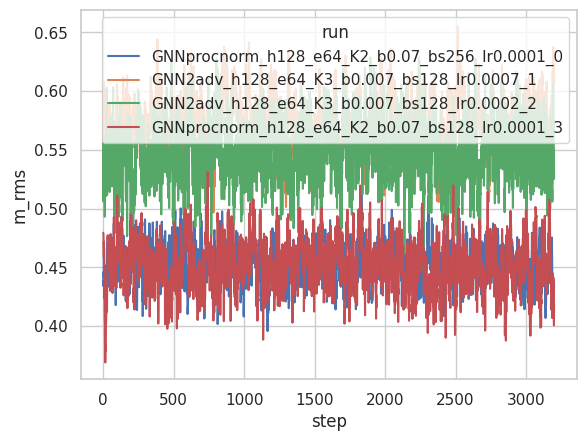

In [379]:
import seaborn as sns
sns.lineplot(data=df_traj_copy, x="step", y="m_rms", hue="run")

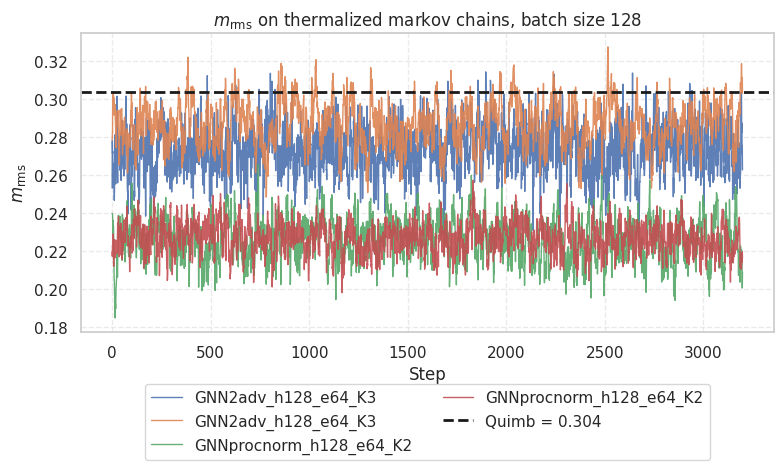

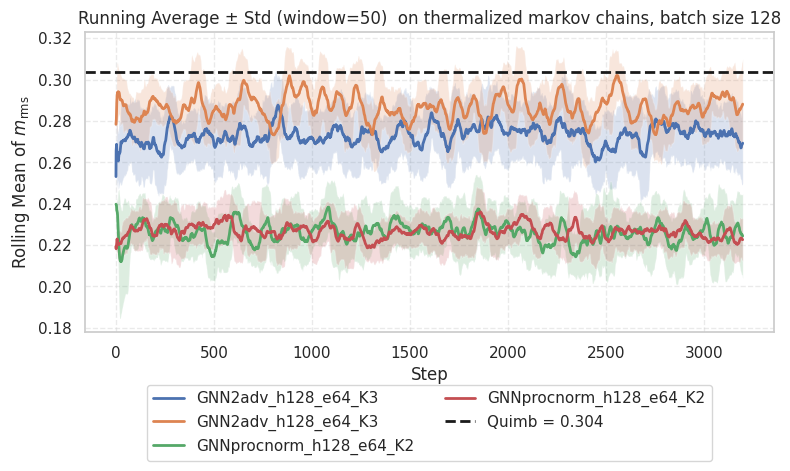

In [403]:
import pandas as pd
import matplotlib.pyplot as plt

def abbrevia(key):
    m = re.match(r'^(.*?K.).*(.)$', key)
    if m:
        return f"{m.group(1)}"
    else:
        return key[:10] + "…" + key[-1]
# 2) Plot raw trajectories con legenda esterna
# 4. Plot delle traiettorie
fig, ax = plt.subplots(figsize=(8, 5))
for run_key, df_run in df_traj_copy.groupby('run'):
    ax.plot(df_run['step'], df_run['m_rms']/2,
             alpha=0.9, linewidth=1, label=abbrevia(run_key))
    # 5. Linea orizzontale Quimb
ax.axhline(m_rms_quimb/2, color='k', linestyle='--', linewidth=2,
           label=f"Quimb = {m_rms_quimb/2:.3f}")
ax.set_xlabel('Step')
ax.set_ylabel(r'$m_\mathrm{rms}$')
ax.set_title('$m_{\\rm rms}$ on thermalized markov chains, batch size 128')
ax.grid(True, linestyle='--', alpha=0.4)
# Legenda sotto, 2 colonne (regola ncol in base al num. di run)
ax.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=2,
           frameon=True)

fig.tight_layout()
plt.show()

# 7. Plot rolling mean ± std (facoltativo)
window = 50
fig, ax = plt.subplots(figsize=(8, 5))
for run_key, df_run in df_traj_copy.groupby('run'):
    rm = df_run['m_rms'].rolling(window, min_periods=1).mean()/2
    rs = df_run['m_rms'].rolling(window, min_periods=1).std()/np.sqrt(2)

    ax.plot(df_run['step'], rm, linewidth=2, label=abbrevia(run_key))
    ax.fill_between(df_run['step'], rm - rs, rm + rs, alpha=0.2)

ax.axhline(m_rms_quimb/2, color='k', linestyle='--', linewidth=2,
           label=f"Quimb = {m_rms_quimb/2:.3f}")

ax.set_xlabel('Step')
ax.set_ylabel(r'Rolling Mean of $m_\mathrm{rms}$')
ax.set_title(f'Running Average ± Std (window={window})  on thermalized markov chains, batch size 128')
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(loc='upper center',
          bbox_to_anchor=(0.5, -0.15),
          ncol=2,
          frameon=True)
fig.tight_layout()
plt.show()

### Load unique model

In [358]:
filtered_dirs[-9]

'checkpointed_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.07__bs_128lr1.0e-04_loop1200x15_overlap_VMC/GNNprocnorm_h128_e64_K2'

In [331]:
import tensorflow as tf
import compgraph.tensorflow_version.model_loading
from compgraph.tensorflow_version.model_loading import check_and_reinitialize_model, load_model_from_path,extract_hyperparams_from_path
from simulation.initializer import create_graph_from_ham, initialize_NQS_model_fromhyperparams, initialize_hamiltonian_and_groundstate
from compgraph.tensorflow_version.graph_tuple_manipulation import initialize_graph_tuples_tf_opt, precompute_graph_structure
import sonnet as snt

# path_ckpt='checkpointed_logs/system_Heisenberg/2dsquare_05_05_Neel/beta0.1__bs_128lr7.0e-04_loop1024x15_overlap_VMC/GNN2adv_h128_e64_K3/checkpoints/initial_model-1'
hyperparams=extract_hyperparams_from_path(ckpt_path)
n_hyp,m_hyp=hyperparams.graph_params.n,hyperparams.graph_params.m
# n_hyp,m_hyp=6,6
graph,subl=create_graph_from_ham(hyperparams.graph_params.graphType,(n_hyp,m_hyp)
                                 ,sublattice=hyperparams.graph_params.sublattice)
graph_larger,subl_larger=create_graph_from_ham(hyperparams.graph_params.graphType,(n_hyp+2,m_hyp+2)
                                 ,sublattice=hyperparams.graph_params.sublattice)
GT_Batch_init=initialize_graph_tuples_tf_opt(128, graph, sublattice_encoding=subl)
GT_Batch_init_larger=initialize_graph_tuples_tf_opt(128, graph_larger, sublattice_encoding=subl_larger)
model_w_from_training=initialize_NQS_model_fromhyperparams(hyperparams.ansatz, hyperparams.ansatz_params,0)
optimizer=snt.optimizers.Adam(hyperparams.sim_params.learning_rate,0.9,0.99)
before_loading=model_w_from_training(GT_Batch_init)[0]
load_model_from_path(model=model_w_from_training, checkpoint_path=ckpt_path[:-6], optimizer=optimizer)
model_w_from_training(GT_Batch_init)[0], before_loading

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 1.6109641, 14.3383255], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 0.58344996, -0.9999976 ], dtype=float32)>)

In [353]:
from compgraph.monte_carlo import MCMCSampler, compute_phi_terms
import tensorflow as tf
import time
from compgraph.tensorflow_version.hamiltonian_operations import stochastic_energy_tf
model_fix=initialize_NQS_model_fromhyperparams(hyperparams.ansatz, hyperparams.ansatz_params)
model_fix(GT_Batch_init)
sen, rec, edge_pairs=precompute_graph_structure(graph)
GT_Batch_update=initialize_graph_tuples_tf_opt(128,graph, sublattice_encoding=subl)
sampler_var= MCMCSampler(GT_Batch_update)
template_graphs_output=initialize_graph_tuples_tf_opt(tf.shape(edge_pairs)[0]+1, graph, sublattice_encoding=subl)

sampler_te=MCMCSampler(GT_Batch_update, template_graphs_output,beta=0.07, edge_pairs=edge_pairs)
energy_real=[]
energy_imag=[]
std_energies=[]
magnetization=[]
grad_norms=[]
n_sites=n_hyp*m_hyp
psi=model_w_from_training(GT_Batch_update)
initial_energy, std_initial,_ =stochastic_energy_tf(psi, model_w_from_training, edge_pairs, template_graphs_output,GT_Batch_update,0)


In [354]:
initial_energy, std_initial

(<tf.Tensor: shape=(), dtype=complex64, numpy=(-7.7664094+0.8209515j)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.631698>)

In [ ]:
thermalization=100*n_sites

for i in range(thermalization):

    GT_Batch_update, psi_new=sampler_var.monte_carlo_update_on_batch_profilemem(model_w_from_training,GT_Batch_update)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [264]:
# 2b) Build checkerboard ε_i = ±1
eps_6x6 = np.array([1 if (x+y)%2==0 else -1
                for x in range(n_hyp) for y in range(m_hyp)])  # shape (16,)

In [265]:
sampling=100*n_sites

for i in range(sampling):
    for j in range(2*n_sites):
        GT_Batch_update, psi_new=sampler_var.monte_carlo_update_on_batch_profilemem(model_w_from_training,GT_Batch_update)
    spins_flat = GT_Batch_update.nodes[:,0]                  
    spins_2d    = tf.reshape(spins_flat, (hyperparams.sim_params.batch_size, n_sites))    

    # 4) Compute staggered metrics
    m_rms, m_abs, S_pp = batch_staggered_metrics_pm1(spins_2d, eps_6x6)
    print(i,m_rms, m_abs, S_pp)

0 tf.Tensor(0.20441924, shape=(), dtype=float32) tf.Tensor(0.15668403, shape=(), dtype=float32) tf.Tensor(1.5043403, shape=(), dtype=float32)
1 tf.Tensor(0.21109283, shape=(), dtype=float32) tf.Tensor(0.17447917, shape=(), dtype=float32) tf.Tensor(1.6041666, shape=(), dtype=float32)
2 tf.Tensor(0.20606403, shape=(), dtype=float32) tf.Tensor(0.1610243, shape=(), dtype=float32) tf.Tensor(1.5286459, shape=(), dtype=float32)
3 tf.Tensor(0.19357444, shape=(), dtype=float32) tf.Tensor(0.15364583, shape=(), dtype=float32) tf.Tensor(1.3489584, shape=(), dtype=float32)
4 tf.Tensor(0.19928257, shape=(), dtype=float32) tf.Tensor(0.15668403, shape=(), dtype=float32) tf.Tensor(1.4296875, shape=(), dtype=float32)
5 tf.Tensor(0.21855702, shape=(), dtype=float32) tf.Tensor(0.17144097, shape=(), dtype=float32) tf.Tensor(1.7196181, shape=(), dtype=float32)
6 tf.Tensor(0.21000487, shape=(), dtype=float32) tf.Tensor(0.17057292, shape=(), dtype=float32) tf.Tensor(1.5876737, shape=(), dtype=float32)
7 tf.Te

KeyboardInterrupt: 

In [413]:
psi_new=model_w_from_training(GT_Batch_update)
energy_after_term, std_initial_term,_ =stochastic_energy_tf(psi_new, model_w_from_training, edge_pairs, template_graphs_output,GT_Batch_update,0)
energy_after_term, std_initial_term

(<tf.Tensor: shape=(), dtype=complex64, numpy=(-10.860567+0.014412865j)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.96852887>)

In [420]:
graph_larger,subl_larger=create_graph_from_ham(hyperparams.graph_params.graphType,(n_hyp+2,m_hyp+2)
                                 ,sublattice=hyperparams.graph_params.sublattice)
GT_Batch_update_larger=initialize_graph_tuples_tf_opt(128, graph_larger, sublattice_encoding=subl_larger)
_,_, edge_pairs_larger=precompute_graph_structure(graph_larger)
template_graphs_output_larger=initialize_graph_tuples_tf_opt(tf.shape(edge_pairs_larger)[0]+1, graph_larger, sublattice_encoding=subl_larger)

In [428]:
psi_new=model_w_from_training(GT_Batch_update_larger)


energy_after_term, std_initial_term,_ =stochastic_energy_tf(psi_new, model_w_from_training, edge_pairs_larger, template_graphs_output_larger,GT_Batch_update_larger,0)
energy_after_term, std_initial_term

W0000 00:00:1745825715.646595 3113084 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1745825720.999738 1092911 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


(<tf.Tensor: shape=(), dtype=complex64, numpy=(-30.866627-55.119324j)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=668.77057>)

In [ ]:
thermalization=100*36

for i in range(thermalization):

    GT_Batch_update_larger, psi_new=sampler_var.monte_carlo_update_on_batch_profilemem(model_w_from_training,GT_Batch_update_larger)
    print(i, psi_new[0])


NameError: name 'sampler_var' is not defined

In [66]:
GT_Batch_update_sym=initialize_graph_tuples_tf_opt(128,graph, sublattice_encoding=subl,sz_sector=8)
thermalization=100*n_sites

for i in range(thermalization):

    GT_Batch_update_sym, psi_new=sampler_var.monte_carlo_update_on_batchv2(model_w_from_training,GT_Batch_update_sym)

### Compute energy and magnetization quantities in MC sampling

In [58]:
GT_Batch_update_single=initialize_graph_tuples_tf_opt(1,graph, sublattice_encoding=subl)
for i in range(thermalization*10):
    GT_Batch_update_single, psi_new=sampler_var.monte_carlo_update_on_batch_profilemem(model_w_from_training,GT_Batch_update_single)

In [ ]:
energy_real_sym=[]
energy_imag_sym=[]
std_energies_sym=[]
magnetization_sym=[]
m_rms_sym=[]
m_abs_sym=[]
Spp_sym=[]

for i in range(600):
    for j in range(16):
        GT_Batch_update_sym, psi_new=sampler_var.monte_carlo_update_on_batchv2(model_w_from_training,GT_Batch_update_sym)
    # final_energy_one_sample, final_std, loc_final=stochastic_energy_tf(psi_new, model_w_from_training, edge_pairs, template_graphs_output,GT_Batch_update_sym,0)
    spins_flat = GT_Batch_update_sym.nodes[:,0]                         # shape (batch_size * n_sites,)
    spins_2d    = tf.reshape(spins_flat, (hyperparams.sim_params.batch_size, n_sites))     # (batch_size, n_sites)

    # 4) Compute staggered metrics
    m_rms, m_abs, S_pp = batch_staggered_metrics_pm1(spins_2d, eps)
    # print(f"Step {i:3d}  E = {final_energy_one_sample:.4f} ± {final_std:.4f}  "
    #       f"m_rms = {m_rms:.4f}, m_abs = {m_abs:.4f}, S(π,π) = {S_pp:.4f}")
    # energy_real_sym.append(tf.math.real(final_energy_one_sample))
    # energy_imag_sym.append(final_std)
    # std_energies_sym.append(final_std)
    m_rms_sym.append(m_rms)
    m_abs_sym.append(m_abs)
    Spp_sym.append(S_pp)

Step   0  E = -10.9803-0.0063j ± 2.4148  m_rms = 0.6412, m_abs = 0.5625, S(π,π) = 6.5781
Step   1  E = -10.9562+0.1126j ± 2.4240  m_rms = 0.6416, m_abs = 0.5645, S(π,π) = 6.5859
Step   2  E = -10.8305+0.1219j ± 2.3668  m_rms = 0.6450, m_abs = 0.5703, S(π,π) = 6.6562
Step   3  E = -10.7383+0.1245j ± 2.1166  m_rms = 0.6401, m_abs = 0.5684, S(π,π) = 6.5547
Step   4  E = -10.7352+0.1387j ± 2.1360  m_rms = 0.6397, m_abs = 0.5703, S(π,π) = 6.5469
Step   5  E = -10.7520+0.2267j ± 2.1445  m_rms = 0.6366, m_abs = 0.5703, S(π,π) = 6.4844
Step   6  E = -10.7339+0.1671j ± 2.0588  m_rms = 0.6358, m_abs = 0.5703, S(π,π) = 6.4688
Step   7  E = -10.7171+0.0855j ± 2.1317  m_rms = 0.6277, m_abs = 0.5605, S(π,π) = 6.3047
Step   8  E = -10.7720+0.0567j ± 2.1249  m_rms = 0.6316, m_abs = 0.5605, S(π,π) = 6.3828
Step   9  E = -10.7022-0.0081j ± 2.1272  m_rms = 0.6273, m_abs = 0.5586, S(π,π) = 6.2969
Step  10  E = -10.7300-0.0328j ± 2.0678  m_rms = 0.6242, m_abs = 0.5547, S(π,π) = 6.2344
Step  11  E = -10.617

In [59]:
energy_real=[]
energy_imag=[]
std_energies=[]
m_rms_list=[]
m_abs_list=[]
stag_squared_list=[]

In [60]:
for i in range(8000):
    for j in range(1):
       GT_Batch_update, psi_new=sampler_var.monte_carlo_update_on_batch_profilemem(model_w_from_training,GT_Batch_update)           
    final_energy_one_sample, final_std, loc_final=stochastic_energy_tf(psi_new, model_w_from_training, edge_pairs, template_graphs_output,GT_Batch_update,0)
    spins_flat = GT_Batch_update.nodes[:,0]                  
    spins_2d    = tf.reshape(spins_flat, (hyperparams.sim_params.batch_size, n_sites))    

    # 4) Compute staggered metrics
    m_rms, m_abs, S_pp = batch_staggered_metrics_pm1(spins_2d, eps)
    print(f"Step {i:3d}  E = {final_energy_one_sample:.4f} ± {final_std:.4f}  "
          f"m_rms = {m_rms:.4f}, m_abs = {m_abs:.4f}, S(π,π) = {S_pp:.4f}")
    energy_real.append(tf.math.real(final_energy_one_sample))
    energy_imag.append(final_std)
    std_energies.append(final_std)
    m_rms_list.append(m_rms)
    m_abs_list.append(m_abs)
    stag_squared_list.append(S_pp)

Step   0  E = -11.0409+0.0057j ± 0.6929  m_rms = 0.4773, m_abs = 0.3965, S(π,π) = 3.6445
Step   1  E = -11.0038-0.0128j ± 0.7294  m_rms = 0.4747, m_abs = 0.3906, S(π,π) = 3.6055
Step   2  E = -11.0031-0.0281j ± 0.7401  m_rms = 0.4744, m_abs = 0.3926, S(π,π) = 3.6016
Step   3  E = -11.0002-0.0272j ± 0.7340  m_rms = 0.4723, m_abs = 0.3916, S(π,π) = 3.5684
Step   4  E = -11.0059-0.0384j ± 0.7677  m_rms = 0.4730, m_abs = 0.3916, S(π,π) = 3.5801
Step   5  E = -11.0469-0.0243j ± 0.7575  m_rms = 0.4775, m_abs = 0.3945, S(π,π) = 3.6484
Step   6  E = -10.9834-0.0211j ± 0.8069  m_rms = 0.4764, m_abs = 0.3916, S(π,π) = 3.6309
Step   7  E = -11.0253-0.0173j ± 0.7587  m_rms = 0.4726, m_abs = 0.3906, S(π,π) = 3.5742
Step   8  E = -10.9786+0.0101j ± 0.7970  m_rms = 0.4711, m_abs = 0.3867, S(π,π) = 3.5508
Step   9  E = -10.9738-0.0049j ± 0.7970  m_rms = 0.4695, m_abs = 0.3848, S(π,π) = 3.5273
Step  10  E = -11.0158-0.0080j ± 0.7385  m_rms = 0.4690, m_abs = 0.3848, S(π,π) = 3.5195
Step  11  E = -11.023

## Magnetization histogram

Step    0  E = -10.6857-0.1721j ± 2.5366   m_rms = 0.4713,  m_abs = 0.3926,  S(π,π) = 3.5547
Step    1  E = -10.9325-0.0509j ± 2.8991   m_rms = 0.4707,  m_abs = 0.3936,  S(π,π) = 3.5449
Step    2  E = -10.9313-0.0901j ± 2.9836   m_rms = 0.4710,  m_abs = 0.3936,  S(π,π) = 3.5488
Step    3  E = -10.8459-0.1203j ± 2.9035   m_rms = 0.4746,  m_abs = 0.3975,  S(π,π) = 3.6035
Step    4  E = -10.7420-0.1341j ± 3.1606   m_rms = 0.4757,  m_abs = 0.3965,  S(π,π) = 3.6211
Step    5  E = -10.8618-0.1303j ± 2.8356   m_rms = 0.4787,  m_abs = 0.3994,  S(π,π) = 3.6660
Step    6  E = -10.8663-0.1336j ± 2.4722   m_rms = 0.4744,  m_abs = 0.3945,  S(π,π) = 3.6016
Step    7  E = -10.7159-0.1691j ± 2.7012   m_rms = 0.4779,  m_abs = 0.3975,  S(π,π) = 3.6543
Step    8  E = -10.9135-0.1806j ± 2.5346   m_rms = 0.4764,  m_abs = 0.3975,  S(π,π) = 3.6309
Step    9  E = -10.7045-0.1523j ± 2.3700   m_rms = 0.4752,  m_abs = 0.3965,  S(π,π) = 3.6133
Step   10  E = -10.5854-0.1561j ± 2.3364   m_rms = 0.4757,  m_abs = 0.

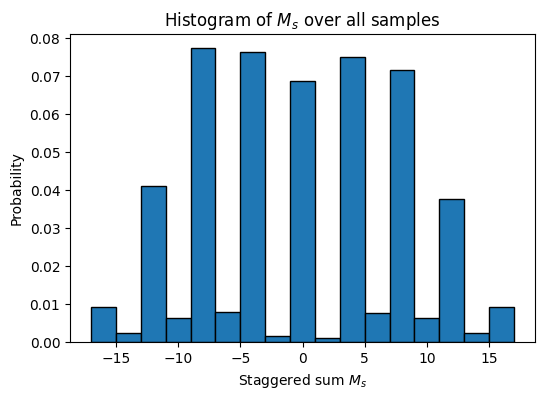

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# --- before the loop: parameters and storage ---
p_global = 0.01       # 1% chance per step of a global flip
Ms_values = []        # will collect every sample's Ms

# pre-compute eps as float32
eps = tf.constant(eps, dtype=tf.float32)  # shape (n_sites,)

for i in range(2000):
    # — do your local Monte Carlo updates —
    for _ in range(1):
        GT_Batch_update, psi_new = sampler_var.monte_carlo_update_on_batch(
            model_w_from_training, GT_Batch_update
        )

    # — occasionally do a global flip —
    if np.random.rand() < p_global:
        # flip the sign of the first node-feature (the spin) for every site
        nodes = GT_Batch_update.nodes  # shape (batch_size*n_sites, feature_dim)
        s = nodes[:, 0]                # all spins flattened
        # build a new nodes tensor with flipped spins
        new_nodes = tf.concat([
            tf.reshape(-s, (-1,1)),   # flip sign
            nodes[:, 1:],              # keep other features
        ], axis=1)
        # replace in the GraphTuple
        GT_Batch_update = GT_Batch_update._replace(nodes=new_nodes)
        # no need to re-compute psi_new: |ψ(-s)|² = |ψ(s)|²

    # — energy estimate —
    final_energy_one_sample, final_std, loc_final = stochastic_energy_tf(
        psi_new, model_w_from_training,
        edge_pairs, template_graphs_output,
        GT_Batch_update, 0
    )
    energy_real.append(float(tf.math.real(final_energy_one_sample).numpy()))
    std_energies.append(float(final_std.numpy()))

    # — extract spins & compute Ms for every chain in the batch —
    spins_flat = GT_Batch_update.nodes[:, 0]                   # (B*n_sites,)
    spins_2d   = tf.reshape(spins_flat, (hyperparams.sim_params.batch_size, n_sites))  # (B,N)
    Ms_batch   = tf.reduce_sum(spins_2d * eps[None, :], axis=1) # (B,)

    # — collect for histogram & error-analysis —
    Ms_values.extend(Ms_batch.numpy().tolist())

    # — compute and log your usual metrics —
    m_rms, m_abs, S_pp = batch_staggered_metrics_pm1(spins_2d, eps.numpy())
    m_rms_list.append(float(m_rms.numpy()))
    m_abs_list.append(float(m_abs.numpy()))
    stag_squared_list.append(float(S_pp.numpy()))

    print(f"Step {i:4d}  E = {final_energy_one_sample:.4f} ± {final_std:.4f}"
          f"   m_rms = {m_rms:.4f},  m_abs = {m_abs:.4f},  S(π,π) = {S_pp:.4f}")

# --- after the loop: plot Ms histogram ---

Ms_arr = np.array(Ms_values)
counts, bins = np.histogram(Ms_arr, bins=np.arange(-n_sites-1, n_sites+2, 2), density=True)

plt.figure(figsize=(6,4))
plt.bar(bins[:-1], counts, width=2, align='edge', edgecolor='k')
plt.xlabel("Staggered sum $M_s$")
plt.ylabel("Probability")
plt.title("Histogram of $M_s$ over all samples")
plt.show()


## Autocorrelation computation

In [61]:
def integrated_autocorr_time(X, max_lag=None):
    X = np.asarray(X, float)
    N = len(X)
    X -= X.mean()
    var = np.dot(X,X)
    if max_lag is None:
        max_lag = N//2
    rho = np.array([np.dot(X[:N-t], X[t:]) / var for t in range(max_lag)])
    # window at first zero-crossing
    pos = np.where(rho<0)[0]
    t_cut = pos[0] if len(pos)>0 else max_lag
    return 0.5 + rho[1:t_cut].sum()

# compute for batch‐mean series
tau_m_rms = integrated_autocorr_time(np.array(m_rms_list))
tau_m_abs = integrated_autocorr_time(np.array(m_abs_list))
tau_Spp   = integrated_autocorr_time(np.array(stag_squared_list))
tau_energy = integrated_autocorr_time(np.array(energy_real))
print("tau(m_rms) =", tau_m_rms)
print("tau(m_abs) =", tau_m_abs)
print("tau(S_pp)  =", tau_Spp)
print("tau(energy) =", tau_energy)

tau(m_rms) = 142.02737531021734
tau(m_abs) = 137.30584178990108
tau(S_pp)  = 139.86494977607362
tau(energy) = 46.51110588208491


### autocorrelation

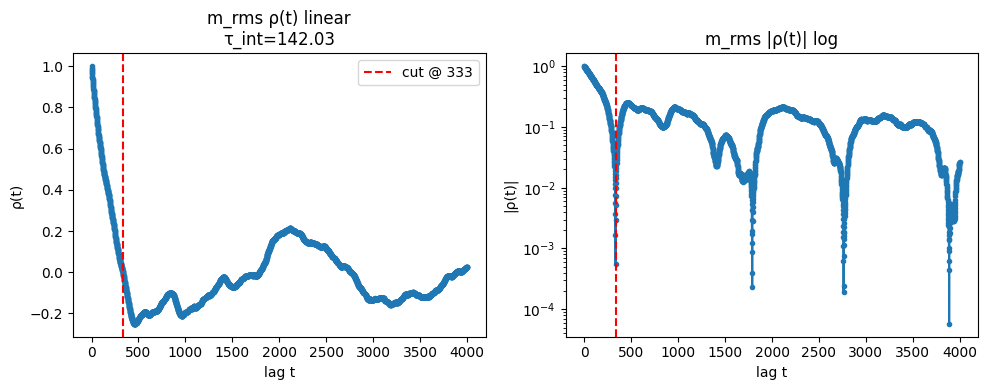

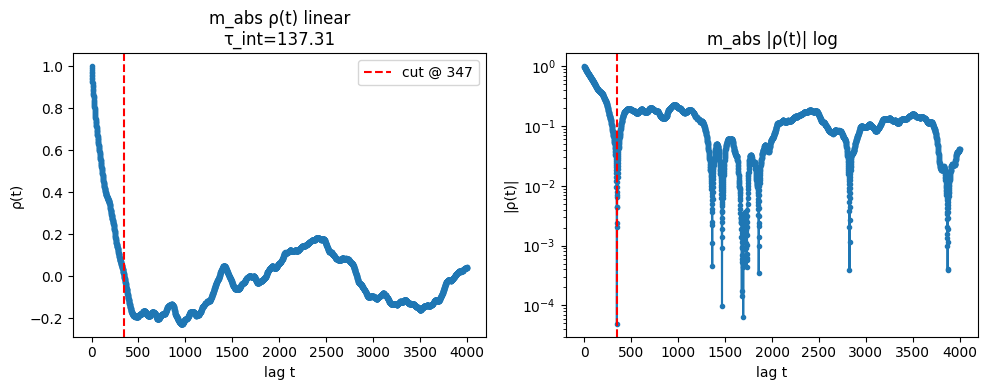

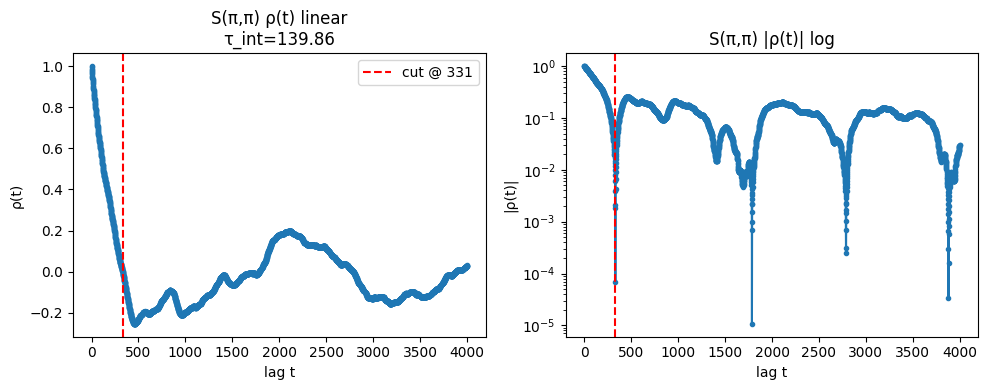

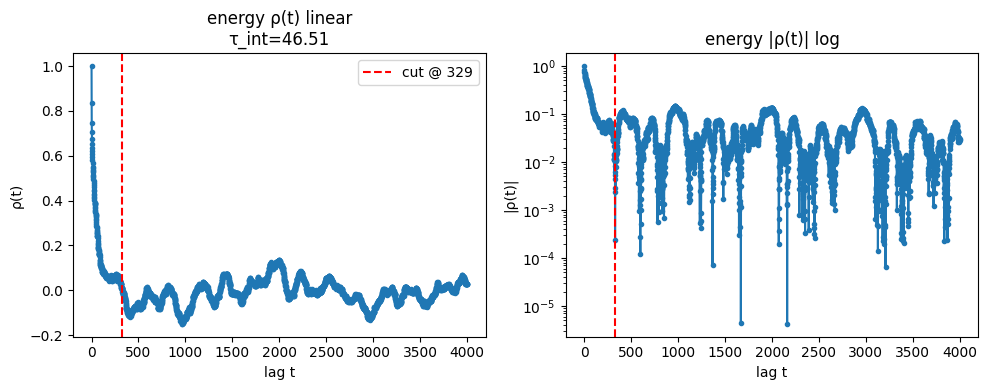

Results:
  τ(m_rms) = 142.02737531021734
  τ(m_abs) = 137.30584178990108
  τ(S_pp)  = 139.86494977607362
  τ(energy)= 46.51110588208491


In [62]:
import numpy as np
import matplotlib.pyplot as plt

def integrated_autocorr_time(X, max_lag=None, do_plot=True, title=""):
    """
    Estimate the integrated autocorrelation time τ_int of 1D array X,
    *and* plot ρ(t) if do_plot=True.

    Returns:
        tau_int, rho   # tau and the full autocorrelation array
    """
    X = np.asarray(X, float)
    N = len(X)
    X -= X.mean()
    var = np.dot(X, X)

    if max_lag is None:
        max_lag = N // 2

    # compute autocorrelation ρ(t)
    rho = np.empty(max_lag)
    for t in range(max_lag):
        rho[t] = np.dot(X[:N-t], X[t:]) / var

    # find first zero crossing
    pos = np.where(rho < 0)[0]
    t_cut = pos[0] if len(pos)>0 else max_lag

    # integrated autocorrelation time
    tau_int = 0.5 + rho[1:t_cut].sum()

    if do_plot:
        lags = np.arange(max_lag)
        fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
        ax1.plot(lags, rho, '.-')
        ax1.axvline(t_cut, color='red', linestyle='--',
                    label=f"cut @ {t_cut}")
        ax1.set_title(f"{title} ρ(t) linear\nτ_int={tau_int:.2f}")
        ax1.set_xlabel("lag t")
        ax1.set_ylabel("ρ(t)")
        ax1.legend()

        ax2.semilogy(lags, np.abs(rho), '.-')
        ax2.axvline(t_cut, color='red', linestyle='--')
        ax2.set_title(f"{title} |ρ(t)| log")
        ax2.set_xlabel("lag t")
        ax2.set_ylabel("|ρ(t)|")

        plt.tight_layout()
        plt.show()

    return tau_int, rho

# --- now call it on your four series ---

tau_m_rms,   rho_rms   = integrated_autocorr_time(
    m_rms_list,   title="m_rms"
)
tau_m_abs,   rho_abs   = integrated_autocorr_time(
    m_abs_list,   title="m_abs"
)
tau_Spp,     rho_Spp   = integrated_autocorr_time(
    stag_squared_list, title="S(π,π)"
)
tau_energy,  rho_energy= integrated_autocorr_time(
    energy_real,  title="energy"
)

print("Results:")
print("  τ(m_rms) =", tau_m_rms)
print("  τ(m_abs) =", tau_m_abs)
print("  τ(S_pp)  =", tau_Spp)
print("  τ(energy)=", tau_energy)


In [146]:
import numpy as np

def integrated_autocorr_time(X, c=5, burn_fraction=0.2, max_lag=None, tol=1e-3):
    """
    Estimate the integrated autocorrelation time τ_int of a 1D series X.
    - Discards the first burn_fraction of samples.
    - Uses self-consistent window M = min(max_lag, c * τ_prev).
    - Iterates until τ converges within tol.
    """
    X = np.asarray(X, float)
    N = len(X)
    # 1) burn-in removal
    burn = int(burn_fraction * N)
    if burn >= N//2:
        raise ValueError("burn_fraction too large for series length")
    X = X[burn:]
    N2 = len(X)

    # center and variance
    X -= X.mean()
    var = np.dot(X, X)

    # maximum lag to consider
    if max_lag is None:
        max_lag = N2 // 2

    # precompute autocorrelation up to max_lag
    rho = np.empty(max_lag)
    for t in range(max_lag):
        rho[t] = np.dot(X[:N2-t], X[t:]) / var

    # 2) self-consistent iteration
    tau = 1.0  # initial guess
    for _ in range(50):
        M = min(int(c * tau), max_lag - 1)
        tau_new = 0.5 + rho[1:M+1].sum()
        if abs(tau_new - tau) < tol:
            tau = tau_new
            print("Warning: τ_int did converge (last change = ",)

            break
        tau = tau_new
    else:
        # no convergence warning
        print("Warning: τ_int did not fully converge (last change = ",
              tau_new - tau, ")")

    return tau, rho

# Example usage:
# assume m_rms_list is your list of batch‐mean m_rms values
tau_m_rms   = integrated_autocorr_time(m_rms_list,   c=5, burn_fraction=0.1)
tau_m_abs   = integrated_autocorr_time(m_abs_list,   c=5, burn_fraction=0.1)
tau_Spp     = integrated_autocorr_time(stag_squared_list, c=5, burn_fraction=0.1)
tau_energy  = integrated_autocorr_time(energy_real,  c=5, burn_fraction=0.1)

print("τ(m_rms) =", tau_m_rms)
print("τ(m_abs) =", tau_m_abs)
print("τ(S_pp)  =", tau_Spp)
print("τ(energy)=", tau_energy)


τ(m_rms) = (190.40229822953864, array([1.        , 0.99383225, 0.98635935, ..., 0.02893018, 0.02887192,
       0.028675  ]))
τ(m_abs) = (220.65707132817306, array([1.        , 0.99487119, 0.98823818, ..., 0.03016024, 0.02994465,
       0.02959301]))
τ(S_pp)  = (187.15088302643338, array([1.        , 0.99386164, 0.98653978, ..., 0.02473216, 0.02470868,
       0.02455043]))
τ(energy)= (0.5675962064595349, array([ 1.00000000e+00,  3.55793925e-02,  3.20168140e-02, ...,
       -5.86700913e-03, -1.98069826e-05, -9.68123419e-04]))


## End of Autocorrelation computation

In [65]:
ge=qu.groundenergy(H)

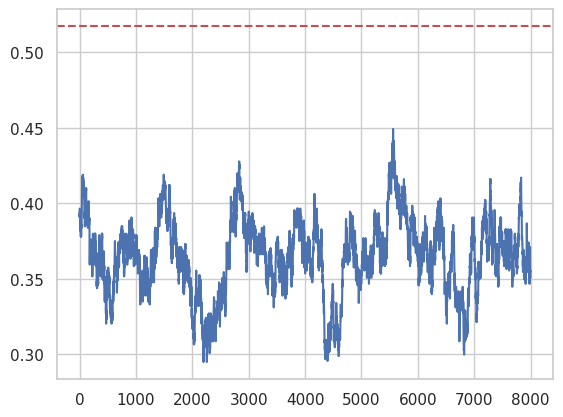

In [303]:
import matplotlib.pyplot as plt
plt.axhline(y=m_abs_quimb, color='r', linestyle='--', label='Exact m_rms')
plt.plot(m_abs_list)

In [ ]:
n_samples=6000
autocorr=n_sites
energy_real=[]
energy_imag=[]
std_energies=[]
magnetization=[]
stagg_magnet=[]

for sample in range(0,n_samples):

    for i in range(autocorr):

        GT_Batch_update, psi_new=sampler_var.monte_carlo_update_on_batch(model_w_from_training,GT_Batch_update)
    energy, std_energy, loc_energies = stochastic_energy_tf(psi_new, model_w_from_training, edge_pairs, template_graphs_output,GT_Batch_update)
    energy_real.append(tf.math.real(energy))
    energy_imag.append(tf.math.imag(energy))
    std_energies.append(std_energy)
    
    spins=GT_Batch_update


In [304]:
final_energy_one_sample, final_std

(<tf.Tensor: shape=(), dtype=complex64, numpy=(-10.995794+0.0074543925j)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.6236802>)

# Quimb AFM Gs

In [16]:
def _build_Sz_ops(n, m):
    """Return list of Sz operators for each site (flattened index i↔(x,y))."""
    dims = [[2]*m]*n
    Sz = qu.spin_operator('z', sparse=True)
    ops = []
    for x in range(n):
        for y in range(m):
            ops.append(qu.ikron(Sz, dims, inds=[(x,y)]))
    return ops
def _sign_pattern(n, m):
    """
    Flattened array ε_i = (–1)^(x+y).
    This only holdes if we consider even number of sites
    where we can apply the Marshall sign rule, for odd number of sites
    or geometrically different lattices we can not measure the AFM state like this anymore
    """
    eps = np.zeros(n*m, dtype=int)
    for x in range(n):
        for y in range(m):
            eps[x*m + y] = 1 if (x+y)%2==0 else -1
    return eps

In [17]:
Sz_ops=_build_Sz_ops(n, m)
sign_pattern=_sign_pattern(n, m)


In [ ]:
import numpy as np, quimb as qu

def staggered_operators(n, m):
    """Return epsilon-array and staggered operator Ms."""
    dims = [[2]*m]*n
    Sz   = qu.spin_operator('z', sparse=True)
    eps  = np.array([ 1 if (x+y)%2==0 else -1
                      for x in range(n) for y in range(m)])
    Ms   = sum(eps[i] * qu.ikron(Sz, dims, inds=[divmod(i,m)])
               for i in range(n*m))
    return eps, Ms

def staggered_measures(psi, n, m, return_full=False):
    """m_s,rms , m_s,abs , structure factor  S(pi,pi)."""
    eps, Ms = staggered_operators(n, m)
    m_i=_build_Sz_ops(n, m)
    M_tot=sum(m_i[i] for i in range(n*m))
    magnetization= qu.expec(M_tot, psi)
    N   = n*m
    Ms2 = qu.expec(Ms@Ms, psi)
    m_rms = np.sqrt(Ms2)/N
    # absolute value ⟨|Ms|⟩ : brute-force sum over basis for small N
    dims = [[2]*m]*n
    basis_sz = 2**N
    if N <= 20:                         # exact enumeration still cheap
        basis = (np.arange(basis_sz)[:,None] >> np.arange(N)) & 1
        basis = basis*2 - 1             # ±1 spins
        probs = np.abs(psi)**2
        Ms_vals = (eps[None,:] * basis).sum(axis=1)
        m_abs = np.dot(probs.flatten(), np.abs(Ms_vals)) / N
    else:                               # need MC sampling
        m_abs = None
    Spp = Ms2 / N
    if return_full:
        return dict(m_rms=m_rms, m_abs=m_abs, Spp=Spp,
                    Ms2=Ms2, Ms_op=Ms)
    return m_rms, m_abs, Spp, magnetization

# n×m demo ------------------------------------------------------------
import quimb as qu
n,m=4,4
bz=0
hamiltonian=qu.ham_heis_2D(n,m,1, bz,True)
gs=qu.groundstate(hamiltonian)
m_rms, m_abs, Spp, magn = staggered_measures(gs,n,m)
print(f"{n}×{m} singlet  →  ⟨Ms⟩={magn}  but")
print(f"  m_s,rms  = {m_rms:.4f}")
print(f"  m_s,abs  = {m_abs:.4f}")
print(f"  S(π,π)   = {Spp:.4f}")


4×4 singlet  →  ⟨Ms⟩=-1.141781048846997e-28  but
  m_s,rms  = 0.3036
  m_s,abs  = 0.5174
  S(π,π)   = 1.4748


In [288]:
3*Spp/n/m, S2[0, 0]

(0.27652713611324775, 0.27652713611324775)

In [ ]:
import numpy as np
import quimb as qu

# ------------------------------------------------------------------
# 1. single–site spin-½ operators (sparse keeps memory low)
Sx = qu.spin_operator('x', sparse=True)
Sy = qu.spin_operator('y', sparse=True)
Sz = qu.spin_operator('z', sparse=True)

# ------------------------------------------------------------------
def _site_op(op, i, N):
    """Return operator `op` acting on site i (0 … N-1)."""
    return qu.ikron(op, dims=[2]*N, inds=[i])

def build_site_ops(n, m):
    """Pre-build {Sx_i, Sy_i, Sz_i} for every site to avoid repetition."""
    N   = n*m
    Sxs = [_site_op(Sx, i, N) for i in range(N)]
    Sys = [_site_op(Sy, i, N) for i in range(N)]
    Szs = [_site_op(Sz, i, N) for i in range(N)]
    return Sxs, Sys, Szs

# ------------------------------------------------------------------
def spin_structure_factor(psi, n, m, kxs=None, kys=None):
    """
    Return S²(kx,ky) on the mesh (len(kxs), len(kys)).
    """
    N      = n*m
    Sxs, Sys, Szs = build_site_ops(n, m)          # cache single-site ops
    coords = np.array([(i//m, i % m) for i in range(N)])

    # two-site correlator C_{ij} = Σ_α <S_i^α S_j^α>
    C = np.zeros((N, N), dtype=float)
    for i in range(N):
        for j in range(N):
            C[i, j] = (
                qu.expec(Sxs[i] @ Sxs[j], psi)
              + qu.expec(Sys[i] @ Sys[j], psi)
              + qu.expec(Szs[i] @ Szs[j], psi)
            )

    # default k-grid covers the Brillouin zone
    if kxs is None:
        kxs = np.linspace(-np.pi, np.pi, n, endpoint=False)
    if kys is None:
        kys = np.linspace(-np.pi, np.pi, m, endpoint=False)

    S2 = np.empty((len(kxs), len(kys)), dtype=float)
    for ix, kx in enumerate(kxs):
        for iy, ky in enumerate(kys):
            phase = np.exp(1j * (kx*(coords[:,0,None]-coords[:,0])
                               + ky*(coords[:,1,None]-coords[:,1])))
            S2[ix, iy] = (C * phase).sum().real / N**2
    return kxs, kys, S2


Ham_3x3=qu.ham_heis_2D(3,3,1,0.0,True)
gs_3x3=qu.groundstate(Ham_3x3)
# structure factor
kx, ky, S2 = spin_structure_factor(gs_3x3, 3,3)

# value at (π,π)
ix = np.argmin(np.abs(kx - np.pi))
iy = np.argmin(np.abs(ky - np.pi))
print(f"S²(π,π) = {S2[ix, iy]:.4f}")


S²(π,π) = 0.0514


In [300]:
# build a k–grid in [−π, π)
kxs = np.linspace(-np.pi, np.pi, n, endpoint=False)
kys = np.linspace(-np.pi, np.pi, m, endpoint=False)
kx, ky, S2 = spin_structure_factor(gs, n, m, kxs, kys)

# find index whose k is closest to +π (mod 2π)
def find_pi_index(ks):
    # map each point into [0, 2π), then find closest to π
    ks_mod = (ks + 2*np.pi) % (2*np.pi)
    return int(np.argmin(np.abs(ks_mod - np.pi)))

ix = find_pi_index(kxs)
iy = find_pi_index(kys)

print(f"S²(π,π) = {S2[ix, iy]:.6f}")



S²(π,π) = 0.276527


In [302]:
ix, iy

(0, 0)

In [71]:
import quimb as qu, numpy as np

n=m=4; N=n*m
H  = qu.ham_heis_2D(n, m, j=1.0, cyclic=True, sparse=True)
E0 = qu.groundenergy(H)
psi= qu.groundstate(H)    # dense

# helper -------------------------------------------------------------
def staggered_ops(n,m):
    Sz=qu.spin_operator('z', sparse=True); dims=[[2]*m]*n
    eps=np.array([1 if (x+y)%2==0 else -1
                  for x in range(n) for y in range(m)])
    Ms = sum(eps[i]*qu.ikron(Sz,dims,inds=[divmod(i,m)])
             for i in range(n*m))
    return eps, Ms

eps, Ms = staggered_ops(n,m)
Sz_ops   = [qu.ikron(qu.spin_operator('z', sparse=True),
                     [[2]*m]*n, inds=[divmod(i,m)])
            for i in range(N)]

# uniform ------------------------------------------------------------
M_tot   = sum(Sz_ops)
m_uniform = qu.expec(M_tot, psi)/N

# staggered ----------------------------------------------------------
Ms2   = qu.expec(Ms@Ms, psi)
m_rms = (Ms2**0.5)/N
Spp   = Ms2/N

# absolute -----------------------------------------------------------
basis = ((np.arange(2**N)[:,None]>>np.arange(N))&1)*2 - 1
probs = np.abs(psi)**2
Ms_vals = (eps[None,:]*basis).sum(axis=1)
m_abs = np.dot(probs.flatten(), np.abs(Ms_vals))/N

# Binder cumulant ----------------------------------------------------
Ms4 = qu.expec(Ms@Ms@Ms@Ms, psi)
U4  = 1 - Ms4/(3*Ms2**2)

print(f"E0/site   = {E0/N:.6f}")
print(f"m_uniform = {m_uniform:+.3e}")
print(f"m_rms     = {m_rms:.6f}")
print(f"m_abs     = {m_abs:.6f}")
print(f"S(π,π)    = {Spp:.6f}")
print(f"U4        = {U4:.6f}")


E0/site   = -0.701780
m_uniform = -2.858e-31
m_rms     = 0.303605
m_abs     = 0.517378
S(π,π)    = 1.474811
U4        = 0.379142


In [ ]:
import quimb as qu, numpy as np
from quimb.utils import spin_basis   
L = 3
H = qu.ham_heis_2D(L, L, j=1.0, bz=-0.67, cyclic=True)

# work in fixed-Sz sectors
def E0_in_sector(Mz):
    basis = qu.spin_basis(L*L, Ms=Mz)
    E0 = qu.groundenergy(H, k=1, which='SA', basis=basis)
    return E0

Mzs = np.arange(-L*L/2, L*L/2+1)   # -4.5 … +4.5
E0_M = {Mz: E0_in_sector(Mz) for Mz in Mzs}

# find global minimum energy and all sectors sharing it
E_min = min(E0_M.values())
degenerate = [Mz for Mz,E in E0_M.items() if abs(E-E_min) < 1e-10]

print("Ground-energy =", E_min)
print("Degenerate S^z sectors:", degenerate)


AttributeError: module 'quimb' has no attribute 'spin_basis'

# 6x6 

In [19]:
import re
# List of run directories containing TensorBoard events & checkpoints:
# all_checkpoints = glob.glob("checkpointed_logs/**/checkpoints", recursive=True)
run_dirs_6x6 = glob.glob("checkpointed_logs/**/GNN*", recursive=True)

filtered_dirs_6x6 = [ckpt for ckpt in run_dirs if re.search(r'06_06', ckpt)]
checkpoint_dirs_6x6 = [f"{path}checkpoints" for path in filtered_dirs]

n_sites_6x6 = 36   # for 4×4
thermalization_6x6 = 500 * n_sites

df_runs_6x6 = batch_extract(filtered_dirs_6x6,  tags=("training/energy_real","training/std_energy","training/staggered_magnetization_sqrt",
                                              "training/staggered_magnetization_S_pp","training/staggered_magnetization_absv2","configuration/hyperparameters"))

In [20]:
# Step 1: Decode byte strings to regular strings
df_runs_6x6['config_str'] = df_runs_6x6['configuration/hyperparameters'].apply(lambda x: x.decode() if isinstance(x, bytes) else str(x))

# Step 2: Extract seed if present
df_runs_6x6['seed'] = df_runs_6x6['config_str'].apply(
    lambda s: int(re.search(r'seed:\s*(\d+)', s).group(1)) if re.search(r'seed:\s*(\d+)', s) else np.nan
)
df_runs_6x6["final_energy"] = df_runs_6x6["training/energy_real"].apply(lambda v: v[-1] if len(v)>0 else np.nan)
df_runs_6x6["final_std"]    = df_runs_6x6["training/std_energy"].apply(lambda v: v[-1] if len(v)>0 else np.nan)
df_runs_6x6["final_stagg"]  = df_runs_6x6["training/staggered_magnetization_absv2"].apply(lambda v: v[-1] if len(v)>0 else np.nan)
min_iterations=1000
df_runs_6x6_seeded=df_runs_6x6[~df_runs_6x6['seed'].isna()]
df_runs_6x6_filtered = df_runs_6x6_seeded[df_runs_6x6_seeded['training/energy_real'].apply(len) >= min_iterations].copy()


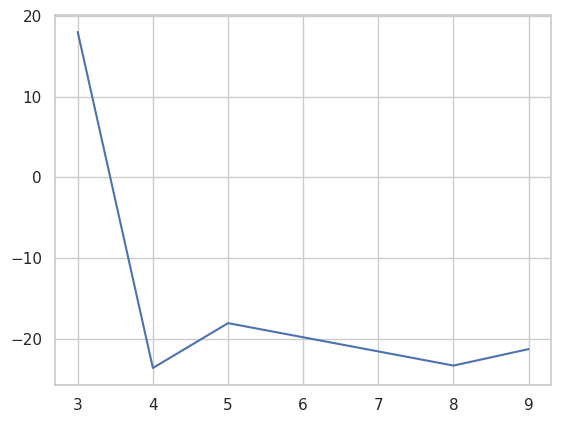

In [21]:
plt.plot(df_runs_6x6_seeded["final_energy"])

In [22]:
import os, glob
from tensorboard.backend.event_processing import event_accumulator
from tensorboard.compat.proto import tensor_pb2
import tensorflow as tf
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns # for aesthetics and potentially different plot types

df_runs_6x6_seeded_copy= df_runs_6x6_seeded.copy()
# Apply extraction
df_runs_6x6_seeded_copy['config_str'] = df_runs_6x6_seeded_copy['configuration/hyperparameters'].apply(safe_decode)
hyperparams_df = df_runs_6x6_seeded_copy['config_str'].apply(lambda s: pd.Series(extract_specific_hyperparams(s)))
df_runs_6x6_seeded_copy = pd.concat([df_runs_6x6_seeded_copy, hyperparams_df], axis=1)

# Filter out runs without seed or insufficient iterations
min_iterations = 1000
df_runs_6x6_seeded_copy_filtered = df_runs_6x6_seeded_copy[~df_runs_6x6_seeded_copy['seed'].isna()]
df_runs_6x6_seeded_copy_filtered = df_runs_6x6_seeded_copy_filtered[df_runs_6x6_seeded_copy_filtered['training/energy_real'].apply(len) >= min_iterations].copy()

# Add final values
df_runs_6x6_seeded_copy_filtered["final_energy"] = df_runs_6x6_seeded_copy_filtered["training/energy_real"].apply(lambda v: v[-1] if len(v)>0 else np.nan)
df_runs_6x6_seeded_copy_filtered["final_std"]    = df_runs_6x6_seeded_copy_filtered["training/std_energy"].apply(lambda v: v[-1] if len(v)>0 else np.nan)
df_runs_6x6_seeded_copy_filtered["final_stagg"]  = df_runs_6x6_seeded_copy_filtered["training/staggered_magnetization_absv2"].apply(lambda v: v[-1] if len(v)>0 else np.nan)

print(f"Original runs: {len(df_runs_6x6_seeded_copy)}")
print(f"Runs after filtering (seed and >= {min_iterations} iterations): {len(df_runs_6x6_seeded_copy_filtered)}")

# Define exact values for 4x4
exact_energy_6x6 = -0.6783*36 # Your value from the plot
exact_stagg_abs_6x6 = 0.547 # Your value from the plot

Original runs: 5
Runs after filtering (seed and >= 1000 iterations): 5


In [26]:
df_runs_6x6_seeded_copy_filtered_low_energy=df_runs_6x6_seeded_copy_filtered[df_runs_6x6_seeded_copy_filtered['final_energy'] < -18]
df_runs_6x6_seeded_copy_filtered_low_energy['run_name'].unique().tolist()

['beta0.007__bs_256lr1.0e-04_loop1800x15_overlap_VMC/GNNprocnorm_h128_e64_K2',
 'beta0.02__bs_512lr7.0e-04_loop1800x15_overlap_VMC/GNNprocnorm_h128_e64_K2',
 'beta0.02__bs_512lr1.0e-04_loop1800x15_overlap_VMC/GNNprocnorm_h128_e64_K2',
 'beta0.007__bs_512lr1.0e-05_loop1210x15_overlap_VMC/GNNprocnorm_h128_e64_K2']

<Figure size 1400x1200 with 0 Axes>

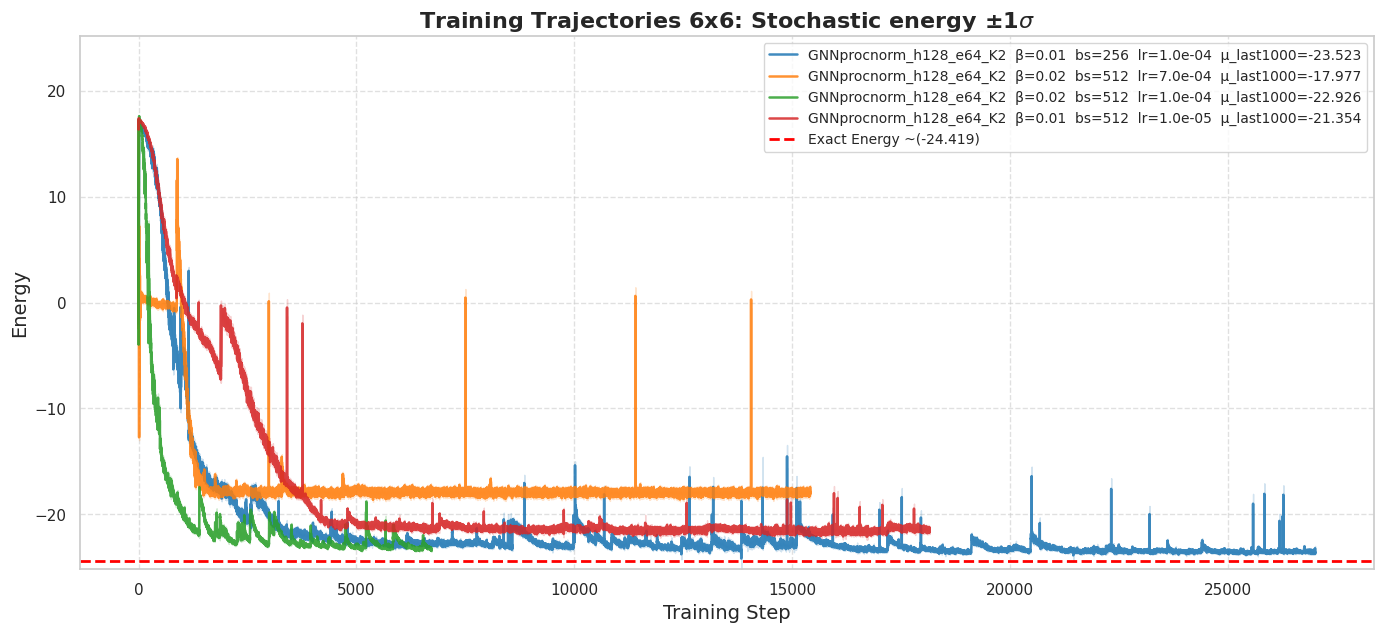

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Set seaborn style for prettier plots
sns.set_theme(style="whitegrid")

title_n=f"Training Trajectories {6}x{6}: Stochastic energy ±1" + r"$\sigma$"

plt.figure(figsize=(14, 12))

# calculate how far below exact_energy to clip
offset = 0.2 * abs(exact_energy)
ymin = exact_energy_6x6 - offset

# get a categorical palette
palette = sns.color_palette("tab10", n_colors=len(df_runs_6x6_seeded_copy_filtered_low_energy))

plt.figure(figsize=(14, 12))
ax1 = plt.subplot(2, 1, 1)

for (idx, run_data), color in zip(df_runs_6x6_seeded_copy_filtered_low_energy.iterrows(), palette):
    steps       = np.array(run_data['steps'])
    energy      = np.array(run_data['training/energy_real'])
    std_energy  = np.array(run_data['training/std_energy'])
    tail_length= 1000
    # 1. compute mean of last 300 points (or all if shorter)
    tail = energy[-tail_length:] if len(energy) >= tail_length else energy
    final_mean = tail.mean()

    # extract a simpler run name
    run_name   = run_data.get('run_name', str(idx))
    m          = re.search(r'GNN\d+adv_h\d+_e\d+_K\d+', run_name)
    simple_name= m.group(0) if m else run_name.split('/')[-1]

    # Extract batch size
    bs_match = re.search(r'__bs_(\d+)lr', run_name)
    if bs_match:
        batch_size = int(bs_match.group(1))
    else:
        batch_size = None  # fallback if not found

    # --- Build label including batch size ---
    label = f"{simple_name}  β={run_data['beta']:.2f}  bs={batch_size}  lr={run_data['lr']:.1e}  μ_last{len(tail)}={final_mean:.3f}"

    ax1.plot(steps, energy,
             label=label,
             color=color,
             linewidth=1.8,
             alpha=0.85)

    ax1.fill_between(steps,
                     energy - std_energy,
                     energy + std_energy,
                     color=color,
                     alpha=0.2)

# 3. exact energy line
ax1.axhline(y=exact_energy_6x6,
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'Exact Energy ~({exact_energy_6x6:.3f})')

# 4. clip y-axis to 20% below the ground truth
ax1.set_ylim(bottom=ymin,top=-ymin)
ax1.set_title(title_n, fontsize=16, fontweight='bold')
ax1.set_xlabel('Training Step', fontsize=14)
ax1.set_ylabel('Energy', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
import os
import glob
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
tf.get_logger().setLevel('ERROR')
models_6x6 = {}
for idx, d in enumerate(dirs_lowE):
    ckpt_paths=sorted(glob.glob(d+'/checkpoints/*.index', recursive=True))
    ckpt_idxs = sorted(glob.glob(os.path.join(d, 'checkpoints', '*.index')))
    ckpt_path = ckpt_idxs[-2][:-6]   # rimuovo '.index'
    print("→ checkpoint:", ckpt_path)
    hyperparams=extract_hyperparams_from_path(ckpt_path)
    model_temp=initialize_NQS_model_fromhyperparams(hyperparams.ansatz, hyperparams.ansatz_params,0)
    optimizer_temp=snt.optimizers.Adam(hyperparams.sim_params.learning_rate,0.9,0.99)
    # prova forward prima del caricamento
    _ = model_temp(GT_Batch_init)

    # carica pesi
    load_model_from_path(
        model=model_temp,
        checkpoint_path=ckpt_path,  # load_model cerca i file .index ecc qui
        optimizer=optimizer_temp
    )

    # verifica forward dopo
    psi_val = model_temp(GT_Batch_init)[0]
    print(f"✔ Caricato modello da {d}, psi_val[0]={psi_val}")

    # chiave unica: basename + beta + bs
    run_key = os.path.basename(d) +f"_b{hyperparams.sim_params.beta}_bs{hyperparams.sim_params.batch_size}_lr{hyperparams.sim_params.learning_rate}"+"_"+str(idx)
    models[run_key] = {
        "model": model_temp,
        "hyperparams": hyperparams
    }

print("\nModelli caricati:", list(models.keys()))

# 6x6 performance of 4x4 trained networks

In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 36.4 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [14]:
from simulation_analysis.load_from_paths import batch_extract_tf_events
import matplotlib.pyplot as plt
event_path_list =['saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.05__bs_256lr2.0e-04_loop1251x20_overlap_VMC/GNNprocnorm_h128_e64_K2',
                  'saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.007__bs_128lr2.0e-04_loop1200x15_overlap_VMC/GNN2adv_h128_e64_K3',
                  'saving_logs/system_Heisenberg/2dsquare_04_04_Alternatepattern/beta0.05__bs_256lr2.0e-04_loop1221x40_overlap_VMC/GNNprocnorm_h128_e64_K2',
                  'saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.07__bs_128lr1.0e-04_loop1200x15_overlap_VMC/GNNprocnorm_h128_e64_K2',
                  'saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.07__bs_128lr1.0e-04_loop1212x15_overlap_VMC/GNNprocnorm_h128_e64_K2']


	
df_runs=batch_extract_tf_events(event_path_list, tags=["training/energy_real","training/std_energy","training/staggered_magnetization_sqrt",
                                              "training/staggered_magnetization_S_pp","training/staggered_magnetization_absv2","configuration/hyperparameters"])


In [15]:
import re
import glob
# List of run directories containing TensorBoard events & checkpoints:
# all_checkpoints = glob.glob("checkpointed_logs/**/checkpoints", recursive=True)
run_dirs = glob.glob("saving_logs/**/GNN*", recursive=True)

filtered_dirs = [ckpt for ckpt in run_dirs if re.search(r'04_04', ckpt)]
checkpoint_dirs = [f"{path}checkpoints" for path in filtered_dirs]

In [16]:
import numpy as np
# Step 1: Decode byte strings to regular strings
df_runs['config_str'] = df_runs['configuration/hyperparameters'].apply(lambda x: x.decode() if isinstance(x, bytes) else str(x))

# Step 2: Extract seed if present
df_runs['seed'] = df_runs['config_str'].apply(
    lambda s: int(re.search(r'seed:\s*(\d+)', s).group(1)) if re.search(r'seed:\s*(\d+)', s) else np.nan
)
df_runs["final_energy"] = df_runs["training/energy_real"].apply(lambda v: v[-1] if len(v)>0 else np.nan)
df_runs["final_std"]    = df_runs["training/std_energy"].apply(lambda v: v[-1] if len(v)>0 else np.nan)
df_runs["final_stagg"]  = df_runs["training/staggered_magnetization_absv2"].apply(lambda v: v[-1] if len(v)>0 else np.nan)
min_iterations=1000
df_runs_seeded=df_runs[~df_runs['seed'].isna()]
df_runs_filtered = df_runs_seeded[df_runs_seeded['training/energy_real'].apply(len) >= min_iterations].copy()


In [ ]:
df_runs_filtered

In [65]:
ge4x4=-11.228
exact_energy =ge4x4

KeyError: 'beta'

<Figure size 1400x1200 with 0 Axes>

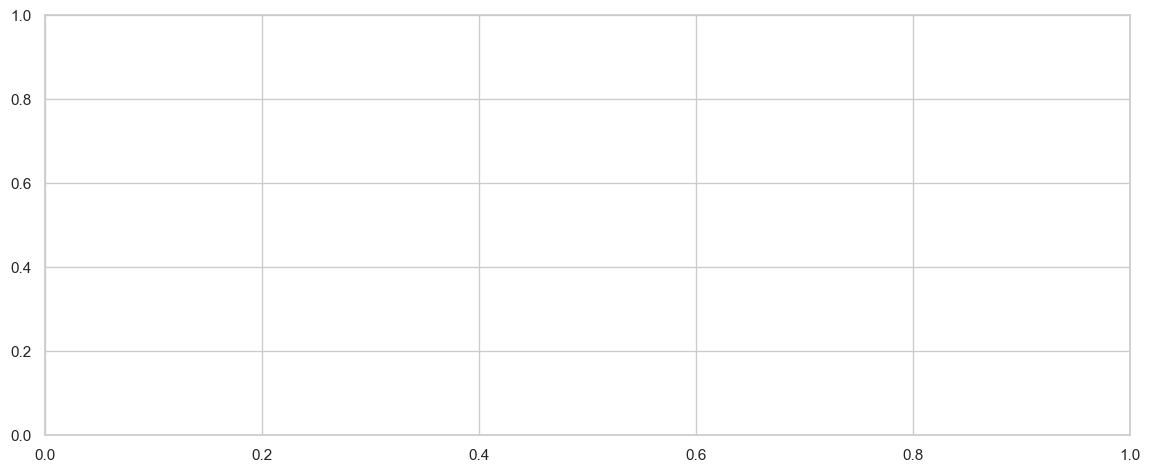

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


# Set seaborn style for prettier plots
sns.set_theme(style="whitegrid")

title_n=f"Training Trajectories {4}x{4}: Stochastic energy ±1" + r"$\sigma$"

plt.figure(figsize=(14, 12))

# calculate how far below exact_energy to clip
offset = 0.2 * abs(exact_energy)
ymin = exact_energy - offset

# get a categorical palette
palette = sns.color_palette("tab10", n_colors=len(df_runs_filtered))

plt.figure(figsize=(14, 12))
ax1 = plt.subplot(2, 1, 1)

for (idx, run_data), color in zip(df_runs_filtered.iterrows(), palette):
    steps       = np.array(run_data['steps'])
    energy      = np.array(run_data['training/energy_real'])
    std_energy  = np.array(run_data['training/std_energy'])
    tail_length= 1000
    # 1. compute mean of last 300 points (or all if shorter)
    tail = energy[-tail_length:] if len(energy) >= tail_length else energy
    final_mean = tail.mean()

    # extract a simpler run name
    run_name   = run_data.get('run_name', str(idx))
    m          = re.search(r'GNN\d+adv_h\d+_e\d+_K\d+', run_name)
    simple_name= m.group(0) if m else run_name.split('/')[-1]

    # Extract batch size
    bs_match = re.search(r'__bs_(\d+)lr', run_name)
    if bs_match:
        batch_size = int(bs_match.group(1))
    else:
        batch_size = None  # fallback if not found

    # --- Build label including batch size ---
    label = f"{simple_name}  β={run_data['beta']:.2f}  bs={batch_size}  lr={run_data['lr']:.1e}  μ_last{len(tail)}={final_mean:.3f}"

    ax1.plot(steps, energy,
             label=label,
             color=color,
             linewidth=1.8,
             alpha=0.85)

    ax1.fill_between(steps,
                     energy - std_energy,
                     energy + std_energy,
                     color=color,
                     alpha=0.2)

# 3. exact energy line
ax1.axhline(y=exact_energy,
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'Exact Energy ({exact_energy:.3f})')

# 4. clip y-axis to 20% below the ground truth
ax1.set_ylim(bottom=ymin,top=-ymin)
ax1.set_title(title_n, fontsize=16, fontweight='bold')
ax1.set_xlabel('Training Step', fontsize=14)
ax1.set_ylabel('Energy', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

In [94]:
graph,subl=create_graph_from_ham(hyperparams.graph_params.graphType,(n_hyp,m_hyp)
                                 ,sublattice=hyperparams.graph_params.sublattice)

In [ ]:
GT_batch_temp=initialize_graph_tuples_tf_opt(batch_size, graph,subl)
template_graphs_output_larger=initialize_graph_tuples_tf_opt(tf.shape(edge_pairs_larger)[0]+1, graph_larger, sublattice_encoding=subl_larger)

In [108]:
_,_, edge_pairs4x4=precompute_graph_structure(graph)


In [109]:
edge_pairs4x4

<tf.Tensor: shape=(32, 2), dtype=int32, numpy=
array([[ 0,  4],
       [ 0,  1],
       [ 0, 12],
       [ 0,  3],
       [ 1,  5],
       [ 1,  2],
       [ 1, 13],
       [ 2,  6],
       [ 2,  3],
       [ 2, 14],
       [ 3,  7],
       [ 3, 15],
       [ 4,  8],
       [ 4,  5],
       [ 4,  7],
       [ 5,  9],
       [ 5,  6],
       [ 6, 10],
       [ 6,  7],
       [ 7, 11],
       [ 8, 12],
       [ 8,  9],
       [ 8, 11],
       [ 9, 13],
       [ 9, 10],
       [10, 14],
       [10, 11],
       [11, 15],
       [12, 13],
       [12, 15],
       [13, 14],
       [14, 15]], dtype=int32)>

In [111]:
tf.shape(edge_pairs4x4)[0]

<tf.Tensor: shape=(), dtype=int32, numpy=32>

In [112]:
template_graphs_output_4x4=initialize_graph_tuples_tf_opt(tf.shape(edge_pairs4x4)[0]+1, graph, subl)
template_graphs_output_4x4

GraphsTuple(nodes=<tf.Tensor: shape=(528, 3), dtype=float32, numpy=
array([[ 1.,  0.,  1.],
       [-1.,  1.,  0.],
       [-1.,  0.,  1.],
       ...,
       [ 1.,  0.,  1.],
       [-1.,  1.,  0.],
       [ 1.,  0.,  1.]], dtype=float32)>, edges=<tf.Tensor: shape=(2112, 1), dtype=float32, numpy=
array([[0.5],
       [0.5],
       [0.5],
       ...,
       [0.5],
       [0.5],
       [0.5]], dtype=float32)>, receivers=<tf.Tensor: shape=(2112,), dtype=int32, numpy=array([  4,   0,   1, ..., 525, 527, 526], dtype=int32)>, senders=<tf.Tensor: shape=(2112,), dtype=int32, numpy=array([  0,   4,   0, ..., 526, 526, 527], dtype=int32)>, globals=<tf.Tensor: shape=(33, 1), dtype=float32, numpy=
array([[0.05],
       [0.05],
       [0.05],
       [0.05],
       [0.05],
       [0.05],
       [0.05],
       [0.05],
       [0.05],
       [0.05],
       [0.05],
       [0.05],
       [0.05],
       [0.05],
       [0.05],
       [0.05],
       [0.05],
       [0.05],
       [0.05],
       [0.05],
    

In [116]:

# 2b) Build checkerboard ε_i = ±1
eps = np.array([1 if (x+y)%2==0 else -1
                for x in range(n_hyp) for y in range(m_hyp)])  # shape (16,)
eps

array([ 1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1])

In [132]:
GT_batch_temp.nodes[:17]

<tf.Tensor: shape=(17, 3), dtype=float32, numpy=
array([[ 1.,  0.,  1.],
       [-1.,  1.,  0.],
       [ 1.,  0.,  1.],
       [-1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [-1.,  0.,  1.],
       [-1.,  1.,  0.],
       [ 1.,  0.,  1.],
       [-1.,  0.,  1.],
       [ 1.,  1.,  0.],
       [ 1.,  0.,  1.],
       [-1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [-1.,  0.,  1.],
       [-1.,  1.,  0.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.]], dtype=float32)>

In [129]:
subl

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [135]:
model(GT_batch_temp)

<tf.Tensor: shape=(128, 2), dtype=float32, numpy=
array([[ 46.48788   ,   8.633953  ],
       [ 44.350163  ,   5.4704647 ],
       [ 95.73043   ,  21.087107  ],
       [ 19.743084  ,  14.934189  ],
       [  5.5496945 ,   8.743911  ],
       [ 40.8679    ,  14.929164  ],
       [ 24.190155  ,  14.950756  ],
       [ 46.48791   ,   8.633954  ],
       [ 95.73043   ,  21.08711   ],
       [ 15.774337  ,  18.154118  ],
       [ 16.748207  ,   8.651536  ],
       [ 44.3502    ,   5.4704638 ],
       [ 24.190153  ,  14.950759  ],
       [ 15.045028  ,  14.932756  ],
       [ 17.56222   ,   5.5961976 ],
       [ 17.562199  ,   5.596197  ],
       [ 46.487926  ,   8.633953  ],
       [  8.351114  ,  11.80483   ],
       [  8.551513  ,   5.640391  ],
       [ 13.579678  ,  14.928545  ],
       [ 27.834612  ,   8.634747  ],
       [ 22.130903  ,  11.826247  ],
       [ 30.855455  ,   5.4510684 ],
       [ 95.73045   ,  21.087109  ],
       [ 14.032138  ,  11.8432255 ],
       [ 95.73048   ,  21

In [133]:
tf.reshape(GT_batch_temp.nodes[:,0], (-1,16))

<tf.Tensor: shape=(128, 16), dtype=float32, numpy=
array([[ 1., -1.,  1., ..., -1., -1.,  1.],
       [ 1.,  1., -1., ...,  1., -1.,  1.],
       [ 1., -1., -1., ..., -1.,  1., -1.],
       ...,
       [-1., -1., -1., ...,  1.,  1.,  1.],
       [ 1., -1.,  1., ...,  1., -1.,  1.],
       [-1., -1., -1., ..., -1.,  1.,  1.]], dtype=float32)>

In [162]:
GT_batch_temp=initialize_graph_tuples_tf_opt(batch_size, graph,subl)

psi=model(GT_batch_temp)
# 1) Initialize the graph
initial_energy, std_initial,_ =stochastic_energy_tf(psi, model, edge_pairs4x4, template_graphs_output_4x4,GT_batch_temp,0)
print("Initial energy:", initial_energy, 'std',std_initial)
sampler_var_temp=MCMCSampler(GT_batch_temp)
thermalization=500*n_sites4x4

for i in range(thermalization):

    GT_batch_temp, psi=sampler_var_temp.monte_carlo_update_on_batch_profilemem(model,GT_batch_temp)
energy_after_term, std_after_term,_ =stochastic_energy_tf(psi, model, edge_pairs4x4, template_graphs_output_4x4,GT_batch_temp,0)

print("Energy after:", energy_after_term, 'std',std_after_term)
all_mrms = []
all_mabs = []
all_Spp  = []
start_time=time.time()
sampling=100*n_sites4x4
energy_real=[]
energy_imag=[]
std_energies=[]

for step in range(sampling):
    for j in range(2*n_sites4x4):
        GT_batch_temp, psi_new=sampler_var_temp.monte_carlo_update_on_batch_profilemem(model,GT_batch_temp)
    spins_flat = GT_batch_temp.nodes[:,0]                  
    spins_2d    = tf.reshape(spins_flat, (batch_size, n_sites4x4))    
    energy, std_energy, loc_energies = stochastic_energy_tf(psi_new, model, edge_pairs4x4, template_graphs_output_4x4,GT_batch_temp,0)
    energy_real.append(tf.math.real(energy))
    energy_imag.append(tf.math.imag(energy))
    std_energies.append(std_energy)
    # 4) Compute staggered metrics
    m_rms, m_abs, S_pp = batch_staggered_metrics_pm1(spins_2d, eps)
    all_mrms.append(m_rms.numpy())
    all_mabs.append(m_abs.numpy())
    all_Spp.append(S_pp.numpy())
    rows.append({
        "run":      run_key,
        "step":     step,
        "m_rms":    float(m_rms.numpy()),
        "m_abs":    float(m_abs.numpy()),
        "S_pp":     float(S_pp.numpy()),
        "energy":   float(energy_real[-1]),
        "std_energy": float(std_energy.numpy()),

    })    
    print("Step:", step, "m_rms:", m_rms.numpy(), "m_abs:", m_abs.numpy(), "S_pp:", S_pp.numpy(), "energy:", energy_real[-1], "std_energy:", std_energy.numpy())
print("Tempo per campionamento:", time.time()-start_time)  

Initial energy: tf.Tensor((-4.4874682+1.3165566j), shape=(), dtype=complex64) std tf.Tensor(24.608265, shape=(), dtype=float32)
Energy after: tf.Tensor((-11.1110325+0.053093083j), shape=(), dtype=complex64) std tf.Tensor(0.5362115, shape=(), dtype=float32)
Step: 0 m_rms: 0.4056486 m_abs: 0.31835938 S_pp: 2.6328125 energy: tf.Tensor(-11.1110325, shape=(), dtype=float32) std_energy: 0.53621525
Step: 1 m_rms: 0.4056486 m_abs: 0.31835938 S_pp: 2.6328125 energy: tf.Tensor(-11.1110325, shape=(), dtype=float32) std_energy: 0.5362143
Step: 2 m_rms: 0.4056486 m_abs: 0.31835938 S_pp: 2.6328125 energy: tf.Tensor(-11.107304, shape=(), dtype=float32) std_energy: 0.53172594
Step: 3 m_rms: 0.40625 m_abs: 0.3203125 S_pp: 2.640625 energy: tf.Tensor(-11.110052, shape=(), dtype=float32) std_energy: 0.53101605
Step: 4 m_rms: 0.40625 m_abs: 0.3203125 S_pp: 2.640625 energy: tf.Tensor(-11.130306, shape=(), dtype=float32) std_energy: 0.6144445
Step: 5 m_rms: 0.4044431 m_abs: 0.31835938 S_pp: 2.6171875 energy:

In [166]:

for step in range(sampling, 2*sampling):
    for j in range(2*n_sites4x4):
        GT_batch_temp, psi_new=sampler_var_temp.monte_carlo_update_on_batch_profilemem(model,GT_batch_temp)
    spins_flat = GT_batch_temp.nodes[:,0]                  
    spins_2d    = tf.reshape(spins_flat, (batch_size, n_sites4x4))    
    energy, std_energy, loc_energies = stochastic_energy_tf(psi_new, model, edge_pairs4x4, template_graphs_output_4x4,GT_batch_temp,0)
    energy_real.append(tf.math.real(energy))
    energy_imag.append(tf.math.imag(energy))
    std_energies.append(std_energy)
    # 4) Compute staggered metrics
    m_rms, m_abs, S_pp = batch_staggered_metrics_pm1(spins_2d, eps)
    all_mrms.append(m_rms.numpy())
    all_mabs.append(m_abs.numpy())
    all_Spp.append(S_pp.numpy())
    rows.append({
        "run":      run_key,
        "step":     step,
        "m_rms":    float(m_rms.numpy()),
        "m_abs":    float(m_abs.numpy()),
        "S_pp":     float(S_pp.numpy()),
        "energy":   float(energy_real[-1]),
        "std_energy": float(std_energy.numpy()),

    })    
    print("Step:", step, "m_rms:", m_rms.numpy(), "m_abs:", m_abs.numpy(), "S_pp:", S_pp.numpy(), "energy:", energy_real[-1], "std_energy:", std_energy.numpy())
print("Tempo per campionamento:", time.time()-start_time)  

Step: 1600 m_rms: 0.50630784 m_abs: 0.42773438 S_pp: 4.1015625 energy: tf.Tensor(-11.116136, shape=(), dtype=float32) std_energy: 0.5365671
Step: 1601 m_rms: 0.50630784 m_abs: 0.42773438 S_pp: 4.1015625 energy: tf.Tensor(-11.113783, shape=(), dtype=float32) std_energy: 0.5380526
Step: 1602 m_rms: 0.50630784 m_abs: 0.42773438 S_pp: 4.1015625 energy: tf.Tensor(-11.113783, shape=(), dtype=float32) std_energy: 0.53804845
Step: 1603 m_rms: 0.5058254 m_abs: 0.42578125 S_pp: 4.09375 energy: tf.Tensor(-11.054924, shape=(), dtype=float32) std_energy: 0.882164
Step: 1604 m_rms: 0.50775236 m_abs: 0.4296875 S_pp: 4.125 energy: tf.Tensor(-11.117642, shape=(), dtype=float32) std_energy: 0.5366174
Step: 1605 m_rms: 0.50775236 m_abs: 0.4296875 S_pp: 4.125 energy: tf.Tensor(-11.117643, shape=(), dtype=float32) std_energy: 0.5366198
Step: 1606 m_rms: 0.50775236 m_abs: 0.4296875 S_pp: 4.125 energy: tf.Tensor(-11.117641, shape=(), dtype=float32) std_energy: 0.5366212
Step: 1607 m_rms: 0.50775236 m_abs: 0.

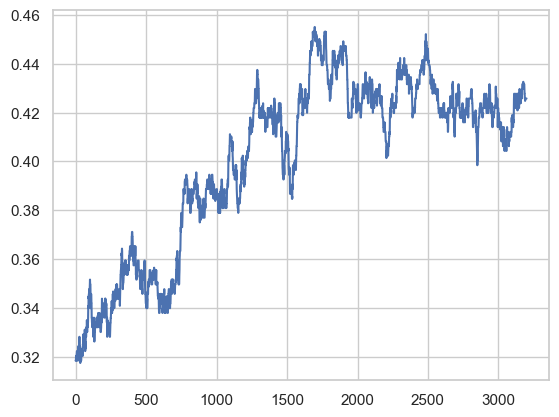

In [ ]:
plt.plot(all_mabs)

In [ ]:
# results = {}
import pandas as pd
n_sites4x4= 16
from compgraph.tensorflow_version.hamiltonian_operations import stochastic_energy_tf
batch_size = 128
rows=[]
for run_key, data in models.items():
    if run_key=='GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_0':
        print("Skipping model:", run_key)
        continue
    if run_key=='GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_0':

        continue
    if run_key=='GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_2':
        continue       
    model = data["model"]
    hyperparams = data["hyperparams"]
    
    if run_key=='GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_0':
        print("Skipping model:", run_key)
        continue
    GT_batch_temp=initialize_graph_tuples_tf_opt(batch_size, graph,subl)

    print("model", run_key)
    print(model(GT_batch_temp)[82])  # Ensure model is initialized

    psi=model(GT_batch_temp)
    # 1) Initialize the graph
    initial_energy, std_initial,_ =stochastic_energy_tf(psi, model, edge_pairs4x4, template_graphs_output_4x4,GT_batch_temp,0)
    print("Initial energy:", initial_energy, 'std',std_initial)
    sampler_var_temp=MCMCSampler(GT_batch_temp)
    thermalization=500*n_sites4x4

    for i in range(thermalization):

        GT_batch_temp, psi=sampler_var_temp.monte_carlo_update_on_batch_profilemem(model,GT_batch_temp)
    energy_after_term, std_after_term,_ =stochastic_energy_tf(psi, model, edge_pairs4x4, template_graphs_output_4x4,GT_batch_temp,0)

    print("Energy after:", energy_after_term, 'std',std_after_term)
    all_mrms = []
    all_mabs = []
    all_Spp  = []
    start_time=time.time()
    sampling=100*n_sites4x4
    energy_real=[]
    energy_imag=[]
    std_energies=[]

    for step in range(sampling):
        for j in range(n_sites4x4):
            GT_batch_temp, psi_new=sampler_var_temp.monte_carlo_update_on_batch_profilemem(model,GT_batch_temp)
        spins_flat = GT_batch_temp.nodes[:,0]                  
        spins_2d    = tf.reshape(spins_flat, (batch_size, n_sites4x4))    
        energy, std_energy, loc_energies = stochastic_energy_tf(psi_new, model, edge_pairs4x4, template_graphs_output_4x4,GT_batch_temp,0)
        energy_real.append(tf.math.real(energy))
        energy_imag.append(tf.math.imag(energy))
        std_energies.append(std_energy)
        # 4) Compute staggered metrics
        m_rms, m_abs, S_pp = batch_staggered_metrics_pm1(spins_2d, eps)
        all_mrms.append(m_rms.numpy())
        all_mabs.append(m_abs.numpy())
        all_Spp.append(S_pp.numpy())
        rows.append({
            "run":      run_key,
            "step":     step,
            "m_rms":    float(m_rms.numpy()),
            "m_abs":    float(m_abs.numpy()),
            "S_pp":     float(S_pp.numpy()),
            "energy":   float(energy_real[-1]),
            "std_energy": float(std_energy.numpy()),

        })    
        print("Step:", step, "m_rms:", m_rms.numpy(), "m_abs:", m_abs.numpy(), "S_pp:", S_pp.numpy(), "energy:", energy_real[-1], "std_energy:", std_energy.numpy())
    print("Tempo per campionamento:", time.time()-start_time)    
# Costruisco il DataFrame unico
df_traj4x4 = pd.DataFrame(rows)
print(df_traj4x4.head())        

Skipping model: GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_0
model GNN2adv_h128_e64_K3_b0.007_bs128_lr0.0002_1
tf.Tensor([ 4.182271 10.561241], shape=(2,), dtype=float32)
Initial energy: tf.Tensor((-9.479954-0.05340617j), shape=(), dtype=complex64) std tf.Tensor(4.9660044, shape=(), dtype=float32)
Energy after: tf.Tensor((-11.0300255+0.001634025j), shape=(), dtype=complex64) std tf.Tensor(0.6958919, shape=(), dtype=float32)
Step: 0 m_rms: 0.5488802 m_abs: 0.45898438 S_pp: 4.8203125 energy: tf.Tensor(-10.889645, shape=(), dtype=float32) std_energy: 0.6907331
Step: 1 m_rms: 0.5865101 m_abs: 0.49804688 S_pp: 5.5039062 energy: tf.Tensor(-10.876395, shape=(), dtype=float32) std_energy: 0.6480212
Step: 2 m_rms: 0.5648821 m_abs: 0.4765625 S_pp: 5.1054688 energy: tf.Tensor(-10.822291, shape=(), dtype=float32) std_energy: 0.568153
Step: 3 m_rms: 0.5529793 m_abs: 0.44433594 S_pp: 4.892578 energy: tf.Tensor(-10.810825, shape=(), dtype=float32) std_energy: 0.5542187
Step: 4 m_rms: 0.5335429 m_ab

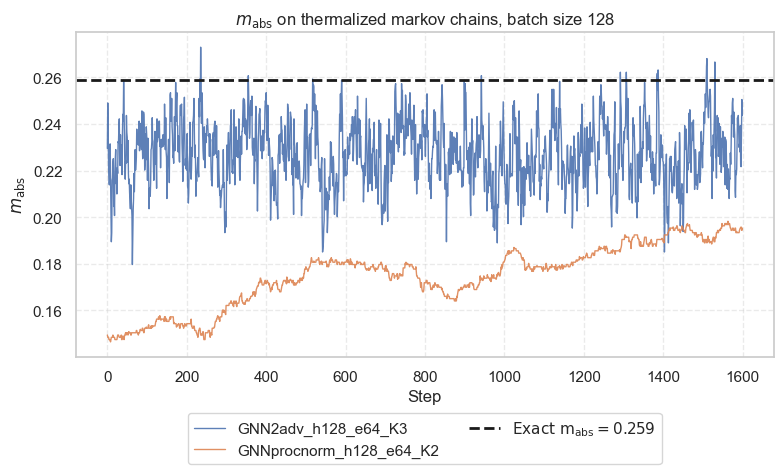

GNN2adv_h128_e64_K3_b0.007_bs128_lr0.0002_1
GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_3


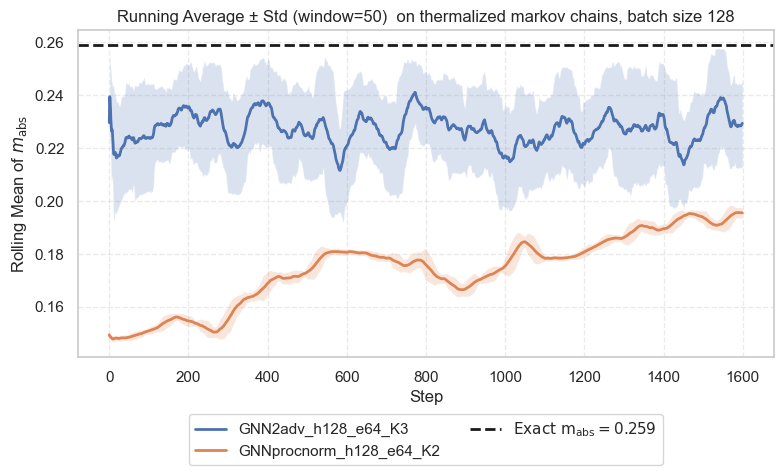

In [134]:
df_traj4x4
import pandas as pd
import matplotlib.pyplot as plt
# exact_energy_6x6 = -0.6783*36 
m_abs4x4=0.5173775227073758/2
def abbrevia(key):
    m = re.match(r'^(.*?K.).*(.)$', key)
    if m:
        return f"{m.group(1)}"
    else:
        return key[:10] + "…" + key[-1]
# 2) Plot raw trajectories con legenda esterna
# 4. Plot delle traiettorie
fig, ax = plt.subplots(figsize=(8, 5))
for run_key, df_run in df_traj4x4.groupby('run'):
    if run_key=='GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_0':

        continue
    if run_key=='GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_2':
        continue    
    ax.plot(df_run['step'], df_run['m_abs']/2,
             alpha=0.9, linewidth=1, label=abbrevia(run_key))
    # 5. Linea orizzontale Quimb
ax.axhline(m_abs4x4, color='k', linestyle='--', linewidth=2,
           label=fr"$\mathrm{{Exact\ m_{{abs}}}} = {m_abs4x4:.3f}$")
ax.set_xlabel('Step')
ax.set_ylabel(r'$m_\mathrm{abs}$')
ax.set_title('$m_{\\rm abs}$ on thermalized markov chains, batch size 128')
ax.grid(True, linestyle='--', alpha=0.4)
# Legenda sotto, 2 colonne (regola ncol in base al num. di run)
ax.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=2,
           frameon=True)

fig.tight_layout()
plt.show()

# # 7. Plot rolling mean ± std (facoltativo)
window = 50
fig, ax = plt.subplots(figsize=(8, 5))
for run_key, df_run in df_traj4x4.groupby('run'):
    print(run_key)
    if run_key=='GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_0':

        continue
    if run_key=='GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_2':
        continue
    rm = df_run['m_abs'].rolling(window, min_periods=1).mean()/2
    rs = df_run['m_abs'].rolling(window, min_periods=1).std()/np.sqrt(2)

    ax.plot(df_run['step'], rm, linewidth=2, label=abbrevia(run_key))
    ax.fill_between(df_run['step'], rm - rs, rm + rs, alpha=0.2)

ax.axhline(m_abs4x4, color='k', linestyle='--', linewidth=2,
           label=fr"$\mathrm{{Exact\ m_{{abs}}}} = {m_abs4x4:.3f}$")

ax.set_xlabel('Step')
ax.set_ylabel(r'Rolling Mean of $m_\mathrm{abs}$')
ax.set_title(f'Running Average ± Std (window={window})  on thermalized markov chains, batch size 128')
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(loc='upper center',
          bbox_to_anchor=(0.5, -0.15),
          ncol=2,
          frameon=True)
fig.tight_layout()
plt.show()

In [170]:
df_traj4x4v2 = pd.DataFrame(rows).drop_duplicates(subset=['run', 'step'], keep='last')
print(df_traj4x4v2.head()) 

                                           run  step     m_rms     m_abs  \
0  GNN2adv_h128_e64_K3_b0.007_bs128_lr0.0002_1     0  0.548880  0.458984   
1  GNN2adv_h128_e64_K3_b0.007_bs128_lr0.0002_1     1  0.586510  0.498047   
2  GNN2adv_h128_e64_K3_b0.007_bs128_lr0.0002_1     2  0.564882  0.476562   
3  GNN2adv_h128_e64_K3_b0.007_bs128_lr0.0002_1     3  0.552979  0.444336   
4  GNN2adv_h128_e64_K3_b0.007_bs128_lr0.0002_1     4  0.533543  0.429688   

       S_pp     energy  std_energy  
0  4.820312 -10.889645    0.690733  
1  5.503906 -10.876395    0.648021  
2  5.105469 -10.822291    0.568153  
3  4.892578 -10.810825    0.554219  
4  4.554688 -10.814137    0.691413  


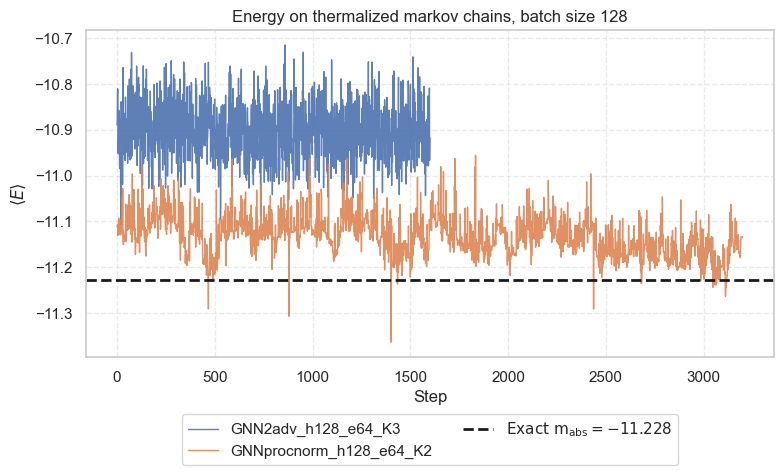

In [175]:
fig, ax = plt.subplots(figsize=(8, 5))
for run_key, df_run in df_traj4x4v2.groupby('run'):
    if run_key=='GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_0':

        continue
    if run_key=='GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_2':
        continue    
    ax.plot(df_run['step'], df_run['energy'],
             alpha=0.9, linewidth=1, label=abbrevia(run_key))
    # 5. Linea orizzontale Quimb
ax.axhline(-11.228, color='k', linestyle='--', linewidth=2,
           label=fr"$\mathrm{{Exact\ m_{{abs}}}} = {-11.228:.3f}$")
ax.set_xlabel('Step')
ax.set_ylabel(r'$\langle E \rangle$')
ax.set_title('Energy on thermalized markov chains, batch size 128')
ax.grid(True, linestyle='--', alpha=0.4)
# Legenda sotto, 2 colonne (regola ncol in base al num. di run)
ax.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=2,
           frameon=True)

fig.tight_layout()
plt.show()

loooong 3200 1600


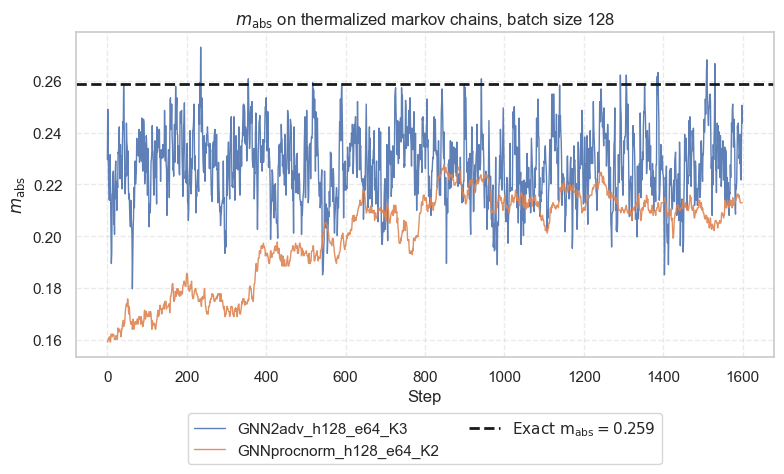

GNN2adv_h128_e64_K3_b0.007_bs128_lr0.0002_1
GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_3
loooong 3200 1600


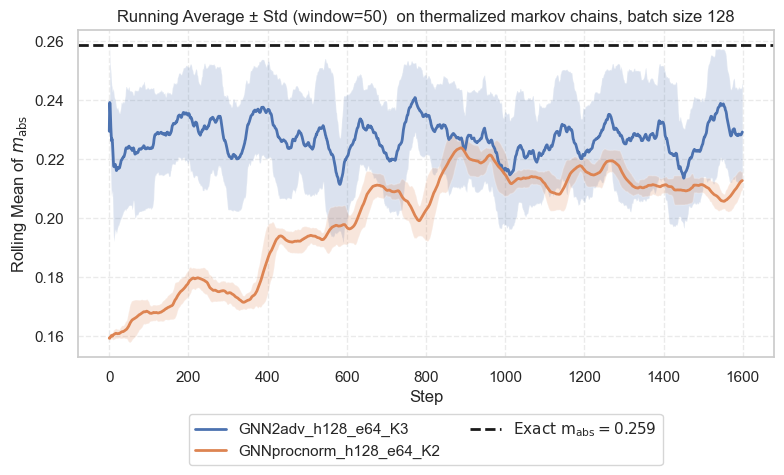

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
# exact_energy_6x6 = -0.6783*36 
m_abs4x4=0.5173775227073758/2
def abbrevia(key):
    m = re.match(r'^(.*?K.).*(.)$', key)
    if m:
        return f"{m.group(1)}"
    else:
        return key[:10] + "…" + key[-1]
# 2) Plot raw trajectories con legenda esterna
# 4. Plot delle traiettorie
fig, ax = plt.subplots(figsize=(8, 5))
for run_key, df_run in df_traj4x4v2.groupby('run'):
    if run_key=='GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_0':

        continue
    if run_key=='GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_2':
        continue    
    if len(df_run['m_abs']) > 2000:
        print('loooong',len(df_run['m_abs']), len(df_run['m_abs'][::2]))
        ax.plot(df_run['step'][::2]/2, df_run['m_abs'][::2]/2,
                alpha=0.9, linewidth=1, label=abbrevia(run_key))   
    else:     
        ax.plot(df_run['step'], df_run['m_abs']/2,
                alpha=0.9, linewidth=1, label=abbrevia(run_key))
    # 5. Linea orizzontale Quimb
ax.axhline(m_abs4x4, color='k', linestyle='--', linewidth=2,
           label=fr"$\mathrm{{Exact\ m_{{abs}}}} = {m_abs4x4:.3f}$")
ax.set_xlabel('Step')
ax.set_ylabel(r'$m_\mathrm{abs}$')
ax.set_title('$m_{\\rm abs}$ on thermalized markov chains, batch size 128')
ax.grid(True, linestyle='--', alpha=0.4)
# Legenda sotto, 2 colonne (regola ncol in base al num. di run)
ax.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=2,
           frameon=True)

fig.tight_layout()
plt.show()

# # 7. Plot rolling mean ± std (facoltativo)
window = 50
fig, ax = plt.subplots(figsize=(8, 5))
for run_key, df_run in df_traj4x4v2.groupby('run'):
    print(run_key)
    if run_key=='GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_0':

        continue
    if run_key=='GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_2':
        continue
    if len(df_run['m_abs']) > 2000:
        print('loooong',len(df_run['m_abs']), len(df_run['m_abs'][::2]))
        rm = df_run['m_abs'][::2].rolling(window, min_periods=1).mean()/2
        rs = df_run['m_abs'][::2].rolling(window, min_periods=1).std()/np.sqrt(2)

        ax.plot(df_run['step'][::2]/2, rm, linewidth=2, label=abbrevia(run_key))
        ax.fill_between(df_run['step'][::2]/2, rm - rs, rm + rs, alpha=0.2)        
    else:          
        rm = df_run['m_abs'].rolling(window, min_periods=1).mean()/2
        rs = df_run['m_abs'].rolling(window, min_periods=1).std()/np.sqrt(2)

        ax.plot(df_run['step'], rm, linewidth=2, label=abbrevia(run_key))
        ax.fill_between(df_run['step'], rm - rs, rm + rs, alpha=0.2)

ax.axhline(m_abs4x4, color='k', linestyle='--', linewidth=2,
           label=fr"$\mathrm{{Exact\ m_{{abs}}}} = {m_abs4x4:.3f}$")

ax.set_xlabel('Step')
ax.set_ylabel(r'Rolling Mean of $m_\mathrm{abs}$')
ax.set_title(f'Running Average ± Std (window={window})  on thermalized markov chains, batch size 128')
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(loc='upper center',
          bbox_to_anchor=(0.5, -0.15),
          ncol=2,
          frameon=True)
fig.tight_layout()
plt.show()

In [ ]:
df_traj4x4
import pandas as pd
import matplotlib.pyplot as plt
# exact_energy_6x6 = -0.6783*36 
m_abs4x4=0.5173775227073758/2
def abbrevia(key):
    m = re.match(r'^(.*?K.).*(.)$', key)
    if m:
        return f"{m.group(1)}"
    else:
        return key[:10] + "…" + key[-1]
# 2) Plot raw trajectories con legenda esterna
# 4. Plot delle traiettorie
fig, ax = plt.subplots(figsize=(8, 5))
for run_key, df_run in df_traj4x4.groupby('run'):
    if run_key=='GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_0':

        continue
    if run_key=='GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_2':
        continue    
    ax.plot(df_run['step'], df_run['m_abs']/2,
             alpha=0.9, linewidth=1, label=abbrevia(run_key))
    # 5. Linea orizzontale Quimb
ax.axhline(m_abs4x4, color='k', linestyle='--', linewidth=2,
           label=fr"$\mathrm{{Exact\ m_{{abs}}}} = {m_abs4x4:.3f}$")
ax.set_xlabel('Step')
ax.set_ylabel(r'$m_\mathrm{abs}$')
ax.set_title('$m_{\\rm abs}$ on thermalized markov chains, batch size 128')
ax.grid(True, linestyle='--', alpha=0.4)
# Legenda sotto, 2 colonne (regola ncol in base al num. di run)
ax.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=2,
           frameon=True)

fig.tight_layout()
plt.show()

# # 7. Plot rolling mean ± std (facoltativo)
window = 50
fig, ax = plt.subplots(figsize=(8, 5))
for run_key, df_run in df_traj4x4.groupby('run'):
    print(run_key)
    if run_key=='GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_0':

        continue
    if run_key=='GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_2':
        continue
    rm = df_run['m_abs'].rolling(window, min_periods=1).mean()/2
    rs = df_run['m_abs'].rolling(window, min_periods=1).std()/np.sqrt(2)

    ax.plot(df_run['step'], rm, linewidth=2, label=abbrevia(run_key))
    ax.fill_between(df_run['step'], rm - rs, rm + rs, alpha=0.2)

ax.axhline(m_abs4x4, color='k', linestyle='--', linewidth=2,
           label=fr"$\mathrm{{Exact\ m_{{abs}}}} = {m_abs4x4:.3f}$")

ax.set_xlabel('Step')
ax.set_ylabel(r'Rolling Mean of $m_\mathrm{abs}$')
ax.set_title(f'Running Average ± Std (window={window})  on thermalized markov chains, batch size 128')
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(loc='upper center',
          bbox_to_anchor=(0.5, -0.15),
          ncol=2,
          frameon=True)
fig.tight_layout()
plt.show()

In [17]:
dirs_lowE = [
    d for d in filtered_dirs
    if any(run in d for run in df_runs_filtered['run_name'].unique().tolist())
]

In [18]:
dirs_lowE

['saving_logs/system_Heisenberg/2dsquare_04_04_Alternatepattern/beta0.05__bs_256lr2.0e-04_loop1221x40_overlap_VMC/GNNprocnorm_h128_e64_K2',
 'saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.007__bs_128lr2.0e-04_loop1200x15_overlap_VMC/GNN2adv_h128_e64_K3',
 'saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.07__bs_128lr1.0e-04_loop1200x15_overlap_VMC/GNNprocnorm_h128_e64_K2',
 'saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.07__bs_128lr1.0e-04_loop1212x15_overlap_VMC/GNNprocnorm_h128_e64_K2']

In [19]:
dirs_lowE[0]

'saving_logs/system_Heisenberg/2dsquare_04_04_Alternatepattern/beta0.05__bs_256lr2.0e-04_loop1221x40_overlap_VMC/GNNprocnorm_h128_e64_K2'

In [20]:
import tensorflow as tf
import compgraph.tensorflow_version.model_loading
from compgraph.tensorflow_version.model_loading import check_and_reinitialize_model, load_model_from_path,extract_hyperparams_from_path
from simulation.initializer import create_graph_from_ham, initialize_NQS_model_fromhyperparams, initialize_hamiltonian_and_groundstate
from compgraph.tensorflow_version.graph_tuple_manipulation import initialize_graph_tuples_tf_opt, precompute_graph_structure
import sonnet as snt
hyperparams=extract_hyperparams_from_path(dirs_lowE[1])
n_hyp,m_hyp=hyperparams.graph_params.n,hyperparams.graph_params.m
graph_larger,subl_larger=create_graph_from_ham(hyperparams.graph_params.graphType,(n_hyp+2,m_hyp+2)
                                 ,sublattice=hyperparams.graph_params.sublattice)
GT_Batch_init=initialize_graph_tuples_tf_opt(128, graph_larger, sublattice_encoding=subl_larger)

2025-05-01 14:53:53.618116: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-01 14:53:53.906740: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-01 14:53:53.907148: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-01 14:53:53.912572: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-01 14:53:53.913067: I external/local_xla/xla/stream_executor

In [21]:
tf.reshape(subl_larger[:,0],( 1,6,6))

<tf.Tensor: shape=(1, 6, 6), dtype=float32, numpy=
array([[[0., 1., 0., 1., 0., 1.],
        [1., 0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0., 1.],
        [1., 0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0., 1.],
        [1., 0., 1., 0., 1., 0.]]], dtype=float32)>

In [27]:
import os
import glob
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
tf.get_logger().setLevel('ERROR')
models = {}
for idx, d in enumerate(dirs_lowE):
    ckpt_paths=sorted(glob.glob(d+'/checkpoints/*.index', recursive=True))
    ckpt_idxs = sorted(glob.glob(os.path.join(d, 'checkpoints', '*.index')))
    ckpt_path = ckpt_idxs[-2][:-6]   # rimuovo '.index'
    print("→ checkpoint:", ckpt_path)
    hyperparams=extract_hyperparams_from_path(ckpt_path)
    model_temp=initialize_NQS_model_fromhyperparams(hyperparams.ansatz, hyperparams.ansatz_params,0)
    optimizer_temp=snt.optimizers.Adam(hyperparams.sim_params.learning_rate,0.9,0.99)
    # prova forward prima del caricamento
    _ = model_temp(GT_Batch_init)

    # carica pesi
    load_model_from_path(
        model=model_temp,
        checkpoint_path=ckpt_path,  # load_model cerca i file .index ecc qui
        optimizer=optimizer_temp
    )

    # verifica forward dopo
    psi_val = model_temp(GT_Batch_init)[0]
    print(f"✔ Caricato modello da {d}, psi_val[0]={psi_val}")

    # chiave unica: basename + beta + bs
    run_key = os.path.basename(d) +f"_b{hyperparams.sim_params.beta}_bs{hyperparams.sim_params.batch_size}_lr{hyperparams.sim_params.learning_rate}"+"_"+str(idx)
    models[run_key] = {
        "model": model_temp,
        "hyperparams": hyperparams
    }

print("\nModelli caricati:", list(models.keys()))

→ checkpoint: saving_logs/system_Heisenberg/2dsquare_04_04_Alternatepattern/beta0.05__bs_256lr2.0e-04_loop1221x40_overlap_VMC/GNNprocnorm_h128_e64_K2/checkpoints/ckpt-6


I0000 00:00:1746104478.656683   21882 service.cc:145] XLA service 0x22631590 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746104478.656879   21882 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-05-01 15:01:20.921413: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-01 15:01:21.412819: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1746104483.543852   21882 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


✔ Caricato modello da saving_logs/system_Heisenberg/2dsquare_04_04_Alternatepattern/beta0.05__bs_256lr2.0e-04_loop1221x40_overlap_VMC/GNNprocnorm_h128_e64_K2, psi_val[0]=[-0.05332625 17.907469  ]
→ checkpoint: saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.007__bs_128lr2.0e-04_loop1200x15_overlap_VMC/GNN2adv_h128_e64_K3/checkpoints/ckpt-39
✔ Caricato modello da saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.007__bs_128lr2.0e-04_loop1200x15_overlap_VMC/GNN2adv_h128_e64_K3, psi_val[0]=[16.049734 20.794844]
→ checkpoint: saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.07__bs_128lr1.0e-04_loop1200x15_overlap_VMC/GNNprocnorm_h128_e64_K2/checkpoints/ckpt-39
✔ Caricato modello da saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.07__bs_128lr1.0e-04_loop1200x15_overlap_VMC/GNNprocnorm_h128_e64_K2, psi_val[0]=[ 8.961973 22.994932]
→ checkpoint: saving_logs/system_Heisenberg/2dsquare_04_04_Neel/beta0.07__bs_128lr1.0e-04_loop1212x15_overlap_VMC/GNNprocnorm_h128_e64

In [34]:
print("\nModelli caricati:", list(models.keys()))


Modelli caricati: ['GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_0', 'GNN2adv_h128_e64_K3_b0.007_bs128_lr0.0002_1', 'GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_2', 'GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_3']


In [29]:

# 2b) Build checkerboard ε_i = ±1
eps_larger = np.array([1 if (x+y)%2==0 else -1
                for x in range(n_hyp+2) for y in range(m_hyp+2)])  # shape (16,)
eps_larger

array([ 1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,
       -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1,
       -1,  1])

In [30]:
from compgraph.monte_carlo import MCMCSampler
import time

sen, rec, edge_pairs=precompute_graph_structure(graph_larger)
GT_Batch_update=initialize_graph_tuples_tf_opt(128,graph_larger, sublattice_encoding=subl_larger)
template_graphs_output=initialize_graph_tuples_tf_opt(tf.shape(edge_pairs)[0]+1, graph_larger, sublattice_encoding=subl_larger)


In [31]:
def batch_staggered_metrics_pm1(spins_pm1, eps_pm1):
    """
    spins_pm1:  (B, N) tf.float32, values ±1
    eps_pm1:    (N,)   tf.float32, values ±1
    Returns dict with m_rms, m_abs, S_pp
    """
    spins = tf.convert_to_tensor(spins_pm1, tf.float32)     # (B,N)
    eps   = tf.convert_to_tensor(eps_pm1,   tf.float32)     # (N,)

    N     = tf.cast(tf.shape(spins)[1], tf.float32)         # 16 for 4×4
    Ms    = tf.reduce_sum(spins * eps[None,:], axis=1)      # (B,)

    Ms2   = tf.reduce_mean(tf.square(Ms))                   # ⟨Ms²⟩_batch
    m_rms = tf.sqrt(Ms2) / N
    m_abs = tf.reduce_mean(tf.abs(Ms)) / N
    S_pp  = Ms2 / N

    return m_rms, m_abs, S_pp


In [32]:
# results = {}
import pandas as pd
n_sites6x6= 36
from compgraph.tensorflow_version.hamiltonian_operations import stochastic_energy_tf
batch_size = 128
rows=[]
for run_key, data in models.items():
    model = data["model"]
    hyperparams = data["hyperparams"]
    
    if run_key=='GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_0':
        print("Skipping model:", run_key)
        continue
    GT_batch_temp=initialize_graph_tuples_tf_opt(batch_size, graph_larger, sublattice_encoding=subl_larger)

    print("model", run_key)
    print(model(GT_batch_temp)[82])  # Ensure model is initialized

    psi=model(GT_batch_temp)
    # 1) Initialize the graph
    initial_energy, std_initial,_ =stochastic_energy_tf(psi, model, edge_pairs, template_graphs_output,GT_Batch_update,0)
    print("Initial energy:", initial_energy, 'std',std_initial)
    sampler_var_temp=MCMCSampler(GT_batch_temp)
    thermalization=200*n_sites6x6

    for i in range(thermalization):

        GT_batch_temp, psi=sampler_var_temp.monte_carlo_update_on_batch_profilemem(model,GT_batch_temp)
    energy_after_term, std_after_term,_ =stochastic_energy_tf(psi, model, edge_pairs, template_graphs_output,GT_batch_temp,0)

    print("Energy after:", energy_after_term, 'std',std_after_term)
    all_mrms = []
    all_mabs = []
    all_Spp  = []
    start_time=time.time()
    sampling=100*n_sites6x6

    for step in range(sampling):
        for j in range(n_sites6x6):
            GT_batch_temp, psi_new=sampler_var_temp.monte_carlo_update_on_batch_profilemem(model,GT_batch_temp)
        spins_flat = GT_batch_temp.nodes[:,0]                  
        spins_2d    = tf.reshape(spins_flat, (batch_size, n_sites6x6))    

        # 4) Compute staggered metrics
        m_rms, m_abs, S_pp = batch_staggered_metrics_pm1(spins_2d, eps_larger)
        all_mrms.append(m_rms.numpy())
        all_mabs.append(m_abs.numpy())
        all_Spp.append(S_pp.numpy())
        rows.append({
            "run":      run_key,
            "step":     step,
            "m_rms":    float(m_rms.numpy()),
            "m_abs":    float(m_abs.numpy()),
            "S_pp":     float(S_pp.numpy())
        })        
    print("Tempo per campionamento:", time.time()-start_time)    
# Costruisco il DataFrame unico
df_traj = pd.DataFrame(rows)
print(df_traj.head())        

Skipping model: GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_0
model GNN2adv_h128_e64_K3_b0.007_bs128_lr0.0002_1
tf.Tensor([18.267075 32.461956], shape=(2,), dtype=float32)
Tensor("strided_slice_5:0", shape=(2628, 2), dtype=float32)
Initial energy: tf.Tensor((-467.8151-505.42667j), shape=(), dtype=complex64) std tf.Tensor(7646.6377, shape=(), dtype=float32)


W0000 00:00:1746104518.494010   21882 random_ops.cc:105] Warning: Using tf.random.uniform with XLA compilation will ignore seeds; consider using tf.random.stateless_uniform instead if reproducible behavior is desired. random_uniform


Energy after: tf.Tensor((-20.396973-0.104334794j), shape=(), dtype=complex64) std tf.Tensor(3.26179, shape=(), dtype=float32)
Tempo per campionamento: 5807.541970252991
model GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_2
tf.Tensor([12.792393 23.129581], shape=(2,), dtype=float32)
Initial energy: tf.Tensor((-85.05402+43.380013j), shape=(), dtype=complex64) std tf.Tensor(1333.4297, shape=(), dtype=float32)
Energy after: tf.Tensor((-20.713863-0.009001527j), shape=(), dtype=complex64) std tf.Tensor(3.5585277, shape=(), dtype=float32)
Tempo per campionamento: 2609.7728378772736
model GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_3
tf.Tensor([20.08507 34.48287], shape=(2,), dtype=float32)
Initial energy: tf.Tensor((-9.527574+36.57427j), shape=(), dtype=complex64) std tf.Tensor(401.09576, shape=(), dtype=float32)
Energy after: tf.Tensor((-21.983139+0.34371707j), shape=(), dtype=complex64) std tf.Tensor(3.2370932, shape=(), dtype=float32)
Tempo per campionamento: 3005.1529858112335
           

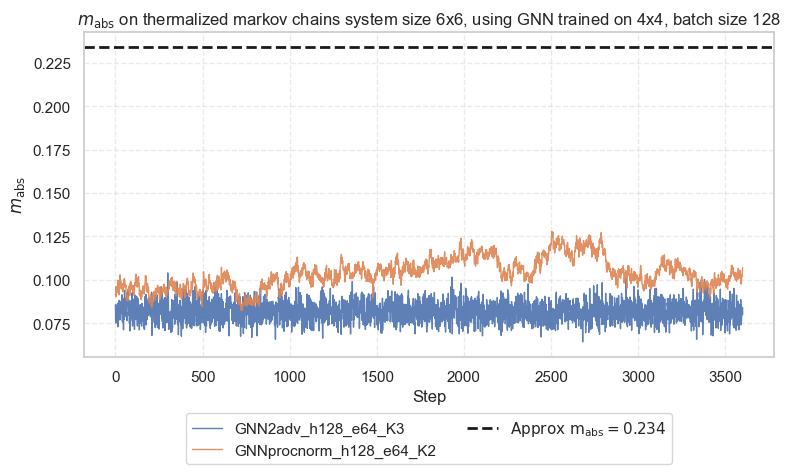

GNN2adv_h128_e64_K3_b0.007_bs128_lr0.0002_1
GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_2
GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_3


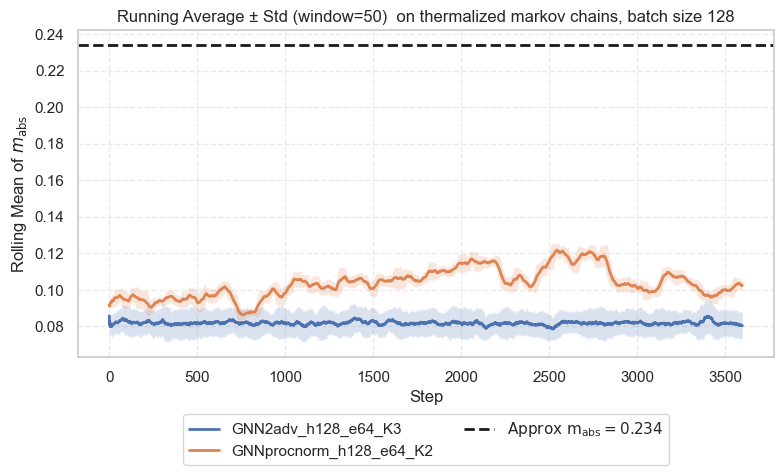

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
exact_energy_6x6 = -0.6783*36 
m_abs6x6=0.234
def abbrevia(key):
    m = re.match(r'^(.*?K.).*(.)$', key)
    if m:
        return f"{m.group(1)}"
    else:
        return key[:10] + "…" + key[-1]
# 2) Plot raw trajectories con legenda esterna
# 4. Plot delle traiettorie
fig, ax = plt.subplots(figsize=(8, 5))
for run_key, df_run in df_traj.groupby('run'):
    if run_key=='GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_0':

        continue
    if run_key=='GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_2':
        continue    
    ax.plot(df_run['step'], df_run['m_abs']/2,
             alpha=0.9, linewidth=1, label=abbrevia(run_key))
    # 5. Linea orizzontale Quimb
ax.axhline(m_abs6x6, color='k', linestyle='--', linewidth=2,
           label=fr"$\mathrm{{Approx\ m_{{abs}}}} = {m_abs6x6:.3f}$")
ax.set_xlabel('Step')
ax.set_ylabel(r'$m_\mathrm{abs}$')
ax.set_title('$m_{\\rm abs}$ on thermalized markov chains system size 6x6, using GNN trained on 4x4, batch size 128')
ax.grid(True, linestyle='--', alpha=0.4)
# Legenda sotto, 2 colonne (regola ncol in base al num. di run)
ax.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=2,
           frameon=True)

fig.tight_layout()
plt.show()

# # 7. Plot rolling mean ± std (facoltativo)
window = 50
fig, ax = plt.subplots(figsize=(8, 5))
for run_key, df_run in df_traj.groupby('run'):
    print(run_key)
    if run_key=='GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_0':

        continue
    if run_key=='GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_2':
        continue
    rm = df_run['m_abs'].rolling(window, min_periods=1).mean()/2
    rs = df_run['m_abs'].rolling(window, min_periods=1).std()/np.sqrt(2)

    ax.plot(df_run['step'], rm, linewidth=2, label=abbrevia(run_key))
    ax.fill_between(df_run['step'], rm - rs, rm + rs, alpha=0.2)

ax.axhline(m_abs6x6, color='k', linestyle='--', linewidth=2,
           label=fr"$\mathrm{{Approx\ m_{{abs}}}} = {m_abs6x6:.3f}$")

ax.set_xlabel('Step')
ax.set_ylabel(r'Rolling Mean of $m_\mathrm{abs}$')
ax.set_title(f'Running Average ± Std (window={window})  on thermalized markov chains, batch size 128')
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(loc='upper center',
          bbox_to_anchor=(0.5, -0.15),
          ncol=2,
          frameon=True)
fig.tight_layout()
plt.show()

In [41]:
# results = {}
from compgraph.tensorflow_version.hamiltonian_operations import stochastic_energy_tf
batch_size = 128
rows_energy=[]
for run_key, data in models.items():
    model = data["model"]
    hyperparams = data["hyperparams"]

    if run_key=='GNN2adv_h128_e64_K3_b0.007_bs128_lr0.0007_5':
        print("Skipping model:", run_key)
        continue

    if run_key=='GNN2adv_h128_e64_K3_b0.007_bs128_lr0.0007_1':
        print("Skipping model:", run_key)
        continue

    if run_key=='GNNprocnorm_h128_e64_K2_b0.07_bs256_lr0.0001_0':
        print("Skipping model:", run_key)
        continue        
    
    
    GT_batch_temp=initialize_graph_tuples_tf_opt(batch_size, graph_larger, sublattice_encoding=subl_larger)

    print("model", run_key)
    print(model(GT_batch_temp)[82])  # Ensure model is initialized

    psi=model(GT_batch_temp)
    # 1) Initialize the graph
    initial_energy, std_initial,_ =stochastic_energy_tf(psi, model, edge_pairs, template_graphs_output,GT_Batch_update,0)
    print("Initial energy:", initial_energy, 'std',std_initial)
    sampler_var_temp=MCMCSampler(GT_batch_temp)
    thermalization=500*n_sites6x6

    for i in range(thermalization):

        GT_batch_temp, psi=sampler_var_temp.monte_carlo_update_on_batch_profilemem(model,GT_batch_temp)
    energy_after_term, std_after_term,_ =stochastic_energy_tf(psi, model, edge_pairs, template_graphs_output,GT_batch_temp,0)

    print("Energy after:", energy_after_term, 'std',std_after_term)
    en_std = []
    en_real = []
    en_imag  = []
    start_time=time.time()
    sampling=300

    for step in range(sampling):
        for j in range(n_sites6x6):
            GT_batch_temp, psi_new=sampler_var_temp.monte_carlo_update_on_batch_profilemem(model,GT_batch_temp)

        energy, std_energy,_ =stochastic_energy_tf(psi_new, model, edge_pairs, template_graphs_output,GT_batch_temp,0)
        print(energy)
        # 4) Compute staggered metrics
        # m_rms, m_abs, S_pp = batch_staggered_metrics_pm1(spins_2d, eps_larger)
        en_std.append(tf.math.real(std_energy))
        en_real.append(tf.math.real(energy))
        en_imag.append(tf.math.imag(energy))
        rows_energy.append({
            "run":      run_key,
            "step":     step,
            "en_std":    float(tf.math.real(std_energy)),
            "en_real":    float(tf.math.real(energy)),
            "en_imag":     float(tf.math.imag(energy))
        })        
    print("Tempo per campionamento:", time.time()-start_time)    
# Costruisco il DataFrame unico
df_traj_energies = pd.DataFrame(rows_energy)
print(df_traj_energies.head())        

model GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_0
tf.Tensor([-0.2490361 15.339456 ], shape=(2,), dtype=float32)
Initial energy: tf.Tensor((170.03484+164.48785j), shape=(), dtype=complex64) std tf.Tensor(2647.6272, shape=(), dtype=float32)
Energy after: tf.Tensor((-2.532572-0.2807484j), shape=(), dtype=complex64) std tf.Tensor(11.565759, shape=(), dtype=float32)
tf.Tensor((-3.0851436-0.8436036j), shape=(), dtype=complex64)
tf.Tensor((-3.5659401-0.53387207j), shape=(), dtype=complex64)
tf.Tensor((-3.1593735-0.28271967j), shape=(), dtype=complex64)
tf.Tensor((-4.5929127+0.28618008j), shape=(), dtype=complex64)
tf.Tensor((-2.9698539-0.40452743j), shape=(), dtype=complex64)
tf.Tensor((-1.2639759-1.2093334j), shape=(), dtype=complex64)
tf.Tensor((-2.5119033-0.092562154j), shape=(), dtype=complex64)
tf.Tensor((-2.069227-0.018689632j), shape=(), dtype=complex64)
tf.Tensor((-3.9996676+0.93784976j), shape=(), dtype=complex64)
tf.Tensor((-2.536319-0.61062855j), shape=(), dtype=complex64)
tf.Te

In [52]:

GT_batch_temp=initialize_graph_tuples_tf_opt(32, graph_larger, sublattice_encoding=subl_larger)

print("model", run_key)
print(model(GT_batch_temp)[2])  # Ensure model is initialized

psi=model(GT_batch_temp)
# 1) Initialize the graph
initial_energy, std_initial,_ =stochastic_energy_tf(psi, model, edge_pairs, template_graphs_output,GT_batch_temp,0)
print("Initial energy:", initial_energy, 'std',std_initial)
sampler_var_temp=MCMCSampler(GT_batch_temp)
thermalization=500*n_sites6x6

for i in range(thermalization):

    GT_batch_temp, psi=sampler_var_temp.monte_carlo_update_on_batch_profilemem(model,GT_batch_temp)
print("Energy after:", energy_after_term, 'std',std_after_term)
en_std = []
en_real = []
en_imag  = []
start_time=time.time()
sampling=300

for step in range(sampling):
    for j in range(n_sites6x6):
        GT_batch_temp, psi_new=sampler_var_temp.monte_carlo_update_on_batch_profilemem(model,GT_batch_temp)

    energy, std_energy,_ =stochastic_energy_tf(psi_new, model, edge_pairs, template_graphs_output,GT_batch_temp,0)
    print(energy)
    # 4) Compute staggered metrics
    # m_rms, m_abs, S_pp = batch_staggered_metrics_pm1(spins_2d, eps_larger)
    en_std.append(tf.math.real(std_energy))
    en_real.append(tf.math.real(energy))
    en_imag.append(tf.math.imag(energy))
    rows_energy.append({
        "run":      run_key,
        "step":     step,
        "en_std":    float(tf.math.real(std_energy)),
        "en_real":    float(tf.math.real(energy)),
        "en_imag":     float(tf.math.imag(energy))
    })        

model GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_3
tf.Tensor([18.778303 21.852657], shape=(2,), dtype=float32)
Initial energy: tf.Tensor((-14.064165+0.7019415j), shape=(), dtype=complex64) std tf.Tensor(14.466498, shape=(), dtype=float32)
Energy after: tf.Tensor((-22.350113+0.042551603j), shape=(), dtype=complex64) std tf.Tensor(3.7046378, shape=(), dtype=float32)
tf.Tensor((-21.943893-0.15648624j), shape=(), dtype=complex64)
tf.Tensor((-22.722607+0.0049848855j), shape=(), dtype=complex64)
tf.Tensor((-21.623878-0.22620553j), shape=(), dtype=complex64)
tf.Tensor((-22.319086-0.041080743j), shape=(), dtype=complex64)
tf.Tensor((-21.91811+0.14905465j), shape=(), dtype=complex64)
tf.Tensor((-21.90374+0.032022353j), shape=(), dtype=complex64)
tf.Tensor((-21.90774-0.05342015j), shape=(), dtype=complex64)
tf.Tensor((-22.232498-0.02266594j), shape=(), dtype=complex64)
tf.Tensor((-22.410238+0.1962254j), shape=(), dtype=complex64)
tf.Tensor((-22.02768-0.07615373j), shape=(), dtype=complex64)
tf

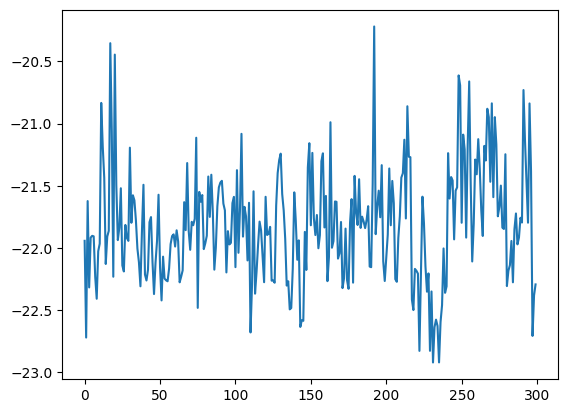

In [53]:
plt.plot(en_real)

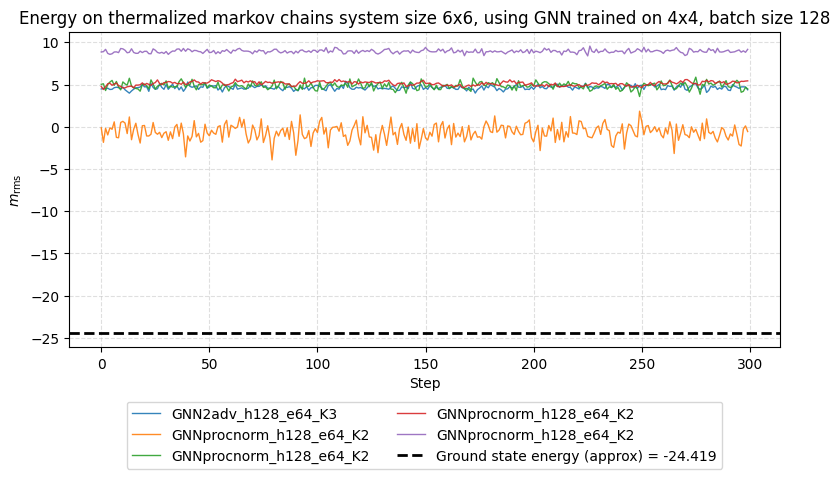

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
exact_energy_6x6 = -0.6783*36 
def abbrevia(key):
    m = re.match(r'^(.*?K.).*(.)$', key)
    if m:
        return f"{m.group(1)}"
    else:
        return key[:10] + "…" + key[-1]
# 2) Plot raw trajectories con legenda esterna
# 4. Plot delle traiettorie
fig, ax = plt.subplots(figsize=(8, 5))
for run_key, df_run in df_traj_energies.groupby('run'):
    ax.plot(df_run['step'], df_run['en_real'],
             alpha=0.9, linewidth=1, label=abbrevia(run_key))
    # 5. Linea orizzontale Quimb
ax.axhline(exact_energy_6x6, color='k', linestyle='--', linewidth=2,
           label=f"Ground state energy (approx) = {exact_energy_6x6:.3f}")
ax.set_xlabel('Step')
ax.set_ylabel(r'$m_\mathrm{rms}$')
ax.set_title('Energy on thermalized markov chains system size 6x6, using GNN trained on 4x4, batch size 128')
ax.grid(True, linestyle='--', alpha=0.4)
# Legenda sotto, 2 colonne (regola ncol in base al num. di run)
ax.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=2,
           frameon=True)

fig.tight_layout()
plt.show()
# plt.show()

GNN2adv_h128_e64_K3_b0.007_bs128_lr0.0002_1
GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_0
GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_2
GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_3


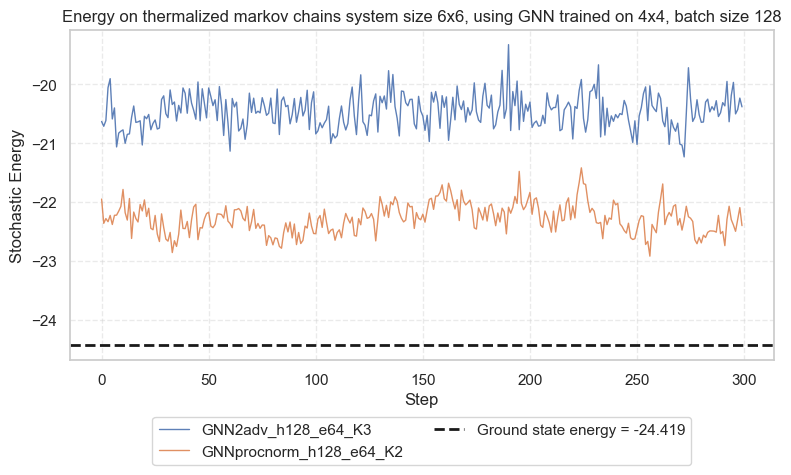

In [82]:


import pandas as pd
import matplotlib.pyplot as plt
exact_energy_6x6 = -0.6783*36 
def abbrevia(key):
    m = re.match(r'^(.*?K.).*(.)$', key)
    if m:
        return f"{m.group(1)}"
    else:
        return key[:10] + "…" + key[-1]
# 2) Plot raw trajectories con legenda esterna
# 4. Plot delle traiettorie
fig, ax = plt.subplots(figsize=(8, 5))
for run_key, df_run in df_traj_energies.groupby('run'):
    print(run_key)
    if run_key=='GNNprocnorm_h128_e64_K2_b0.05_bs256_lr0.0002_0':

        continue
    if run_key=='GNNprocnorm_h128_e64_K2_b0.07_bs128_lr0.0001_2':
        continue
    ax.plot(df_run['step'], df_run['en_real'],
             alpha=0.9, linewidth=1, label=abbrevia(run_key))
    # 5. Linea orizzontale Quimb
# ax.axhline(exact_energy_6x6, color='k', linestyle='--', linewidth=2,
#            label=f"Ground state energy per site (approx) = {exact_energy_6x6/36:.3f}")
ax.axhline(exact_energy_6x6, color='k', linestyle='--', linewidth=2,
            label=f"Ground state energy = {exact_energy_6x6:.3f}")
ax.set_xlabel('Step')
ax.set_ylabel(r'Stochastic Energy')
ax.set_title('Energy on thermalized markov chains system size 6x6, using GNN trained on 4x4, batch size 128')
ax.grid(True, linestyle='--', alpha=0.4)
# Legenda sotto, 2 colonne (regola ncol in base al num. di run)
ax.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=2,
           frameon=True)

fig.tight_layout()
plt.show()
# plt.show()

In [55]:
from compgraph.tensorflow_version.hamiltonian_operations import get_single_graph_from_batch
gt=get_single_graph_from_batch(GT_Batch_update,0)

In [78]:
runs_to_plot_df['run_name'].unique()

array(['2dsquare_04_04_Neel/beta0.07__bs_128lr1.0e-04_loop1212x15_overlap_VMC/GNNprocnorm_h128_e64_K2',
       '2dsquare_04_04_Neel/beta0.007__bs_128lr2.0e-04_loop1200x15_overlap_VMC/GNN2adv_h128_e64_K3'],
      dtype=object)